In [1]:
import gym
import json
import datetime as dt

from stable_baselines.common.policies import MlpPolicy
from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines import PPO2

from envs.EpidemicInterventionEnv import EpidemicInterventionEnv

import pandas as pd


import os

import gym
import numpy as np
import matplotlib.pyplot as plt

#from stable_baselines import DDPG
#from stable_baselines.ddpg.policies import LnMlpPolicy
from stable_baselines import results_plotter
from stable_baselines.bench import Monitor
from stable_baselines.results_plotter import load_results, ts2xy
from stable_baselines.common.noise import AdaptiveParamNoiseSpec
from stable_baselines.common.callbacks import BaseCallback

In [2]:
class SaveOnBestTrainingRewardCallback(BaseCallback):
    """
    Callback for saving a model (the check is done every ``check_freq`` steps)
    based on the training reward (in practice, we recommend using ``EvalCallback``).

    :param check_freq: (int)
    :param log_dir: (str) Path to the folder where the model will be saved.
      It must contains the file created by the ``Monitor`` wrapper.
    :param verbose: (int)
    """
    def __init__(self, check_freq: int, log_dir: str, verbose=1):
        super(SaveOnBestTrainingRewardCallback, self).__init__(verbose)
        self.check_freq = check_freq
        self.log_dir = log_dir
        self.save_path = os.path.join(log_dir, 'best_model')
        self.best_mean_reward = -np.inf

    def _init_callback(self) -> None:
        # Create folder if needed
        if self.save_path is not None:
            os.makedirs(self.save_path, exist_ok=True)

    def _on_step(self) -> bool:
        if self.n_calls % self.check_freq == 0:

          # Retrieve training reward
          x, y = ts2xy(load_results(self.log_dir), 'timesteps')
          if len(x) > 0:
              # Mean training reward over the last 100 episodes
              mean_reward = np.mean(y[-100:])
              if self.verbose > 0:
                print("Num timesteps: {}".format(self.num_timesteps))
                print("Best mean reward: {:.2f} - Last mean reward per episode: {:.2f}".format(self.best_mean_reward, mean_reward))

              # New best model, you could save the agent here
              if mean_reward > self.best_mean_reward:
                  self.best_mean_reward = mean_reward
                  # Example for saving best model
                  if self.verbose > 0:
                    print("Saving new best model to {}".format(self.save_path))
                  self.model.save(self.save_path)

        return True

In [3]:
# Create log dir
import shutil




In [4]:
'''
env = DummyVecEnv([lambda: EpidemicInterventionEnv(df)])
'''
def train(check_,timestep_):
    log_dir = "tmp/"
    shutil.rmtree(log_dir)
    os.makedirs(log_dir, exist_ok=True)



    df = pd.read_csv('./data/epidemic_2.csv')

    df['Date_new'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
    df = df.sort_values('Date_new')
    env = gym.make('EpidemicIntervention:epidemic-intervention-v0')

    #new
    env = Monitor(env, log_dir)
    action_values =set()
    # Add some param noise for exploration
    param_noise = AdaptiveParamNoiseSpec(initial_stddev=0.1, desired_action_stddev=0.1)
    # Because we use parameter noise, we should use a MlpPolicy with layer normalization

    
    model = PPO2(MlpPolicy, env, verbose=1)
    callback = SaveOnBestTrainingRewardCallback(check_freq=check_, log_dir=log_dir)
    # Train the agent
    time_steps = 1e5

    model.learn(total_timesteps=timestep_,callback=callback)
    obs = env.reset()
    env.set_step()
    for i in range(250):
        print("i============",i)
        action, _states = model.predict(obs)
        print(action)
        #env.reset()
        obs, rewards, done, info = env.step(action)
        print("done=",done)
        if done == True:
            #env.reset()
            env.render()
            break
        #action_values.add(action[0][0])
    return model,env, action_values,df


In [5]:
import pylab as pl 
def plot_all(env,action_values,time_steps,df):
    ret_df = env.render()
    #print(action_values)
    log_dir = "tmp/"
    old_df = pd.read_csv('./data/epidemic_2.csv')
    results_plotter.plot_results([log_dir], time_steps, results_plotter.X_TIMESTEPS, "Intervention")
    plt.show()
    pl.subplot(211)
    pl.plot(ret_df['Susceptible'], '-g', label='Susceptibles')
    pl.plot(ret_df['Recovered'], '-k', label='Recovereds')
    pl.plot(df['Susceptible'], '-b', label='Susceptibles Old')
    pl.plot(df['Recovered'], '-b', label='Recovereds Old')
    pl.legend(loc=0)

    pl.xlabel('Time')
    pl.ylabel('Susceptibles and Recovereds')
    pl.subplot(212)
    pl.plot(ret_df['Infected'], '-r', label='Infectious')
    pl.plot(df['Infected'], '-b', label='Infectious Old')
    pl.xlabel('Time')
    pl.ylabel('Infectious')
    pl.show()

In [6]:
model,env,action_values,df = train(10000,10000)

//anaconda3/lib/python3.7/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))
//anaconda3/lib/python3.7/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float16
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))
W0419 20:19:59.255059 140736159323008 deprecation_wrapper.py:119] From /Users/anupa/Documents/Anupa/SEM-4/project/modeling_python/openai-gym/stable-baselines-master/stable_baselines/common/tf_util.py:191: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.

W0419 20:19:59.256423 140736159323008 deprecation_wrapper.py:119] From /Users/anupa/Documents/Anupa/SEM-4/project/modeling_python/openai-gym/stable-baselines-master/stable_baselines/common/tf_util.py:200: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.

W0419 20:19:59.258757 140736159323008 de

Wrapping the env in a DummyVecEnv.


W0419 20:19:59.556166 140736159323008 deprecation_wrapper.py:119] From /Users/anupa/Documents/Anupa/SEM-4/project/modeling_python/openai-gym/stable-baselines-master/stable_baselines/common/tf_layers.py:123: The name tf.get_variable is deprecated. Please use tf.compat.v1.get_variable instead.

W0419 20:19:59.860200 140736159323008 deprecation_wrapper.py:119] From /Users/anupa/Documents/Anupa/SEM-4/project/modeling_python/openai-gym/stable-baselines-master/stable_baselines/ppo2/ppo2.py:190: The name tf.summary.scalar is deprecated. Please use tf.compat.v1.summary.scalar instead.

W0419 20:19:59.910746 140736159323008 deprecation.py:323] From //anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0419 20:20:00.539958 140736159323008 depreca

[1.        0.8608202]
no action
Current step = 0 start_time = -1 Reward 0.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000 gain from finish reward = 0
[1. 0.]
no action
Current step = 1 start_time = -1 Reward 0.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000 gain from finish reward = 0
[0.2184257 0.6493288]
1*********start intervention
start calc = 2 curr +1 3 
len1: 2
len2: 1
len3: 247
249
start calc = 2 curr +1 3 
len1: 2
len2: 1
len3: 247
249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =18.999835 peak =-0.000000 peak day = 0.000000
***************Gains : area =0.012798 peak =-0.000000 peak day = 0.000000
Current step = 2 start_time = 2 Reward -10.000000 cost of start = 10.000000 cost of continueing = 0.000000 gain from int = 0.000000 gain from finish reward = 0
[0.96411717 1.        ]
no action
start calc = 2 curr +1 4 
len1: 2
len2: 2
len3: 246
249
start calc = 2 curr +

start calc = 1 curr +1 4 
len1: 1
len2: 3
len3: 246
249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =22.017360 peak =0.000021 peak day = 1.000000
***************Gains : area =0.014830 peak =0.000285 peak day = 1.000000
Current step = 3 start_time = 1 Reward -1.000000 cost of start = 0.000000 cost of continueing = 2.000000 gain from int = 1.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
start calc = 1 curr +1 5 
len1: 1
len2: 4
len3: 245
249
start calc = 1 curr +1 5 
len1: 1
len2: 4
len3: 245
249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =23.550701 peak =0.000039 peak day = 1.000000
***************Gains : area =0.015863 peak =0.000547 peak day = 1.000000
Current step = 4 start_time = 1 Reward -2.000000 cost of start = 0.000000 cost of continueing = 3.000000 gain from int = 1.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
start calc = 1 curr +1 6 
len1: 1
len2: 5
len3

len3: 240
499
start calc = 0 curr +1 10 
len1: 0
len2: 10
len3: 240
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11528.404735 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.765169 peak =-0.000000 peak day = 0.000000
Current step = 9 start_time = 0 Reward -9.000000 cost of start = 0.000000 cost of continueing = 9.000000 gain from int = 0.000000 gain from finish reward = 0
[0.96282667 0.        ]
no action
2*********stop intervention
[0, (0, 10, 0.08)]
Finish reward 4
Current step = 0 start_time = -1 Reward 0.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000 gain from finish reward = 0
[1. 0.]
no action
Current step = 0 start_time = -1 Reward 0.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000 gain from finish reward = 0
[1. 1.]
no action
Current step = 1 start_time = -1 Reward 0.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from i

len3: 246
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11547.635040 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.778122 peak =-0.000000 peak day = 0.000000
Current step = 3 start_time = 0 Reward -3.000000 cost of start = 0.000000 cost of continueing = 3.000000 gain from int = 0.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
start calc = 0 curr +1 5 
len1: 0
len2: 5
len3: 245
499
start calc = 0 curr +1 5 
len1: 0
len2: 5
len3: 245
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11544.528829 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.776029 peak =-0.000000 peak day = 0.000000
Current step = 4 start_time = 0 Reward -4.000000 cost of start = 0.000000 cost of continueing = 4.000000 gain from int = 0.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
start calc = 0 curr +1 6 
len1: 0
len2: 6
len3: 244
499
start calc = 0 cur

len3: 240
249
start calc = 2 curr +1 10 
len1: 2
len2: 8
len3: 240
249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =29.892046 peak =0.000085 peak day = 3.000000
***************Gains : area =0.020134 peak =0.001177 peak day = 3.000000
Current step = 9 start_time = 2 Reward -4.000000 cost of start = 0.000000 cost of continueing = 7.000000 gain from int = 3.000000 gain from finish reward = 0
[0.         0.75876033]
1*********start intervention
start calc = 2 curr +1 11 
len1: 2
len2: 9
len3: 239
249
start calc = 2 curr +1 11 
len1: 2
len2: 9
len3: 239
249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =31.527001 peak =0.000108 peak day = 3.000000
***************Gains : area =0.021236 peak =0.001492 peak day = 3.000000
Current step = 10 start_time = 2 Reward -5.000000 cost of start = 0.000000 cost of continueing = 8.000000 gain from int = 3.000000 gain from finish reward = 0
[0.43733478 1.        ]
1*********start intervent

start calc = 1 curr +1 8 
len1: 1
len2: 7
len3: 242
249
start calc = 1 curr +1 8 
len1: 1
len2: 7
len3: 242
249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =28.268038 peak =0.000078 peak day = 3.000000
***************Gains : area =0.019040 peak =0.001089 peak day = 3.000000
Current step = 7 start_time = 1 Reward -3.000000 cost of start = 0.000000 cost of continueing = 6.000000 gain from int = 3.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
start calc = 1 curr +1 9 
len1: 1
len2: 8
len3: 241
249
start calc = 1 curr +1 9 
len1: 1
len2: 8
len3: 241
249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =29.879761 peak =0.000081 peak day = 3.000000
***************Gains : area =0.020126 peak =0.001119 peak day = 3.000000
Current step = 8 start_time = 1 Reward -4.000000 cost of start = 0.000000 cost of continueing = 7.000000 gain from int = 3.000000 gain from finish reward = 0
[0. 0.]
1*********start int

start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11556.725050 peak =-0.000000 peak day = 250.000000
***************Gains : area =-7.784244 peak =-0.000000 peak day = 250.000000
Current step = 0 start_time = 0 Reward 240.000000 cost of start = 10.000000 cost of continueing = 0.000000 gain from int = 250.000000 gain from finish reward = 0
[0.         0.15980236]
1*********start intervention
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11553.732172 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.782229 peak =-0.000000 peak day = 0.000000
Current step = 1 start_time = 0 Reward -1.000000 cost of start = 0.000000 cost of continueing = 1.000000 gain from int = 0.000000 gain from finish 

[0.34755716 0.        ]
1*********start intervention
start calc = 0 curr +1 8 
len1: 0
len2: 8
len3: 242
499
start calc = 0 curr +1 8 
len1: 0
len2: 8
len3: 242
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11534.974864 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.769594 peak =-0.000000 peak day = 0.000000
Current step = 7 start_time = 0 Reward -7.000000 cost of start = 0.000000 cost of continueing = 7.000000 gain from int = 0.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
start calc = 0 curr +1 9 
len1: 0
len2: 9
len3: 241
499
start calc = 0 curr +1 9 
len1: 0
len2: 9
len3: 241
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11531.709861 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.767395 peak =-0.000000 peak day = 0.000000
Current step = 8 start_time = 0 Reward -8.000000 cost of start = 0.000000 cost of continueing = 8.000000 gain from int

[0.43678555 0.        ]
1*********start intervention
start calc = 0 curr +1 3 
len1: 0
len2: 3
len3: 247
499
start calc = 0 curr +1 3 
len1: 0
len2: 3
len3: 247
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11550.702230 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.780188 peak =-0.000000 peak day = 0.000000
Current step = 2 start_time = 0 Reward -2.000000 cost of start = 0.000000 cost of continueing = 2.000000 gain from int = 0.000000 gain from finish reward = 0
[0. 1.]
1*********start intervention
start calc = 0 curr +1 4 
len1: 0
len2: 4
len3: 246
499
start calc = 0 curr +1 4 
len1: 0
len2: 4
len3: 246
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11547.635040 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.778122 peak =-0.000000 peak day = 0.000000
Current step = 3 start_time = 0 Reward -3.000000 cost of start = 0.000000 cost of continueing = 3.000000 gain from int

len3: 240
499
start calc = 0 curr +1 10 
len1: 0
len2: 10
len3: 240
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11528.404735 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.765169 peak =-0.000000 peak day = 0.000000
Current step = 9 start_time = 0 Reward -9.000000 cost of start = 0.000000 cost of continueing = 9.000000 gain from int = 0.000000 gain from finish reward = 0
[1. 0.]
no action
2*********stop intervention
[0, (0, 10, 0.08)]
Finish reward 4
Current step = 0 start_time = -1 Reward 0.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11556.725050 peak =-0.000000 peak day = 250.000000
***************Gains : area =-7.784244 peak =

len3: 244
249
start calc = 3 curr +1 6 
len1: 3
len2: 3
len3: 244
249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =22.019850 peak =0.000023 peak day = 1.000000
***************Gains : area =0.014832 peak =0.000316 peak day = 1.000000
Current step = 5 start_time = 3 Reward -1.000000 cost of start = 0.000000 cost of continueing = 2.000000 gain from int = 1.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
start calc = 3 curr +1 7 
len1: 3
len2: 4
len3: 243
249
start calc = 3 curr +1 7 
len1: 3
len2: 4
len3: 243
249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =23.559108 peak =0.000043 peak day = 1.000000
***************Gains : area =0.015869 peak =0.000595 peak day = 1.000000
Current step = 6 start_time = 3 Reward -2.000000 cost of start = 0.000000 cost of continueing = 3.000000 gain from int = 1.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
start calc = 3 curr +1 8 
len1: 

---------------------------------------
| approxkl           | 5.9591923e-05  |
| clipfrac           | 0.0            |
| ep_len_mean        | 11.6           |
| ep_reward_mean     | 111            |
| explained_variance | -0.0016        |
| fps                | 68             |
| n_updates          | 2              |
| policy_entropy     | 2.8399863      |
| policy_loss        | -0.00014032284 |
| serial_timesteps   | 256            |
| time_elapsed       | 5.25           |
| total_timesteps    | 256            |
| value_loss         | 1632.3772      |
---------------------------------------
[1. 0.]
no action
Current step = 0 start_time = -1 Reward 0.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000 gain from finish reward = 0
[0.34751442 1.        ]
1*********start intervention
start calc = 1 curr +1 2 
len1: 1
len2: 1
len3: 248
249
start calc = 1 curr +1 2 
len1: 1
len2: 1
len3: 248
249
All max area =2381.214837 peak =0.072054 peak day = 65.0000

[0, (0, 10, 0.08)]
Finish reward 4
Current step = 0 start_time = -1 Reward 0.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000 gain from finish reward = 0
[0.5905608 0.       ]
no action
Current step = 0 start_time = -1 Reward 0.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000 gain from finish reward = 0
[0.         0.46461847]
1*********start intervention
start calc = 1 curr +1 2 
len1: 1
len2: 1
len3: 248
249
start calc = 1 curr +1 2 
len1: 1
len2: 1
len3: 248
249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =19.007413 peak =0.000000 peak day = 0.000000
***************Gains : area =0.012803 peak =0.000000 peak day = 0.000000
Current step = 1 start_time = 1 Reward -10.000000 cost of start = 10.000000 cost of continueing = 0.000000 gain from int = 0.000000 gain from finish reward = 0
[0.        0.6958708]
1*********start intervention
start calc = 1 curr +1 3 
len1: 1
len2: 2
l

[0.07469821 0.59726095]
1*********start intervention
start calc = 0 curr +1 5 
len1: 0
len2: 5
len3: 245
499
start calc = 0 curr +1 5 
len1: 0
len2: 5
len3: 245
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11544.528829 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.776029 peak =-0.000000 peak day = 0.000000
Current step = 4 start_time = 0 Reward -4.000000 cost of start = 0.000000 cost of continueing = 4.000000 gain from int = 0.000000 gain from finish reward = 0
[0.08956878 0.14259942]
1*********start intervention
start calc = 0 curr +1 6 
len1: 0
len2: 6
len3: 244
499
start calc = 0 curr +1 6 
len1: 0
len2: 6
len3: 244
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11541.383402 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.773911 peak =-0.000000 peak day = 0.000000
Current step = 5 start_time = 0 Reward -5.000000 cost of start = 0.000000 cost of continueing = 5.0000

[0.         0.70309925]
1*********start intervention
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11556.725050 peak =-0.000000 peak day = 250.000000
***************Gains : area =-7.784244 peak =-0.000000 peak day = 250.000000
Current step = 0 start_time = 0 Reward 240.000000 cost of start = 10.000000 cost of continueing = 0.000000 gain from int = 250.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11553.732172 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.782229 peak =-0.000000 peak day = 0.000000
Current step = 1 start_time = 0 Reward -1.000000 cost of start = 0.000000 cost of continueing = 1.000000 gain 

All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11550.702230 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.780188 peak =-0.000000 peak day = 0.000000
Current step = 2 start_time = 0 Reward -2.000000 cost of start = 0.000000 cost of continueing = 2.000000 gain from int = 0.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
start calc = 0 curr +1 4 
len1: 0
len2: 4
len3: 246
499
start calc = 0 curr +1 4 
len1: 0
len2: 4
len3: 246
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11547.635040 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.778122 peak =-0.000000 peak day = 0.000000
Current step = 3 start_time = 0 Reward -3.000000 cost of start = 0.000000 cost of continueing = 3.000000 gain from int = 0.000000 gain from finish reward = 0
[0. 1.]
1*********start intervention
start calc = 0 curr +1 5 
len1: 0
len2: 5
len3: 245
499
start calc = 0 curr +1 5 
len1: 

--------------------------------------
| approxkl           | 2.7528768e-05 |
| clipfrac           | 0.0           |
| ep_len_mean        | 11.5          |
| ep_reward_mean     | 125           |
| explained_variance | 0.00227       |
| fps                | 60            |
| n_updates          | 3             |
| policy_entropy     | 2.8395722     |
| policy_loss        | -0.0002452915 |
| serial_timesteps   | 384           |
| time_elapsed       | 7.12          |
| total_timesteps    | 384           |
| value_loss         | 2013.0594     |
--------------------------------------
[0.564541 0.      ]
no action
start calc = 0 curr +1 6 
len1: 0
len2: 6
len3: 244
499
start calc = 0 curr +1 6 
len1: 0
len2: 6
len3: 244
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11541.383402 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.773911 peak =-0.000000 peak day = 0.000000
Current step = 5 start_time = 0 Reward -5.000000 cost of start = 0.0

[1. 1.]
no action
2*********stop intervention
[1, (1, 11, 0.08)]
Finish reward 4
Current step = 0 start_time = -1 Reward 0.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000 gain from finish reward = 0
[0.7263274  0.00703838]
no action
Current step = 0 start_time = -1 Reward 0.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000 gain from finish reward = 0
[0.         0.42250314]
1*********start intervention
start calc = 1 curr +1 2 
len1: 1
len2: 1
len3: 248
249
start calc = 1 curr +1 2 
len1: 1
len2: 1
len3: 248
249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =19.007413 peak =0.000000 peak day = 0.000000
***************Gains : area =0.012803 peak =0.000000 peak day = 0.000000
Current step = 1 start_time = 1 Reward -10.000000 cost of start = 10.000000 cost of continueing = 0.000000 gain from int = 0.000000 gain from finish reward = 0
[0.08401567 0.7123279 ]
1*********start interv

start calc = 1 curr +1 2 
len1: 1
len2: 1
len3: 248
249
start calc = 1 curr +1 2 
len1: 1
len2: 1
len3: 248
249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =19.007413 peak =0.000000 peak day = 0.000000
***************Gains : area =0.012803 peak =0.000000 peak day = 0.000000
Current step = 1 start_time = 1 Reward -10.000000 cost of start = 10.000000 cost of continueing = 0.000000 gain from int = 0.000000 gain from finish reward = 0
[0.76768124 0.        ]
no action
start calc = 1 curr +1 3 
len1: 1
len2: 2
len3: 247
249
start calc = 1 curr +1 3 
len1: 1
len2: 2
len3: 247
249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =20.503178 peak =0.000021 peak day = 1.000000
***************Gains : area =0.013810 peak =0.000297 peak day = 1.000000
Current step = 2 start_time = 1 Reward -0.000000 cost of start = 0.000000 cost of continueing = 1.000000 gain from int = 1.000000 gain from finish reward = 0
[0.55574346 0.        ]
no a

len3: 245
499
start calc = 0 curr +1 5 
len1: 0
len2: 5
len3: 245
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11544.528829 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.776029 peak =-0.000000 peak day = 0.000000
Current step = 4 start_time = 0 Reward -4.000000 cost of start = 0.000000 cost of continueing = 4.000000 gain from int = 0.000000 gain from finish reward = 0
[0.        0.8418364]
1*********start intervention
start calc = 0 curr +1 6 
len1: 0
len2: 6
len3: 244
499
start calc = 0 curr +1 6 
len1: 0
len2: 6
len3: 244
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11541.383402 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.773911 peak =-0.000000 peak day = 0.000000
Current step = 5 start_time = 0 Reward -5.000000 cost of start = 0.000000 cost of continueing = 5.000000 gain from int = 0.000000 gain from finish reward = 0
[0.18645163 0.7516938 ]
1*********start i

len2: 5
len3: 245
499
start calc = 0 curr +1 5 
len1: 0
len2: 5
len3: 245
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11544.528829 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.776029 peak =-0.000000 peak day = 0.000000
Current step = 4 start_time = 0 Reward -4.000000 cost of start = 0.000000 cost of continueing = 4.000000 gain from int = 0.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
start calc = 0 curr +1 6 
len1: 0
len2: 6
len3: 244
499
start calc = 0 curr +1 6 
len1: 0
len2: 6
len3: 244
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11541.383402 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.773911 peak =-0.000000 peak day = 0.000000
Current step = 5 start_time = 0 Reward -5.000000 cost of start = 0.000000 cost of continueing = 5.000000 gain from int = 0.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
start calc

[0. 0.]
1*********start intervention
start calc = 2 curr +1 3 
len1: 2
len2: 1
len3: 247
249
start calc = 2 curr +1 3 
len1: 2
len2: 1
len3: 247
249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =18.999835 peak =-0.000000 peak day = 0.000000
***************Gains : area =0.012798 peak =-0.000000 peak day = 0.000000
Current step = 2 start_time = 2 Reward -10.000000 cost of start = 10.000000 cost of continueing = 0.000000 gain from int = 0.000000 gain from finish reward = 0
[1. 0.]
no action
start calc = 2 curr +1 4 
len1: 2
len2: 2
len3: 246
249
start calc = 2 curr +1 4 
len1: 2
len2: 2
len3: 246
249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =20.498117 peak =0.000022 peak day = 1.000000
***************Gains : area =0.013807 peak =0.000304 peak day = 1.000000
Current step = 3 start_time = 2 Reward -0.000000 cost of start = 0.000000 cost of continueing = 1.000000 gain from int = 1.000000 gain from finish reward = 0
[0.62

len2: 8
len3: 242
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11534.974864 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.769594 peak =-0.000000 peak day = 0.000000
Current step = 7 start_time = 0 Reward -7.000000 cost of start = 0.000000 cost of continueing = 7.000000 gain from int = 0.000000 gain from finish reward = 0
[0. 1.]
1*********start intervention
start calc = 0 curr +1 9 
len1: 0
len2: 9
len3: 241
499
start calc = 0 curr +1 9 
len1: 0
len2: 9
len3: 241
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11531.709861 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.767395 peak =-0.000000 peak day = 0.000000
Current step = 8 start_time = 0 Reward -8.000000 cost of start = 0.000000 cost of continueing = 8.000000 gain from int = 0.000000 gain from finish reward = 0
[0.38153177 0.        ]
1*********start intervention
start calc = 0 curr +1 10 
len1: 0
len2: 10
len3: 

start calc = 0 curr +1 7 
len1: 0
len2: 7
len3: 243
499
start calc = 0 curr +1 7 
len1: 0
len2: 7
len3: 243
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11538.198857 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.771766 peak =-0.000000 peak day = 0.000000
Current step = 6 start_time = 0 Reward -6.000000 cost of start = 0.000000 cost of continueing = 6.000000 gain from int = 0.000000 gain from finish reward = 0
[1.         0.24660072]
no action
start calc = 0 curr +1 8 
len1: 0
len2: 8
len3: 242
499
start calc = 0 curr +1 8 
len1: 0
len2: 8
len3: 242
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11534.974864 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.769594 peak =-0.000000 peak day = 0.000000
Current step = 7 start_time = 0 Reward -7.000000 cost of start = 0.000000 cost of continueing = 7.000000 gain from int = 0.000000 gain from finish reward = 0
[0.6073539 1.   

[0, (0, 10, 0.08)]
Finish reward 4
Current step = 0 start_time = -1 Reward 0.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000 gain from finish reward = 0
[0.89132154 0.02974856]
no action
Current step = 0 start_time = -1 Reward 0.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000 gain from finish reward = 0
[0.         0.85985947]
1*********start intervention
start calc = 1 curr +1 2 
len1: 1
len2: 1
len3: 248
249
start calc = 1 curr +1 2 
len1: 1
len2: 1
len3: 248
249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =19.007413 peak =0.000000 peak day = 0.000000
***************Gains : area =0.012803 peak =0.000000 peak day = 0.000000
Current step = 1 start_time = 1 Reward -10.000000 cost of start = 10.000000 cost of continueing = 0.000000 gain from int = 0.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
start calc = 1 curr +1 3 
len1: 1
len2: 2
len3: 247
249

len2: 9
len3: 241
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11531.709861 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.767395 peak =-0.000000 peak day = 0.000000
Current step = 8 start_time = 0 Reward -8.000000 cost of start = 0.000000 cost of continueing = 8.000000 gain from int = 0.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
start calc = 0 curr +1 10 
len1: 0
len2: 10
len3: 240
499
start calc = 0 curr +1 10 
len1: 0
len2: 10
len3: 240
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11528.404735 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.765169 peak =-0.000000 peak day = 0.000000
Current step = 9 start_time = 0 Reward -9.000000 cost of start = 0.000000 cost of continueing = 9.000000 gain from int = 0.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
2*********stop intervention
[0, (0, 10, 0.08)]
Finish reward 4

[0.9986155 1.       ]
no action
start calc = 0 curr +1 10 
len1: 0
len2: 10
len3: 240
499
start calc = 0 curr +1 10 
len1: 0
len2: 10
len3: 240
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11528.404735 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.765169 peak =-0.000000 peak day = 0.000000
Current step = 9 start_time = 0 Reward -9.000000 cost of start = 0.000000 cost of continueing = 9.000000 gain from int = 0.000000 gain from finish reward = 0
[0.3343308 1.       ]
1*********start intervention
2*********stop intervention
[0, (0, 10, 0.08)]
Finish reward 4
Current step = 0 start_time = -1 Reward 0.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All a

start calc = 0 curr +1 5 
len1: 0
len2: 5
len3: 245
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11544.528829 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.776029 peak =-0.000000 peak day = 0.000000
Current step = 4 start_time = 0 Reward -4.000000 cost of start = 0.000000 cost of continueing = 4.000000 gain from int = 0.000000 gain from finish reward = 0
[0.7292904 0.       ]
no action
start calc = 0 curr +1 6 
len1: 0
len2: 6
len3: 244
499
start calc = 0 curr +1 6 
len1: 0
len2: 6
len3: 244
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11541.383402 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.773911 peak =-0.000000 peak day = 0.000000
Current step = 5 start_time = 0 Reward -5.000000 cost of start = 0.000000 cost of continueing = 5.000000 gain from int = 0.000000 gain from finish reward = 0
[0.        0.4932735]
1*********start intervention
start calc = 0 curr +1 

len2: 5
len3: 245
499
start calc = 0 curr +1 5 
len1: 0
len2: 5
len3: 245
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11544.528829 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.776029 peak =-0.000000 peak day = 0.000000
Current step = 4 start_time = 0 Reward -4.000000 cost of start = 0.000000 cost of continueing = 4.000000 gain from int = 0.000000 gain from finish reward = 0
[0.         0.42534888]
1*********start intervention
start calc = 0 curr +1 6 
len1: 0
len2: 6
len3: 244
499
start calc = 0 curr +1 6 
len1: 0
len2: 6
len3: 244
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11541.383402 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.773911 peak =-0.000000 peak day = 0.000000
Current step = 5 start_time = 0 Reward -5.000000 cost of start = 0.000000 cost of continueing = 5.000000 gain from int = 0.000000 gain from finish reward = 0
[0. 0.]
1*********start interve

***************Gains : area =0.022351 peak =0.001601 peak day = 4.000000
Current step = 11 start_time = 2 Reward -5.000000 cost of start = 0.000000 cost of continueing = 9.000000 gain from int = 4.000000 gain from finish reward = 0
[0.6802162 0.       ]
no action
2*********stop intervention
[2, (2, 12, 0.08)]
Finish reward 4
Current step = 0 start_time = -1 Reward 0.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000 gain from finish reward = 0
[1. 0.]
no action
Current step = 0 start_time = -1 Reward 0.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000 gain from finish reward = 0
[1. 0.]
no action
Current step = 1 start_time = -1 Reward 0.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000 gain from finish reward = 0
[1.        0.8967248]
no action
Current step = 2 start_time = -1 Reward 0.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000 g

[0.43735263 0.        ]
1*********start intervention
start calc = 0 curr +1 5 
len1: 0
len2: 5
len3: 245
499
start calc = 0 curr +1 5 
len1: 0
len2: 5
len3: 245
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11544.528829 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.776029 peak =-0.000000 peak day = 0.000000
Current step = 4 start_time = 0 Reward -4.000000 cost of start = 0.000000 cost of continueing = 4.000000 gain from int = 0.000000 gain from finish reward = 0
[0.12542607 0.        ]
1*********start intervention
start calc = 0 curr +1 6 
len1: 0
len2: 6
len3: 244
499
start calc = 0 curr +1 6 
len1: 0
len2: 6
len3: 244
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11541.383402 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.773911 peak =-0.000000 peak day = 0.000000
Current step = 5 start_time = 0 Reward -5.000000 cost of start = 0.000000 cost of continueing = 5.0000

[0. 1.]
1*********start intervention
start calc = 2 curr +1 12 
len1: 2
len2: 10
len3: 238
249
start calc = 2 curr +1 12 
len1: 2
len2: 10
len3: 238
249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =33.182825 peak =0.000115 peak day = 4.000000
***************Gains : area =0.022351 peak =0.001601 peak day = 4.000000
Current step = 11 start_time = 2 Reward -5.000000 cost of start = 0.000000 cost of continueing = 9.000000 gain from int = 4.000000 gain from finish reward = 0
[0.3824397 1.       ]
1*********start intervention
2*********stop intervention
[2, (2, 12, 0.08)]
Finish reward 4
Current step = 0 start_time = -1 Reward 0.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All ac

499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11547.635040 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.778122 peak =-0.000000 peak day = 0.000000
Current step = 3 start_time = 0 Reward -3.000000 cost of start = 0.000000 cost of continueing = 3.000000 gain from int = 0.000000 gain from finish reward = 0
[0.11574697 0.        ]
1*********start intervention
start calc = 0 curr +1 5 
len1: 0
len2: 5
len3: 245
499
start calc = 0 curr +1 5 
len1: 0
len2: 5
len3: 245
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11544.528829 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.776029 peak =-0.000000 peak day = 0.000000
Current step = 4 start_time = 0 Reward -4.000000 cost of start = 0.000000 cost of continueing = 4.000000 gain from int = 0.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
start calc = 0 curr +1 6 
len1: 0
len2: 6
len3: 244
499
start calc =

len1: 0
len2: 3
len3: 247
499
start calc = 0 curr +1 3 
len1: 0
len2: 3
len3: 247
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11550.702230 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.780188 peak =-0.000000 peak day = 0.000000
Current step = 2 start_time = 0 Reward -2.000000 cost of start = 0.000000 cost of continueing = 2.000000 gain from int = 0.000000 gain from finish reward = 0
[0.        0.9479356]
1*********start intervention
start calc = 0 curr +1 4 
len1: 0
len2: 4
len3: 246
499
start calc = 0 curr +1 4 
len1: 0
len2: 4
len3: 246
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11547.635040 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.778122 peak =-0.000000 peak day = 0.000000
Current step = 3 start_time = 0 Reward -3.000000 cost of start = 0.000000 cost of continueing = 3.000000 gain from int = 0.000000 gain from finish reward = 0
[0.20142367 0.80003387]
1

len3: 240
499
start calc = 0 curr +1 10 
len1: 0
len2: 10
len3: 240
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11528.404735 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.765169 peak =-0.000000 peak day = 0.000000
Current step = 9 start_time = 0 Reward -9.000000 cost of start = 0.000000 cost of continueing = 9.000000 gain from int = 0.000000 gain from finish reward = 0
[1. 0.]
no action
2*********stop intervention
[0, (0, 10, 0.08)]
Finish reward 4
Current step = 0 start_time = -1 Reward 0.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000 gain from finish reward = 0
[0.         0.41119874]
1*********start intervention
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11556.725050 peak =-0.000000 peak day = 250.000000
***************Gains : area =

[0. 1.]
1*********start intervention
start calc = 2 curr +1 6 
len1: 2
len2: 4
len3: 244
249
start calc = 2 curr +1 6 
len1: 2
len2: 4
len3: 244
249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =23.551206 peak =0.000041 peak day = 1.000000
***************Gains : area =0.015863 peak =0.000570 peak day = 1.000000
Current step = 5 start_time = 2 Reward -2.000000 cost of start = 0.000000 cost of continueing = 3.000000 gain from int = 1.000000 gain from finish reward = 0
[0.6164563  0.54729015]
no action
start calc = 2 curr +1 7 
len1: 2
len2: 5
len3: 243
249
start calc = 2 curr +1 7 
len1: 2
len2: 5
len3: 243
249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =25.107098 peak =0.000049 peak day = 2.000000
***************Gains : area =0.016911 peak =0.000679 peak day = 2.000000
Current step = 6 start_time = 2 Reward -2.000000 cost of start = 0.000000 cost of continueing = 4.000000 gain from int = 2.000000 gain from finish rewa

len3: 240
249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =31.511683 peak =0.000103 peak day = 3.000000
***************Gains : area =0.021225 peak =0.001423 peak day = 3.000000
Current step = 9 start_time = 1 Reward -5.000000 cost of start = 0.000000 cost of continueing = 8.000000 gain from int = 3.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
start calc = 1 curr +1 11 
len1: 1
len2: 10
len3: 239
249
start calc = 1 curr +1 11 
len1: 1
len2: 10
len3: 239
249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =33.164262 peak =0.000110 peak day = 4.000000
***************Gains : area =0.022338 peak =0.001525 peak day = 4.000000
Current step = 10 start_time = 1 Reward -5.000000 cost of start = 0.000000 cost of continueing = 9.000000 gain from int = 4.000000 gain from finish reward = 0
[0.04414999 0.4248074 ]
1*********start intervention
2*********stop intervention
[1, (1, 11, 0.08)]
Finish reward 4
Curr

249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =31.511683 peak =0.000103 peak day = 3.000000
***************Gains : area =0.021225 peak =0.001423 peak day = 3.000000
Current step = 9 start_time = 1 Reward -5.000000 cost of start = 0.000000 cost of continueing = 8.000000 gain from int = 3.000000 gain from finish reward = 0
[0.         0.70990086]
1*********start intervention
start calc = 1 curr +1 11 
len1: 1
len2: 10
len3: 239
249
start calc = 1 curr +1 11 
len1: 1
len2: 10
len3: 239
249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =33.164262 peak =0.000110 peak day = 4.000000
***************Gains : area =0.022338 peak =0.001525 peak day = 4.000000
Current step = 10 start_time = 1 Reward -5.000000 cost of start = 0.000000 cost of continueing = 9.000000 gain from int = 4.000000 gain from finish reward = 0
[0.4015284 0.       ]
1*********start intervention
2*********stop intervention
[1, (1, 11, 0.08)]
Finish reward 4


[0. 0.]
1*********start intervention
start calc = 0 curr +1 4 
len1: 0
len2: 4
len3: 246
499
start calc = 0 curr +1 4 
len1: 0
len2: 4
len3: 246
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11547.635040 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.778122 peak =-0.000000 peak day = 0.000000
Current step = 3 start_time = 0 Reward -3.000000 cost of start = 0.000000 cost of continueing = 3.000000 gain from int = 0.000000 gain from finish reward = 0
[0.       0.401114]
1*********start intervention
start calc = 0 curr +1 5 
len1: 0
len2: 5
len3: 245
499
start calc = 0 curr +1 5 
len1: 0
len2: 5
len3: 245
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11544.528829 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.776029 peak =-0.000000 peak day = 0.000000
Current step = 4 start_time = 0 Reward -4.000000 cost of start = 0.000000 cost of continueing = 4.000000 gain from int = 0

start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11556.725050 peak =-0.000000 peak day = 250.000000
***************Gains : area =-7.784244 peak =-0.000000 peak day = 250.000000
Current step = 0 start_time = 0 Reward 240.000000 cost of start = 10.000000 cost of continueing = 0.000000 gain from int = 250.000000 gain from finish reward = 0
[1.         0.69821215]
no action
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11553.732172 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.782229 peak =-0.000000 peak day = 0.000000
Current step = 1 start_time = 0 Reward -1.000000 cost of start = 0.000000 cost of continueing = 1.000000 gain from int = 0.000000 gain from finish reward = 0
[0.     

start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11556.725050 peak =-0.000000 peak day = 250.000000
***************Gains : area =-7.784244 peak =-0.000000 peak day = 250.000000
Current step = 0 start_time = 0 Reward 240.000000 cost of start = 10.000000 cost of continueing = 0.000000 gain from int = 250.000000 gain from finish reward = 0
[0.         0.22068824]
1*********start intervention
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11553.732172 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.782229 peak =-0.000000 peak day = 0.000000
Current step = 1 start_time = 0 Reward -1.000000 cost of start = 0.000000 cost of continueing = 1.000000 gain from int = 0.000000 gain from finish reward = 0
[0.46312734 1.        ]
1*********start inter

[0.11525646 0.        ]
1*********start intervention
start calc = 0 curr +1 10 
len1: 0
len2: 10
len3: 240
499
start calc = 0 curr +1 10 
len1: 0
len2: 10
len3: 240
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11528.404735 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.765169 peak =-0.000000 peak day = 0.000000
Current step = 9 start_time = 0 Reward -9.000000 cost of start = 0.000000 cost of continueing = 9.000000 gain from int = 0.000000 gain from finish reward = 0
[1.         0.07698758]
no action
2*********stop intervention
[0, (0, 10, 0.08)]
Finish reward 4
Current step = 0 start_time = -1 Reward 0.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000 gain from finish reward = 0
[1. 1.]
no action
Current step = 0 start_time = -1 Reward 0.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000 gain from finish reward = 0
[0.5066069 1.       ]
no action
Curre

[0.27400017 0.5394462 ]
1*********start intervention
start calc = 0 curr +1 5 
len1: 0
len2: 5
len3: 245
499
start calc = 0 curr +1 5 
len1: 0
len2: 5
len3: 245
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11544.528829 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.776029 peak =-0.000000 peak day = 0.000000
Current step = 4 start_time = 0 Reward -4.000000 cost of start = 0.000000 cost of continueing = 4.000000 gain from int = 0.000000 gain from finish reward = 0
[0.48933268 0.23320627]
1*********start intervention
start calc = 0 curr +1 6 
len1: 0
len2: 6
len3: 244
499
start calc = 0 curr +1 6 
len1: 0
len2: 6
len3: 244
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11541.383402 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.773911 peak =-0.000000 peak day = 0.000000
Current step = 5 start_time = 0 Reward -5.000000 cost of start = 0.000000 cost of continueing = 5.0000

[0.28999028 0.        ]
1*********start intervention
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11556.725050 peak =-0.000000 peak day = 250.000000
***************Gains : area =-7.784244 peak =-0.000000 peak day = 250.000000
Current step = 0 start_time = 0 Reward 240.000000 cost of start = 10.000000 cost of continueing = 0.000000 gain from int = 250.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11553.732172 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.782229 peak =-0.000000 peak day = 0.000000
Current step = 1 start_time = 0 Reward -1.000000 cost of start = 0.000000 cost of continueing = 1.000000 gain 

len1: 0
len2: 10
len3: 240
499
start calc = 0 curr +1 10 
len1: 0
len2: 10
len3: 240
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11528.404735 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.765169 peak =-0.000000 peak day = 0.000000
Current step = 9 start_time = 0 Reward -9.000000 cost of start = 0.000000 cost of continueing = 9.000000 gain from int = 0.000000 gain from finish reward = 0
[0.48758972 0.        ]
1*********start intervention
2*********stop intervention
[0, (0, 10, 0.08)]
Finish reward 4
Current step = 0 start_time = -1 Reward 0.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000 gain from finish reward = 0
[1. 0.]
no action
Current step = 0 start_time = -1 Reward 0.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000 gain from finish reward = 0
[0.36461583 0.5704754 ]
1*********start intervention
start calc = 1 curr +1 2 
len1: 1
len2: 1
len

len2: 5
len3: 245
499
start calc = 0 curr +1 5 
len1: 0
len2: 5
len3: 245
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11544.528829 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.776029 peak =-0.000000 peak day = 0.000000
Current step = 4 start_time = 0 Reward -4.000000 cost of start = 0.000000 cost of continueing = 4.000000 gain from int = 0.000000 gain from finish reward = 0
[1. 0.]
no action
start calc = 0 curr +1 6 
len1: 0
len2: 6
len3: 244
499
start calc = 0 curr +1 6 
len1: 0
len2: 6
len3: 244
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11541.383402 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.773911 peak =-0.000000 peak day = 0.000000
Current step = 5 start_time = 0 Reward -5.000000 cost of start = 0.000000 cost of continueing = 5.000000 gain from int = 0.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
start calc = 0 curr +1 7 
len

Current step = 0 start_time = -1 Reward 0.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000 gain from finish reward = 0
[1. 1.]
no action
Current step = 0 start_time = -1 Reward 0.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
start calc = 1 curr +1 2 
len1: 1
len2: 1
len3: 248
249
start calc = 1 curr +1 2 
len1: 1
len2: 1
len3: 248
249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =19.007413 peak =0.000000 peak day = 0.000000
***************Gains : area =0.012803 peak =0.000000 peak day = 0.000000
Current step = 1 start_time = 1 Reward -10.000000 cost of start = 10.000000 cost of continueing = 0.000000 gain from int = 0.000000 gain from finish reward = 0
[0.47603065 0.        ]
1*********start intervention
start calc = 1 curr +1 3 
len1: 1
len2: 2
len3: 247
249
start calc = 1 curr +1 3 
len1: 1
len2: 2
len3: 24

[0.7550853  0.29711005]
no action
start calc = 1 curr +1 4 
len1: 1
len2: 3
len3: 246
249
start calc = 1 curr +1 4 
len1: 1
len2: 3
len3: 246
249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =22.017360 peak =0.000021 peak day = 1.000000
***************Gains : area =0.014830 peak =0.000285 peak day = 1.000000
Current step = 3 start_time = 1 Reward -1.000000 cost of start = 0.000000 cost of continueing = 2.000000 gain from int = 1.000000 gain from finish reward = 0
[1. 0.]
no action
start calc = 1 curr +1 5 
len1: 1
len2: 4
len3: 245
249
start calc = 1 curr +1 5 
len1: 1
len2: 4
len3: 245
249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =23.550701 peak =0.000039 peak day = 1.000000
***************Gains : area =0.015863 peak =0.000547 peak day = 1.000000
Current step = 4 start_time = 1 Reward -2.000000 cost of start = 0.000000 cost of continueing = 3.000000 gain from int = 1.000000 gain from finish reward = 0
[1. 0.]
no a

start calc = 1 curr +1 11 
len1: 1
len2: 10
len3: 239
249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =33.164262 peak =0.000110 peak day = 4.000000
***************Gains : area =0.022338 peak =0.001525 peak day = 4.000000
Current step = 10 start_time = 1 Reward -5.000000 cost of start = 0.000000 cost of continueing = 9.000000 gain from int = 4.000000 gain from finish reward = 0
[0.21085806 0.5528668 ]
1*********start intervention
2*********stop intervention
[1, (1, 11, 0.08)]
Finish reward 4
Current step = 0 start_time = -1 Reward 0.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000 gain from finish reward = 0
[0.71713424 0.        ]
no action
Current step = 0 start_time = -1 Reward 0.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000 gain from finish reward = 0
[1.         0.73644394]
no action
Current step = 1 start_time = -1 Reward 0.000000 cost of start = 0.000000 cost of con

[0.3833563 1.       ]
1*********start intervention
start calc = 0 curr +1 10 
len1: 0
len2: 10
len3: 240
499
start calc = 0 curr +1 10 
len1: 0
len2: 10
len3: 240
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11528.404735 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.765169 peak =-0.000000 peak day = 0.000000
Current step = 9 start_time = 0 Reward -9.000000 cost of start = 0.000000 cost of continueing = 9.000000 gain from int = 0.000000 gain from finish reward = 0
[1. 0.]
no action
2*********stop intervention
[0, (0, 10, 0.08)]
Finish reward 4
Current step = 0 start_time = -1 Reward 0.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000 gain from finish reward = 0
[0.22146161 0.5685321 ]
1*********start intervention
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All

249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =22.017360 peak =0.000021 peak day = 1.000000
***************Gains : area =0.014830 peak =0.000285 peak day = 1.000000
Current step = 3 start_time = 1 Reward -1.000000 cost of start = 0.000000 cost of continueing = 2.000000 gain from int = 1.000000 gain from finish reward = 0
[1.         0.40452325]
no action
start calc = 1 curr +1 5 
len1: 1
len2: 4
len3: 245
249
start calc = 1 curr +1 5 
len1: 1
len2: 4
len3: 245
249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =23.550701 peak =0.000039 peak day = 1.000000
***************Gains : area =0.015863 peak =0.000547 peak day = 1.000000
Current step = 4 start_time = 1 Reward -2.000000 cost of start = 0.000000 cost of continueing = 3.000000 gain from int = 1.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
start calc = 1 curr +1 6 
len1: 1
len2: 5
len3: 244
249
start calc = 1 curr +1 6 
len1: 1
len2: 5
len

[0.20632088 0.        ]
1*********start intervention
2*********stop intervention
[0, (0, 10, 0.08)]
Finish reward 4
Current step = 0 start_time = -1 Reward 0.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000 gain from finish reward = 0
[0.         0.90677804]
1*********start intervention
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11556.725050 peak =-0.000000 peak day = 250.000000
***************Gains : area =-7.784244 peak =-0.000000 peak day = 250.000000
Current step = 0 start_time = 0 Reward 240.000000 cost of start = 10.000000 cost of continueing = 0.000000 gain from int = 250.000000 gain from finish reward = 0
[0.5406467  0.14621934]
no action
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
All max area =2381.214837 peak =0.072054 pea

All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11544.528829 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.776029 peak =-0.000000 peak day = 0.000000
Current step = 4 start_time = 0 Reward -4.000000 cost of start = 0.000000 cost of continueing = 4.000000 gain from int = 0.000000 gain from finish reward = 0
[0.9776878  0.06066614]
no action
start calc = 0 curr +1 6 
len1: 0
len2: 6
len3: 244
499
start calc = 0 curr +1 6 
len1: 0
len2: 6
len3: 244
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11541.383402 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.773911 peak =-0.000000 peak day = 0.000000
Current step = 5 start_time = 0 Reward -5.000000 cost of start = 0.000000 cost of continueing = 5.000000 gain from int = 0.000000 gain from finish reward = 0
[0.36204705 0.        ]
1*********start intervention
start calc = 0 curr +1 7 
len1: 0
len2: 7
len3: 243
499
start calc = 0 curr

[1, (1, 11, 0.08)]
Finish reward 4
Current step = 0 start_time = -1 Reward 0.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000 gain from finish reward = 0
[0.         0.94913346]
1*********start intervention
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11556.725050 peak =-0.000000 peak day = 250.000000
***************Gains : area =-7.784244 peak =-0.000000 peak day = 250.000000
Current step = 0 start_time = 0 Reward 240.000000 cost of start = 10.000000 cost of continueing = 0.000000 gain from int = 250.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11553.732172 peak =-0.000000 peak day = 0

len1: 0
len2: 6
len3: 244
499
start calc = 0 curr +1 6 
len1: 0
len2: 6
len3: 244
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11541.383402 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.773911 peak =-0.000000 peak day = 0.000000
Current step = 5 start_time = 0 Reward -5.000000 cost of start = 0.000000 cost of continueing = 5.000000 gain from int = 0.000000 gain from finish reward = 0
[0.        0.2710454]
1*********start intervention
start calc = 0 curr +1 7 
len1: 0
len2: 7
len3: 243
499
start calc = 0 curr +1 7 
len1: 0
len2: 7
len3: 243
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11538.198857 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.771766 peak =-0.000000 peak day = 0.000000
Current step = 6 start_time = 0 Reward -6.000000 cost of start = 0.000000 cost of continueing = 6.000000 gain from int = 0.000000 gain from finish reward = 0
[1. 0.]
no action
start c

start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11556.725050 peak =-0.000000 peak day = 250.000000
***************Gains : area =-7.784244 peak =-0.000000 peak day = 250.000000
Current step = 0 start_time = 0 Reward 240.000000 cost of start = 10.000000 cost of continueing = 0.000000 gain from int = 250.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11553.732172 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.782229 peak =-0.000000 peak day = 0.000000
Current step = 1 start_time = 0 Reward -1.000000 cost of start = 0.000000 cost of continueing = 1.000000 gain from int = 0.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
start calc = 0 curr +1 3

[0. 1.]
1*********start intervention
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11556.725050 peak =-0.000000 peak day = 250.000000
***************Gains : area =-7.784244 peak =-0.000000 peak day = 250.000000
Current step = 0 start_time = 0 Reward 240.000000 cost of start = 10.000000 cost of continueing = 0.000000 gain from int = 250.000000 gain from finish reward = 0
[0.         0.47829497]
1*********start intervention
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11553.732172 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.782229 peak =-0.000000 peak day = 0.000000
Current step = 1 start_time = 0 Reward -1.000000 cost of start = 0.000000 cost of continueing = 1.000000 gain 

len1: 0
len2: 7
len3: 243
499
start calc = 0 curr +1 7 
len1: 0
len2: 7
len3: 243
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11538.198857 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.771766 peak =-0.000000 peak day = 0.000000
Current step = 6 start_time = 0 Reward -6.000000 cost of start = 0.000000 cost of continueing = 6.000000 gain from int = 0.000000 gain from finish reward = 0
[0.2702678 0.       ]
1*********start intervention
start calc = 0 curr +1 8 
len1: 0
len2: 8
len3: 242
499
start calc = 0 curr +1 8 
len1: 0
len2: 8
len3: 242
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11534.974864 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.769594 peak =-0.000000 peak day = 0.000000
Current step = 7 start_time = 0 Reward -7.000000 cost of start = 0.000000 cost of continueing = 7.000000 gain from int = 0.000000 gain from finish reward = 0
[0.10374618 0.9340862 ]
1

[0. 0.]
1*********start intervention
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11556.725050 peak =-0.000000 peak day = 250.000000
***************Gains : area =-7.784244 peak =-0.000000 peak day = 250.000000
Current step = 0 start_time = 0 Reward 240.000000 cost of start = 10.000000 cost of continueing = 0.000000 gain from int = 250.000000 gain from finish reward = 0
[0.         0.42904446]
1*********start intervention
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11553.732172 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.782229 peak =-0.000000 peak day = 0.000000
Current step = 1 start_time = 0 Reward -1.000000 cost of start = 0.000000 cost of continueing = 1.000000 gain 

len2: 3
len3: 246
249
start calc = 1 curr +1 4 
len1: 1
len2: 3
len3: 246
249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =22.017360 peak =0.000021 peak day = 1.000000
***************Gains : area =0.014830 peak =0.000285 peak day = 1.000000
Current step = 3 start_time = 1 Reward -1.000000 cost of start = 0.000000 cost of continueing = 2.000000 gain from int = 1.000000 gain from finish reward = 0
[0.54740846 0.        ]
no action
start calc = 1 curr +1 5 
len1: 1
len2: 4
len3: 245
249
start calc = 1 curr +1 5 
len1: 1
len2: 4
len3: 245
249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =23.550701 peak =0.000039 peak day = 1.000000
***************Gains : area =0.015863 peak =0.000547 peak day = 1.000000
Current step = 4 start_time = 1 Reward -2.000000 cost of start = 0.000000 cost of continueing = 3.000000 gain from int = 1.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
start calc = 1 curr +1 6 
l

len3: 241
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11531.709861 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.767395 peak =-0.000000 peak day = 0.000000
Current step = 8 start_time = 0 Reward -8.000000 cost of start = 0.000000 cost of continueing = 8.000000 gain from int = 0.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
start calc = 0 curr +1 10 
len1: 0
len2: 10
len3: 240
499
start calc = 0 curr +1 10 
len1: 0
len2: 10
len3: 240
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11528.404735 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.765169 peak =-0.000000 peak day = 0.000000
Current step = 9 start_time = 0 Reward -9.000000 cost of start = 0.000000 cost of continueing = 9.000000 gain from int = 0.000000 gain from finish reward = 0
[0.92379606 0.        ]
no action
2*********stop intervention
[0, (0, 10, 0.08)]
Finish reward 4
Current st

[0, (0, 10, 0.08)]
Finish reward 4
Current step = 0 start_time = -1 Reward 0.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000 gain from finish reward = 0
[0.8303329 0.       ]
no action
Current step = 0 start_time = -1 Reward 0.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000 gain from finish reward = 0
---------------------------------------
| approxkl           | 4.0126546e-05  |
| clipfrac           | 0.0            |
| ep_len_mean        | 11.4           |
| ep_reward_mean     | 135            |
| explained_variance | 0.0329         |
| fps                | 63             |
| n_updates          | 11             |
| policy_entropy     | 2.8374386      |
| policy_loss        | -0.00030331686 |
| serial_timesteps   | 1408           |
| time_elapsed       | 22.6           |
| total_timesteps    | 1408           |
| value_loss         | 1921.5842      |
---------------------------------------
[0.         0.281

[0.2635633 0.4808778]
1*********start intervention
start calc = 0 curr +1 5 
len1: 0
len2: 5
len3: 245
499
start calc = 0 curr +1 5 
len1: 0
len2: 5
len3: 245
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11544.528829 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.776029 peak =-0.000000 peak day = 0.000000
Current step = 4 start_time = 0 Reward -4.000000 cost of start = 0.000000 cost of continueing = 4.000000 gain from int = 0.000000 gain from finish reward = 0
[1.         0.07771945]
no action
start calc = 0 curr +1 6 
len1: 0
len2: 6
len3: 244
499
start calc = 0 curr +1 6 
len1: 0
len2: 6
len3: 244
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11541.383402 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.773911 peak =-0.000000 peak day = 0.000000
Current step = 5 start_time = 0 Reward -5.000000 cost of start = 0.000000 cost of continueing = 5.000000 gain from int = 0.

Current step = 0 start_time = -1 Reward 0.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000 gain from finish reward = 0
[1. 0.]
no action
Current step = 0 start_time = -1 Reward 0.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000 gain from finish reward = 0
[0.68571705 0.        ]
no action
Current step = 1 start_time = -1 Reward 0.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000 gain from finish reward = 0
[0. 1.]
1*********start intervention
start calc = 2 curr +1 3 
len1: 2
len2: 1
len3: 247
249
start calc = 2 curr +1 3 
len1: 2
len2: 1
len3: 247
249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =18.999835 peak =-0.000000 peak day = 0.000000
***************Gains : area =0.012798 peak =-0.000000 peak day = 0.000000
Current step = 2 start_time = 2 Reward -10.000000 cost of start = 10.000000 cost of continueing = 0.000000 gain from int = 0.

***************Gains : area =-7.769594 peak =-0.000000 peak day = 0.000000
Current step = 7 start_time = 0 Reward -7.000000 cost of start = 0.000000 cost of continueing = 7.000000 gain from int = 0.000000 gain from finish reward = 0
[0. 1.]
1*********start intervention
start calc = 0 curr +1 9 
len1: 0
len2: 9
len3: 241
499
start calc = 0 curr +1 9 
len1: 0
len2: 9
len3: 241
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11531.709861 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.767395 peak =-0.000000 peak day = 0.000000
Current step = 8 start_time = 0 Reward -8.000000 cost of start = 0.000000 cost of continueing = 8.000000 gain from int = 0.000000 gain from finish reward = 0
[0.        0.9469327]
1*********start intervention
start calc = 0 curr +1 10 
len1: 0
len2: 10
len3: 240
499
start calc = 0 curr +1 10 
len1: 0
len2: 10
len3: 240
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11528.4

***************Gains : area =-7.773911 peak =-0.000000 peak day = 0.000000
Current step = 5 start_time = 0 Reward -5.000000 cost of start = 0.000000 cost of continueing = 5.000000 gain from int = 0.000000 gain from finish reward = 0
[0. 1.]
1*********start intervention
start calc = 0 curr +1 7 
len1: 0
len2: 7
len3: 243
499
start calc = 0 curr +1 7 
len1: 0
len2: 7
len3: 243
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11538.198857 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.771766 peak =-0.000000 peak day = 0.000000
Current step = 6 start_time = 0 Reward -6.000000 cost of start = 0.000000 cost of continueing = 6.000000 gain from int = 0.000000 gain from finish reward = 0
[1. 0.]
no action
start calc = 0 curr +1 8 
len1: 0
len2: 8
len3: 242
499
start calc = 0 curr +1 8 
len1: 0
len2: 8
len3: 242
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11534.974864 peak =-0.000000 peak day = 0.00

len1: 0
len2: 7
len3: 243
499
start calc = 0 curr +1 7 
len1: 0
len2: 7
len3: 243
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11538.198857 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.771766 peak =-0.000000 peak day = 0.000000
Current step = 6 start_time = 0 Reward -6.000000 cost of start = 0.000000 cost of continueing = 6.000000 gain from int = 0.000000 gain from finish reward = 0
[0.39272618 0.5692365 ]
1*********start intervention
start calc = 0 curr +1 8 
len1: 0
len2: 8
len3: 242
499
start calc = 0 curr +1 8 
len1: 0
len2: 8
len3: 242
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11534.974864 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.769594 peak =-0.000000 peak day = 0.000000
Current step = 7 start_time = 0 Reward -7.000000 cost of start = 0.000000 cost of continueing = 7.000000 gain from int = 0.000000 gain from finish reward = 0
[0. 1.]
1*********start

len2: 2
len3: 248
499
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11553.732172 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.782229 peak =-0.000000 peak day = 0.000000
Current step = 1 start_time = 0 Reward -1.000000 cost of start = 0.000000 cost of continueing = 1.000000 gain from int = 0.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
start calc = 0 curr +1 3 
len1: 0
len2: 3
len3: 247
499
start calc = 0 curr +1 3 
len1: 0
len2: 3
len3: 247
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11550.702230 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.780188 peak =-0.000000 peak day = 0.000000
Current step = 2 start_time = 0 Reward -2.000000 cost of start = 0.000000 cost of continueing = 2.000000 gain from int = 0.000000 gain from finish reward = 0
[0.01609762 0.        ]
1*********start interve

start calc = 2 curr +1 11 
len1: 2
len2: 9
len3: 239
249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =31.527001 peak =0.000108 peak day = 3.000000
***************Gains : area =0.021236 peak =0.001492 peak day = 3.000000
Current step = 10 start_time = 2 Reward -5.000000 cost of start = 0.000000 cost of continueing = 8.000000 gain from int = 3.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
start calc = 2 curr +1 12 
len1: 2
len2: 10
len3: 238
249
start calc = 2 curr +1 12 
len1: 2
len2: 10
len3: 238
249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =33.182825 peak =0.000115 peak day = 4.000000
***************Gains : area =0.022351 peak =0.001601 peak day = 4.000000
Current step = 11 start_time = 2 Reward -5.000000 cost of start = 0.000000 cost of continueing = 9.000000 gain from int = 4.000000 gain from finish reward = 0
[1. 0.]
no action
2*********stop intervention
[2, (2, 12, 0.08)]
Finish rewa

[1. 0.]
no action
start calc = 0 curr +1 5 
len1: 0
len2: 5
len3: 245
499
start calc = 0 curr +1 5 
len1: 0
len2: 5
len3: 245
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11544.528829 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.776029 peak =-0.000000 peak day = 0.000000
Current step = 4 start_time = 0 Reward -4.000000 cost of start = 0.000000 cost of continueing = 4.000000 gain from int = 0.000000 gain from finish reward = 0
[0.         0.08246794]
1*********start intervention
start calc = 0 curr +1 6 
len1: 0
len2: 6
len3: 244
499
start calc = 0 curr +1 6 
len1: 0
len2: 6
len3: 244
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11541.383402 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.773911 peak =-0.000000 peak day = 0.000000
Current step = 5 start_time = 0 Reward -5.000000 cost of start = 0.000000 cost of continueing = 5.000000 gain from int = 0.000000 gain fr

[0. 0.]
1*********start intervention
2*********stop intervention
[0, (0, 10, 0.08)]
Finish reward 4
Current step = 0 start_time = -1 Reward 0.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11556.725050 peak =-0.000000 peak day = 250.000000
***************Gains : area =-7.784244 peak =-0.000000 peak day = 250.000000
Current step = 0 start_time = 0 Reward 240.000000 cost of start = 10.000000 cost of continueing = 0.000000 gain from int = 250.000000 gain from finish reward = 0
[0.7211539 0.4758436]
no action
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area

len3: 246
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11547.635040 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.778122 peak =-0.000000 peak day = 0.000000
Current step = 3 start_time = 0 Reward -3.000000 cost of start = 0.000000 cost of continueing = 3.000000 gain from int = 0.000000 gain from finish reward = 0
[0.943233  0.6884006]
no action
start calc = 0 curr +1 5 
len1: 0
len2: 5
len3: 245
499
start calc = 0 curr +1 5 
len1: 0
len2: 5
len3: 245
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11544.528829 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.776029 peak =-0.000000 peak day = 0.000000
Current step = 4 start_time = 0 Reward -4.000000 cost of start = 0.000000 cost of continueing = 4.000000 gain from int = 0.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
start calc = 0 curr +1 6 
len1: 0
len2: 6
len3: 244
499
start calc = 0 curr +1 

[0. 1.]
1*********start intervention
start calc = 1 curr +1 11 
len1: 1
len2: 10
len3: 239
249
start calc = 1 curr +1 11 
len1: 1
len2: 10
len3: 239
249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =33.164262 peak =0.000110 peak day = 4.000000
***************Gains : area =0.022338 peak =0.001525 peak day = 4.000000
Current step = 10 start_time = 1 Reward -5.000000 cost of start = 0.000000 cost of continueing = 9.000000 gain from int = 4.000000 gain from finish reward = 0
[0.19984543 0.        ]
1*********start intervention
2*********stop intervention
[1, (1, 11, 0.08)]
Finish reward 4
Current step = 0 start_time = -1 Reward 0.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000 gain from finish reward = 0
[0.30839837 0.6022341 ]
1*********start intervention
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
All max area =2381.214837 peak =0.072054 peak day =

start calc = 2 curr +1 6 
len1: 2
len2: 4
len3: 244
249
start calc = 2 curr +1 6 
len1: 2
len2: 4
len3: 244
249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =23.551206 peak =0.000041 peak day = 1.000000
***************Gains : area =0.015863 peak =0.000570 peak day = 1.000000
Current step = 5 start_time = 2 Reward -2.000000 cost of start = 0.000000 cost of continueing = 3.000000 gain from int = 1.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
start calc = 2 curr +1 7 
len1: 2
len2: 5
len3: 243
249
start calc = 2 curr +1 7 
len1: 2
len2: 5
len3: 243
249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =25.107098 peak =0.000049 peak day = 2.000000
***************Gains : area =0.016911 peak =0.000679 peak day = 2.000000
Current step = 6 start_time = 2 Reward -2.000000 cost of start = 0.000000 cost of continueing = 4.000000 gain from int = 2.000000 gain from finish reward = 0
[0. 0.]
1*********start int

[0.79084307 0.        ]
no action
Current step = 0 start_time = -1 Reward 0.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000 gain from finish reward = 0
[0.29358298 1.        ]
1*********start intervention
start calc = 1 curr +1 2 
len1: 1
len2: 1
len3: 248
249
start calc = 1 curr +1 2 
len1: 1
len2: 1
len3: 248
249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =19.007413 peak =0.000000 peak day = 0.000000
***************Gains : area =0.012803 peak =0.000000 peak day = 0.000000
Current step = 1 start_time = 1 Reward -10.000000 cost of start = 10.000000 cost of continueing = 0.000000 gain from int = 0.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
start calc = 1 curr +1 3 
len1: 1
len2: 2
len3: 247
249
start calc = 1 curr +1 3 
len1: 1
len2: 2
len3: 247
249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =20.503178 peak =0.000021 peak day = 1.000000
***********

[1. 1.]
no action
start calc = 1 curr +1 7 
len1: 1
len2: 6
len3: 243
249
start calc = 1 curr +1 7 
len1: 1
len2: 6
len3: 243
249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =26.675711 peak =0.000057 peak day = 2.000000
***************Gains : area =0.017968 peak =0.000792 peak day = 2.000000
Current step = 6 start_time = 1 Reward -3.000000 cost of start = 0.000000 cost of continueing = 5.000000 gain from int = 2.000000 gain from finish reward = 0
[1.         0.07352418]
no action
start calc = 1 curr +1 8 
len1: 1
len2: 7
len3: 242
249
start calc = 1 curr +1 8 
len1: 1
len2: 7
len3: 242
249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =28.268038 peak =0.000078 peak day = 3.000000
***************Gains : area =0.019040 peak =0.001089 peak day = 3.000000
Current step = 7 start_time = 1 Reward -3.000000 cost of start = 0.000000 cost of continueing = 6.000000 gain from int = 3.000000 gain from finish reward = 0
[1. 0.]
no a

start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11556.725050 peak =-0.000000 peak day = 250.000000
***************Gains : area =-7.784244 peak =-0.000000 peak day = 250.000000
Current step = 0 start_time = 0 Reward 240.000000 cost of start = 10.000000 cost of continueing = 0.000000 gain from int = 250.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11553.732172 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.782229 peak =-0.000000 peak day = 0.000000
Current step = 1 start_time = 0 Reward -1.000000 cost of start = 0.000000 cost of continueing = 1.000000 gain from int = 0.000000 gain from finish reward = 0
[0. 0

[1. 0.]
no action
start calc = 0 curr +1 8 
len1: 0
len2: 8
len3: 242
499
start calc = 0 curr +1 8 
len1: 0
len2: 8
len3: 242
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11534.974864 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.769594 peak =-0.000000 peak day = 0.000000
Current step = 7 start_time = 0 Reward -7.000000 cost of start = 0.000000 cost of continueing = 7.000000 gain from int = 0.000000 gain from finish reward = 0
[0.7225608 0.       ]
no action
start calc = 0 curr +1 9 
len1: 0
len2: 9
len3: 241
499
start calc = 0 curr +1 9 
len1: 0
len2: 9
len3: 241
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11531.709861 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.767395 peak =-0.000000 peak day = 0.000000
Current step = 8 start_time = 0 Reward -8.000000 cost of start = 0.000000 cost of continueing = 8.000000 gain from int = 0.000000 gain from finish reward = 0


len1: 0
len2: 9
len3: 241
499
start calc = 0 curr +1 9 
len1: 0
len2: 9
len3: 241
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11531.709861 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.767395 peak =-0.000000 peak day = 0.000000
Current step = 8 start_time = 0 Reward -8.000000 cost of start = 0.000000 cost of continueing = 8.000000 gain from int = 0.000000 gain from finish reward = 0
[0.         0.67886376]
1*********start intervention
start calc = 0 curr +1 10 
len1: 0
len2: 10
len3: 240
499
start calc = 0 curr +1 10 
len1: 0
len2: 10
len3: 240
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11528.404735 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.765169 peak =-0.000000 peak day = 0.000000
Current step = 9 start_time = 0 Reward -9.000000 cost of start = 0.000000 cost of continueing = 9.000000 gain from int = 0.000000 gain from finish reward = 0
[1.         0.56907

[0.8842664 1.       ]
no action
start calc = 1 curr +1 5 
len1: 1
len2: 4
len3: 245
249
start calc = 1 curr +1 5 
len1: 1
len2: 4
len3: 245
249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =23.550701 peak =0.000039 peak day = 1.000000
***************Gains : area =0.015863 peak =0.000547 peak day = 1.000000
Current step = 4 start_time = 1 Reward -2.000000 cost of start = 0.000000 cost of continueing = 3.000000 gain from int = 1.000000 gain from finish reward = 0
[0.1168294 0.       ]
1*********start intervention
start calc = 1 curr +1 6 
len1: 1
len2: 5
len3: 244
249
start calc = 1 curr +1 6 
len1: 1
len2: 5
len3: 244
249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =25.103396 peak =0.000047 peak day = 2.000000
***************Gains : area =0.016909 peak =0.000647 peak day = 2.000000
Current step = 5 start_time = 1 Reward -2.000000 cost of start = 0.000000 cost of continueing = 4.000000 gain from int = 2.000000 gain from

len1: 0
len2: 4
len3: 246
499
start calc = 0 curr +1 4 
len1: 0
len2: 4
len3: 246
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11547.635040 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.778122 peak =-0.000000 peak day = 0.000000
Current step = 3 start_time = 0 Reward -3.000000 cost of start = 0.000000 cost of continueing = 3.000000 gain from int = 0.000000 gain from finish reward = 0
[0.66008574 1.        ]
no action
start calc = 0 curr +1 5 
len1: 0
len2: 5
len3: 245
499
start calc = 0 curr +1 5 
len1: 0
len2: 5
len3: 245
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11544.528829 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.776029 peak =-0.000000 peak day = 0.000000
Current step = 4 start_time = 0 Reward -4.000000 cost of start = 0.000000 cost of continueing = 4.000000 gain from int = 0.000000 gain from finish reward = 0
[0.5668879 0.       ]
no action
start calc

***************Gains : area =-7.765169 peak =-0.000000 peak day = 0.000000
Current step = 9 start_time = 0 Reward -9.000000 cost of start = 0.000000 cost of continueing = 9.000000 gain from int = 0.000000 gain from finish reward = 0
[1. 0.]
no action
2*********stop intervention
[0, (0, 10, 0.08)]
Finish reward 4
Current step = 0 start_time = -1 Reward 0.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000 gain from finish reward = 0
[0.83574307 0.        ]
no action
Current step = 0 start_time = -1 Reward 0.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000 gain from finish reward = 0
[0.19964692 0.11708905]
1*********start intervention
start calc = 1 curr +1 2 
len1: 1
len2: 1
len3: 248
249
start calc = 1 curr +1 2 
len1: 1
len2: 1
len3: 248
249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =19.007413 peak =0.000000 peak day = 0.000000
***************Gains : area =0.012803 peak =0.

499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11534.974864 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.769594 peak =-0.000000 peak day = 0.000000
Current step = 7 start_time = 0 Reward -7.000000 cost of start = 0.000000 cost of continueing = 7.000000 gain from int = 0.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
start calc = 0 curr +1 9 
len1: 0
len2: 9
len3: 241
499
start calc = 0 curr +1 9 
len1: 0
len2: 9
len3: 241
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11531.709861 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.767395 peak =-0.000000 peak day = 0.000000
Current step = 8 start_time = 0 Reward -8.000000 cost of start = 0.000000 cost of continueing = 8.000000 gain from int = 0.000000 gain from finish reward = 0
[0.3697751 0.       ]
1*********start intervention
start calc = 0 curr +1 10 
len1: 0
len2: 10
len3: 240
499
start calc =

[0. 0.]
1*********start intervention
start calc = 1 curr +1 4 
len1: 1
len2: 3
len3: 246
249
start calc = 1 curr +1 4 
len1: 1
len2: 3
len3: 246
249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =22.017360 peak =0.000021 peak day = 1.000000
***************Gains : area =0.014830 peak =0.000285 peak day = 1.000000
Current step = 3 start_time = 1 Reward -1.000000 cost of start = 0.000000 cost of continueing = 2.000000 gain from int = 1.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
start calc = 1 curr +1 5 
len1: 1
len2: 4
len3: 245
249
start calc = 1 curr +1 5 
len1: 1
len2: 4
len3: 245
249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =23.550701 peak =0.000039 peak day = 1.000000
***************Gains : area =0.015863 peak =0.000547 peak day = 1.000000
Current step = 4 start_time = 1 Reward -2.000000 cost of start = 0.000000 cost of continueing = 3.000000 gain from int = 1.000000 gain from finish r

[0.16714618 0.        ]
1*********start intervention
start calc = 0 curr +1 9 
len1: 0
len2: 9
len3: 241
499
start calc = 0 curr +1 9 
len1: 0
len2: 9
len3: 241
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11531.709861 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.767395 peak =-0.000000 peak day = 0.000000
Current step = 8 start_time = 0 Reward -8.000000 cost of start = 0.000000 cost of continueing = 8.000000 gain from int = 0.000000 gain from finish reward = 0
[1. 0.]
no action
start calc = 0 curr +1 10 
len1: 0
len2: 10
len3: 240
499
start calc = 0 curr +1 10 
len1: 0
len2: 10
len3: 240
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11528.404735 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.765169 peak =-0.000000 peak day = 0.000000
Current step = 9 start_time = 0 Reward -9.000000 cost of start = 0.000000 cost of continueing = 9.000000 gain from int = 0.000000 gai

[0.01924355 0.        ]
1*********start intervention
start calc = 0 curr +1 5 
len1: 0
len2: 5
len3: 245
499
start calc = 0 curr +1 5 
len1: 0
len2: 5
len3: 245
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11544.528829 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.776029 peak =-0.000000 peak day = 0.000000
Current step = 4 start_time = 0 Reward -4.000000 cost of start = 0.000000 cost of continueing = 4.000000 gain from int = 0.000000 gain from finish reward = 0
[0.21332684 1.        ]
1*********start intervention
start calc = 0 curr +1 6 
len1: 0
len2: 6
len3: 244
499
start calc = 0 curr +1 6 
len1: 0
len2: 6
len3: 244
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11541.383402 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.773911 peak =-0.000000 peak day = 0.000000
Current step = 5 start_time = 0 Reward -5.000000 cost of start = 0.000000 cost of continueing = 5.0000

[0. 0.]
1*********start intervention
start calc = 0 curr +1 4 
len1: 0
len2: 4
len3: 246
499
start calc = 0 curr +1 4 
len1: 0
len2: 4
len3: 246
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11547.635040 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.778122 peak =-0.000000 peak day = 0.000000
Current step = 3 start_time = 0 Reward -3.000000 cost of start = 0.000000 cost of continueing = 3.000000 gain from int = 0.000000 gain from finish reward = 0
[0.11441531 0.        ]
1*********start intervention
start calc = 0 curr +1 5 
len1: 0
len2: 5
len3: 245
499
start calc = 0 curr +1 5 
len1: 0
len2: 5
len3: 245
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11544.528829 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.776029 peak =-0.000000 peak day = 0.000000
Current step = 4 start_time = 0 Reward -4.000000 cost of start = 0.000000 cost of continueing = 4.000000 gain from int

[1.         0.00147279]
no action
start calc = 0 curr +1 10 
len1: 0
len2: 10
len3: 240
499
start calc = 0 curr +1 10 
len1: 0
len2: 10
len3: 240
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11528.404735 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.765169 peak =-0.000000 peak day = 0.000000
Current step = 9 start_time = 0 Reward -9.000000 cost of start = 0.000000 cost of continueing = 9.000000 gain from int = 0.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
2*********stop intervention
[0, (0, 10, 0.08)]
Finish reward 4
Current step = 0 start_time = -1 Reward 0.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000 gain from finish reward = 0
[0.38060093 0.        ]
1*********start intervention
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
A

[0, (0, 10, 0.08)]
Finish reward 4
Current step = 0 start_time = -1 Reward 0.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000 gain from finish reward = 0
[0. 1.]
1*********start intervention
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11556.725050 peak =-0.000000 peak day = 250.000000
***************Gains : area =-7.784244 peak =-0.000000 peak day = 250.000000
Current step = 0 start_time = 0 Reward 240.000000 cost of start = 10.000000 cost of continueing = 0.000000 gain from int = 250.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11553.732172 peak =-0.000000 peak day = 0.000000
********

len2: 7
len3: 243
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11538.198857 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.771766 peak =-0.000000 peak day = 0.000000
Current step = 6 start_time = 0 Reward -6.000000 cost of start = 0.000000 cost of continueing = 6.000000 gain from int = 0.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
start calc = 0 curr +1 8 
len1: 0
len2: 8
len3: 242
499
start calc = 0 curr +1 8 
len1: 0
len2: 8
len3: 242
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11534.974864 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.769594 peak =-0.000000 peak day = 0.000000
Current step = 7 start_time = 0 Reward -7.000000 cost of start = 0.000000 cost of continueing = 7.000000 gain from int = 0.000000 gain from finish reward = 0
[0.02308021 0.09108778]
1*********start intervention
start calc = 0 curr +1 9 
len1: 0
len2: 9
len3: 24

len1: 0
len2: 2
len3: 248
499
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11553.732172 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.782229 peak =-0.000000 peak day = 0.000000
Current step = 1 start_time = 0 Reward -1.000000 cost of start = 0.000000 cost of continueing = 1.000000 gain from int = 0.000000 gain from finish reward = 0
[1. 1.]
no action
start calc = 0 curr +1 3 
len1: 0
len2: 3
len3: 247
499
start calc = 0 curr +1 3 
len1: 0
len2: 3
len3: 247
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11550.702230 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.780188 peak =-0.000000 peak day = 0.000000
Current step = 2 start_time = 0 Reward -2.000000 cost of start = 0.000000 cost of continueing = 2.000000 gain from int = 0.000000 gain from finish reward = 0
[1. 1.]
no action
start calc = 0 curr +1 4 
len1: 0
len2: 

[0. 0.]
1*********start intervention
start calc = 0 curr +1 10 
len1: 0
len2: 10
len3: 240
499
start calc = 0 curr +1 10 
len1: 0
len2: 10
len3: 240
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11528.404735 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.765169 peak =-0.000000 peak day = 0.000000
Current step = 9 start_time = 0 Reward -9.000000 cost of start = 0.000000 cost of continueing = 9.000000 gain from int = 0.000000 gain from finish reward = 0
[0.45752648 0.        ]
1*********start intervention
2*********stop intervention
[0, (0, 10, 0.08)]
Finish reward 4
Current step = 0 start_time = -1 Reward 0.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000 gain from finish reward = 0
[0.         0.37220368]
1*********start intervention
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
All max area =2381.214837 peak =0.072054 peak

[1. 0.]
no action
start calc = 0 curr +1 5 
len1: 0
len2: 5
len3: 245
499
start calc = 0 curr +1 5 
len1: 0
len2: 5
len3: 245
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11544.528829 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.776029 peak =-0.000000 peak day = 0.000000
Current step = 4 start_time = 0 Reward -4.000000 cost of start = 0.000000 cost of continueing = 4.000000 gain from int = 0.000000 gain from finish reward = 0
[1.        0.7443086]
no action
start calc = 0 curr +1 6 
len1: 0
len2: 6
len3: 244
499
start calc = 0 curr +1 6 
len1: 0
len2: 6
len3: 244
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11541.383402 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.773911 peak =-0.000000 peak day = 0.000000
Current step = 5 start_time = 0 Reward -5.000000 cost of start = 0.000000 cost of continueing = 5.000000 gain from int = 0.000000 gain from finish reward = 0


[0. 0.]
1*********start intervention
start calc = 1 curr +1 2 
len1: 1
len2: 1
len3: 248
249
start calc = 1 curr +1 2 
len1: 1
len2: 1
len3: 248
249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =19.007413 peak =0.000000 peak day = 0.000000
***************Gains : area =0.012803 peak =0.000000 peak day = 0.000000
Current step = 1 start_time = 1 Reward -10.000000 cost of start = 10.000000 cost of continueing = 0.000000 gain from int = 0.000000 gain from finish reward = 0
[0.7262148 1.       ]
no action
start calc = 1 curr +1 3 
len1: 1
len2: 2
len3: 247
249
start calc = 1 curr +1 3 
len1: 1
len2: 2
len3: 247
249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =20.503178 peak =0.000021 peak day = 1.000000
***************Gains : area =0.013810 peak =0.000297 peak day = 1.000000
Current step = 2 start_time = 1 Reward -0.000000 cost of start = 0.000000 cost of continueing = 1.000000 gain from int = 1.000000 gain from finish rewa

[0.18717965 0.6895492 ]
1*********start intervention
start calc = 0 curr +1 8 
len1: 0
len2: 8
len3: 242
499
start calc = 0 curr +1 8 
len1: 0
len2: 8
len3: 242
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11534.974864 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.769594 peak =-0.000000 peak day = 0.000000
Current step = 7 start_time = 0 Reward -7.000000 cost of start = 0.000000 cost of continueing = 7.000000 gain from int = 0.000000 gain from finish reward = 0
[0.2719429 1.       ]
1*********start intervention
start calc = 0 curr +1 9 
len1: 0
len2: 9
len3: 241
499
start calc = 0 curr +1 9 
len1: 0
len2: 9
len3: 241
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11531.709861 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.767395 peak =-0.000000 peak day = 0.000000
Current step = 8 start_time = 0 Reward -8.000000 cost of start = 0.000000 cost of continueing = 8.000000

len3: 246
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11547.635040 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.778122 peak =-0.000000 peak day = 0.000000
Current step = 3 start_time = 0 Reward -3.000000 cost of start = 0.000000 cost of continueing = 3.000000 gain from int = 0.000000 gain from finish reward = 0
[0.36644056 0.56451243]
1*********start intervention
start calc = 0 curr +1 5 
len1: 0
len2: 5
len3: 245
499
start calc = 0 curr +1 5 
len1: 0
len2: 5
len3: 245
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11544.528829 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.776029 peak =-0.000000 peak day = 0.000000
Current step = 4 start_time = 0 Reward -4.000000 cost of start = 0.000000 cost of continueing = 4.000000 gain from int = 0.000000 gain from finish reward = 0
[0.25258178 0.        ]
1*********start intervention
start calc = 0 curr +1 6 
len1: 0
len2: 6


[0.90367 1.     ]
no action
Current step = 0 start_time = -1 Reward 0.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
start calc = 1 curr +1 2 
len1: 1
len2: 1
len3: 248
249
start calc = 1 curr +1 2 
len1: 1
len2: 1
len3: 248
249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =19.007413 peak =0.000000 peak day = 0.000000
***************Gains : area =0.012803 peak =0.000000 peak day = 0.000000
Current step = 1 start_time = 1 Reward -10.000000 cost of start = 10.000000 cost of continueing = 0.000000 gain from int = 0.000000 gain from finish reward = 0
[0.06301913 0.        ]
1*********start intervention
start calc = 1 curr +1 3 
len1: 1
len2: 2
len3: 247
249
start calc = 1 curr +1 3 
len1: 1
len2: 2
len3: 247
249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =20.503178 peak =0.000021 peak day = 1.000000
***************Ga

len2: 6
len3: 244
499
start calc = 0 curr +1 6 
len1: 0
len2: 6
len3: 244
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11541.383402 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.773911 peak =-0.000000 peak day = 0.000000
Current step = 5 start_time = 0 Reward -5.000000 cost of start = 0.000000 cost of continueing = 5.000000 gain from int = 0.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
start calc = 0 curr +1 7 
len1: 0
len2: 7
len3: 243
499
start calc = 0 curr +1 7 
len1: 0
len2: 7
len3: 243
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11538.198857 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.771766 peak =-0.000000 peak day = 0.000000
Current step = 6 start_time = 0 Reward -6.000000 cost of start = 0.000000 cost of continueing = 6.000000 gain from int = 0.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
start calc

start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11556.725050 peak =-0.000000 peak day = 250.000000
***************Gains : area =-7.784244 peak =-0.000000 peak day = 250.000000
Current step = 0 start_time = 0 Reward 240.000000 cost of start = 10.000000 cost of continueing = 0.000000 gain from int = 250.000000 gain from finish reward = 0
[1. 0.]
no action
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11553.732172 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.782229 peak =-0.000000 peak day = 0.000000
Current step = 1 start_time = 0 Reward -1.000000 cost of start = 0.000000 cost of continueing = 1.000000 gain from int = 0.000000 gain from finish reward = 0
[0.37982118 0.9348034 ]


[0.         0.06737692]
1*********start intervention
start calc = 0 curr +1 8 
len1: 0
len2: 8
len3: 242
499
start calc = 0 curr +1 8 
len1: 0
len2: 8
len3: 242
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11534.974864 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.769594 peak =-0.000000 peak day = 0.000000
Current step = 7 start_time = 0 Reward -7.000000 cost of start = 0.000000 cost of continueing = 7.000000 gain from int = 0.000000 gain from finish reward = 0
[0.56233054 0.62557745]
no action
start calc = 0 curr +1 9 
len1: 0
len2: 9
len3: 241
499
start calc = 0 curr +1 9 
len1: 0
len2: 9
len3: 241
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11531.709861 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.767395 peak =-0.000000 peak day = 0.000000
Current step = 8 start_time = 0 Reward -8.000000 cost of start = 0.000000 cost of continueing = 8.000000 gain from int = 

len3: 243
499
start calc = 0 curr +1 7 
len1: 0
len2: 7
len3: 243
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11538.198857 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.771766 peak =-0.000000 peak day = 0.000000
Current step = 6 start_time = 0 Reward -6.000000 cost of start = 0.000000 cost of continueing = 6.000000 gain from int = 0.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
start calc = 0 curr +1 8 
len1: 0
len2: 8
len3: 242
499
start calc = 0 curr +1 8 
len1: 0
len2: 8
len3: 242
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11534.974864 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.769594 peak =-0.000000 peak day = 0.000000
Current step = 7 start_time = 0 Reward -7.000000 cost of start = 0.000000 cost of continueing = 7.000000 gain from int = 0.000000 gain from finish reward = 0
[0. 1.]
1*********start intervention
start calc = 0 cur

len1: 0
len2: 4
len3: 246
499
start calc = 0 curr +1 4 
len1: 0
len2: 4
len3: 246
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11547.635040 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.778122 peak =-0.000000 peak day = 0.000000
Current step = 3 start_time = 0 Reward -3.000000 cost of start = 0.000000 cost of continueing = 3.000000 gain from int = 0.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
start calc = 0 curr +1 5 
len1: 0
len2: 5
len3: 245
499
start calc = 0 curr +1 5 
len1: 0
len2: 5
len3: 245
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11544.528829 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.776029 peak =-0.000000 peak day = 0.000000
Current step = 4 start_time = 0 Reward -4.000000 cost of start = 0.000000 cost of continueing = 4.000000 gain from int = 0.000000 gain from finish reward = 0
[0.12773964 0.        ]
1*********start

len1: 0
len2: 10
len3: 240
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11528.404735 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.765169 peak =-0.000000 peak day = 0.000000
Current step = 9 start_time = 0 Reward -9.000000 cost of start = 0.000000 cost of continueing = 9.000000 gain from int = 0.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
2*********stop intervention
[0, (0, 10, 0.08)]
Finish reward 4
Current step = 0 start_time = -1 Reward 0.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000 gain from finish reward = 0
[1.         0.53142756]
no action
Current step = 0 start_time = -1 Reward 0.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
start calc = 1 curr +1 2 
len1: 1
len2: 1
len3: 248
249
start calc = 1 curr +1 2 
len1: 1
len2: 1
len3: 248
249
All max

len3: 244
249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =23.551206 peak =0.000041 peak day = 1.000000
***************Gains : area =0.015863 peak =0.000570 peak day = 1.000000
Current step = 5 start_time = 2 Reward -2.000000 cost of start = 0.000000 cost of continueing = 3.000000 gain from int = 1.000000 gain from finish reward = 0
[0.1727036 0.       ]
1*********start intervention
start calc = 2 curr +1 7 
len1: 2
len2: 5
len3: 243
249
start calc = 2 curr +1 7 
len1: 2
len2: 5
len3: 243
249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =25.107098 peak =0.000049 peak day = 2.000000
***************Gains : area =0.016911 peak =0.000679 peak day = 2.000000
Current step = 6 start_time = 2 Reward -2.000000 cost of start = 0.000000 cost of continueing = 4.000000 gain from int = 2.000000 gain from finish reward = 0
[0.5005085  0.12512451]
no action
start calc = 2 curr +1 8 
len1: 2
len2: 6
len3: 242
249
start calc = 2 curr +

[0.1605416  0.83476603]
1*********start intervention
2*********stop intervention
[0, (0, 10, 0.08)]
Finish reward 4
Current step = 0 start_time = -1 Reward 0.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11556.725050 peak =-0.000000 peak day = 250.000000
***************Gains : area =-7.784244 peak =-0.000000 peak day = 250.000000
Current step = 0 start_time = 0 Reward 240.000000 cost of start = 10.000000 cost of continueing = 0.000000 gain from int = 250.000000 gain from finish reward = 0
[0.07464546 1.        ]
1*********start intervention
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
All max area =2381.214837 peak =0.072054 

All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11541.383402 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.773911 peak =-0.000000 peak day = 0.000000
Current step = 5 start_time = 0 Reward -5.000000 cost of start = 0.000000 cost of continueing = 5.000000 gain from int = 0.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
start calc = 0 curr +1 7 
len1: 0
len2: 7
len3: 243
499
start calc = 0 curr +1 7 
len1: 0
len2: 7
len3: 243
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11538.198857 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.771766 peak =-0.000000 peak day = 0.000000
Current step = 6 start_time = 0 Reward -6.000000 cost of start = 0.000000 cost of continueing = 6.000000 gain from int = 0.000000 gain from finish reward = 0
[0.06211664 0.940941  ]
1*********start intervention
start calc = 0 curr +1 8 
len1: 0
len2: 8
len3: 242
499
start calc = 0 c

[0.25240764 0.        ]
1*********start intervention
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11553.732172 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.782229 peak =-0.000000 peak day = 0.000000
Current step = 1 start_time = 0 Reward -1.000000 cost of start = 0.000000 cost of continueing = 1.000000 gain from int = 0.000000 gain from finish reward = 0
[0.16295558 0.29031938]
1*********start intervention
start calc = 0 curr +1 3 
len1: 0
len2: 3
len3: 247
499
start calc = 0 curr +1 3 
len1: 0
len2: 3
len3: 247
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11550.702230 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.780188 peak =-0.000000 peak day = 0.000000
Current step = 2 start_time = 0 Reward -2.000000 cost of start = 0.000000 cost of continueing = 2.0000

[0.8527959 0.5531688]
no action
Current step = 0 start_time = -1 Reward 0.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000 gain from finish reward = 0
[0.45888856 0.        ]
1*********start intervention
start calc = 1 curr +1 2 
len1: 1
len2: 1
len3: 248
249
start calc = 1 curr +1 2 
len1: 1
len2: 1
len3: 248
249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =19.007413 peak =0.000000 peak day = 0.000000
***************Gains : area =0.012803 peak =0.000000 peak day = 0.000000
Current step = 1 start_time = 1 Reward -10.000000 cost of start = 10.000000 cost of continueing = 0.000000 gain from int = 0.000000 gain from finish reward = 0
[0.23997623 1.        ]
1*********start intervention
start calc = 1 curr +1 3 
len1: 1
len2: 2
len3: 247
249
start calc = 1 curr +1 3 
len1: 1
len2: 2
len3: 247
249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =20.503178 peak =0.000021 peak day = 1.0000

Current step = 5 start_time = 0 Reward -5.000000 cost of start = 0.000000 cost of continueing = 5.000000 gain from int = 0.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
start calc = 0 curr +1 7 
len1: 0
len2: 7
len3: 243
499
start calc = 0 curr +1 7 
len1: 0
len2: 7
len3: 243
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11538.198857 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.771766 peak =-0.000000 peak day = 0.000000
Current step = 6 start_time = 0 Reward -6.000000 cost of start = 0.000000 cost of continueing = 6.000000 gain from int = 0.000000 gain from finish reward = 0
[0. 1.]
1*********start intervention
start calc = 0 curr +1 8 
len1: 0
len2: 8
len3: 242
499
start calc = 0 curr +1 8 
len1: 0
len2: 8
len3: 242
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11534.974864 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.769594 peak =-0.000

[0. 0.]
1*********start intervention
start calc = 1 curr +1 2 
len1: 1
len2: 1
len3: 248
249
start calc = 1 curr +1 2 
len1: 1
len2: 1
len3: 248
249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =19.007413 peak =0.000000 peak day = 0.000000
***************Gains : area =0.012803 peak =0.000000 peak day = 0.000000
Current step = 1 start_time = 1 Reward -10.000000 cost of start = 10.000000 cost of continueing = 0.000000 gain from int = 0.000000 gain from finish reward = 0
[1. 0.]
no action
start calc = 1 curr +1 3 
len1: 1
len2: 2
len3: 247
249
start calc = 1 curr +1 3 
len1: 1
len2: 2
len3: 247
249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =20.503178 peak =0.000021 peak day = 1.000000
***************Gains : area =0.013810 peak =0.000297 peak day = 1.000000
Current step = 2 start_time = 1 Reward -0.000000 cost of start = 0.000000 cost of continueing = 1.000000 gain from int = 1.000000 gain from finish reward = 0
[0.0358

start calc = 0 curr +1 7 
len1: 0
len2: 7
len3: 243
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11538.198857 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.771766 peak =-0.000000 peak day = 0.000000
Current step = 6 start_time = 0 Reward -6.000000 cost of start = 0.000000 cost of continueing = 6.000000 gain from int = 0.000000 gain from finish reward = 0
[0.00701708 0.22375005]
1*********start intervention
start calc = 0 curr +1 8 
len1: 0
len2: 8
len3: 242
499
start calc = 0 curr +1 8 
len1: 0
len2: 8
len3: 242
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11534.974864 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.769594 peak =-0.000000 peak day = 0.000000
Current step = 7 start_time = 0 Reward -7.000000 cost of start = 0.000000 cost of continueing = 7.000000 gain from int = 0.000000 gain from finish reward = 0
[1. 0.]
no action
start calc = 0 curr +1 9 
len1: 0
l

[1. 1.]
no action
start calc = 0 curr +1 5 
len1: 0
len2: 5
len3: 245
499
start calc = 0 curr +1 5 
len1: 0
len2: 5
len3: 245
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11544.528829 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.776029 peak =-0.000000 peak day = 0.000000
Current step = 4 start_time = 0 Reward -4.000000 cost of start = 0.000000 cost of continueing = 4.000000 gain from int = 0.000000 gain from finish reward = 0
[0.39581394 1.        ]
1*********start intervention
start calc = 0 curr +1 6 
len1: 0
len2: 6
len3: 244
499
start calc = 0 curr +1 6 
len1: 0
len2: 6
len3: 244
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11541.383402 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.773911 peak =-0.000000 peak day = 0.000000
Current step = 5 start_time = 0 Reward -5.000000 cost of start = 0.000000 cost of continueing = 5.000000 gain from int = 0.000000 gain fr

start calc = 1 curr +1 2 
len1: 1
len2: 1
len3: 248
249
start calc = 1 curr +1 2 
len1: 1
len2: 1
len3: 248
249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =19.007413 peak =0.000000 peak day = 0.000000
***************Gains : area =0.012803 peak =0.000000 peak day = 0.000000
Current step = 1 start_time = 1 Reward -10.000000 cost of start = 10.000000 cost of continueing = 0.000000 gain from int = 0.000000 gain from finish reward = 0
[0.71839935 1.        ]
no action
start calc = 1 curr +1 3 
len1: 1
len2: 2
len3: 247
249
start calc = 1 curr +1 3 
len1: 1
len2: 2
len3: 247
249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =20.503178 peak =0.000021 peak day = 1.000000
***************Gains : area =0.013810 peak =0.000297 peak day = 1.000000
Current step = 2 start_time = 1 Reward -0.000000 cost of start = 0.000000 cost of continueing = 1.000000 gain from int = 1.000000 gain from finish reward = 0
[0. 0.]
1*********start inte

[0.2775032  0.82381153]
1*********start intervention
start calc = 0 curr +1 8 
len1: 0
len2: 8
len3: 242
499
start calc = 0 curr +1 8 
len1: 0
len2: 8
len3: 242
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11534.974864 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.769594 peak =-0.000000 peak day = 0.000000
Current step = 7 start_time = 0 Reward -7.000000 cost of start = 0.000000 cost of continueing = 7.000000 gain from int = 0.000000 gain from finish reward = 0
[0.56878155 0.        ]
no action
start calc = 0 curr +1 9 
len1: 0
len2: 9
len3: 241
499
start calc = 0 curr +1 9 
len1: 0
len2: 9
len3: 241
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11531.709861 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.767395 peak =-0.000000 peak day = 0.000000
Current step = 8 start_time = 0 Reward -8.000000 cost of start = 0.000000 cost of continueing = 8.000000 gain from int = 

[0. 1.]
1*********start intervention
start calc = 0 curr +1 3 
len1: 0
len2: 3
len3: 247
499
start calc = 0 curr +1 3 
len1: 0
len2: 3
len3: 247
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11550.702230 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.780188 peak =-0.000000 peak day = 0.000000
Current step = 2 start_time = 0 Reward -2.000000 cost of start = 0.000000 cost of continueing = 2.000000 gain from int = 0.000000 gain from finish reward = 0
[0.04269717 1.        ]
1*********start intervention
start calc = 0 curr +1 4 
len1: 0
len2: 4
len3: 246
499
start calc = 0 curr +1 4 
len1: 0
len2: 4
len3: 246
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11547.635040 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.778122 peak =-0.000000 peak day = 0.000000
Current step = 3 start_time = 0 Reward -3.000000 cost of start = 0.000000 cost of continueing = 3.000000 gain from int

start calc = 1 curr +1 10 
len1: 1
len2: 9
len3: 240
249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =31.511683 peak =0.000103 peak day = 3.000000
***************Gains : area =0.021225 peak =0.001423 peak day = 3.000000
Current step = 9 start_time = 1 Reward -5.000000 cost of start = 0.000000 cost of continueing = 8.000000 gain from int = 3.000000 gain from finish reward = 0
[0.         0.32341278]
1*********start intervention
start calc = 1 curr +1 11 
len1: 1
len2: 10
len3: 239
249
start calc = 1 curr +1 11 
len1: 1
len2: 10
len3: 239
249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =33.164262 peak =0.000110 peak day = 4.000000
***************Gains : area =0.022338 peak =0.001525 peak day = 4.000000
Current step = 10 start_time = 1 Reward -5.000000 cost of start = 0.000000 cost of continueing = 9.000000 gain from int = 4.000000 gain from finish reward = 0
[1. 1.]
no action
2*********stop intervention
[1, (1, 11, 0.0

len1: 0
len2: 5
len3: 245
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11544.528829 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.776029 peak =-0.000000 peak day = 0.000000
Current step = 4 start_time = 0 Reward -4.000000 cost of start = 0.000000 cost of continueing = 4.000000 gain from int = 0.000000 gain from finish reward = 0
[0.9726383 0.       ]
no action
start calc = 0 curr +1 6 
len1: 0
len2: 6
len3: 244
499
start calc = 0 curr +1 6 
len1: 0
len2: 6
len3: 244
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11541.383402 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.773911 peak =-0.000000 peak day = 0.000000
Current step = 5 start_time = 0 Reward -5.000000 cost of start = 0.000000 cost of continueing = 5.000000 gain from int = 0.000000 gain from finish reward = 0
[0.12970154 0.        ]
1*********start intervention
start calc = 0 curr +1 7 
len1: 0
len2: 7
len3:

[1. 1.]
no action
2*********stop intervention
[0, (0, 10, 0.08)]
Finish reward 4
Current step = 0 start_time = -1 Reward 0.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11556.725050 peak =-0.000000 peak day = 250.000000
***************Gains : area =-7.784244 peak =-0.000000 peak day = 250.000000
Current step = 0 start_time = 0 Reward 240.000000 cost of start = 10.000000 cost of continueing = 0.000000 gain from int = 250.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11553.73217

len2: 8
len3: 242
499
start calc = 0 curr +1 8 
len1: 0
len2: 8
len3: 242
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11534.974864 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.769594 peak =-0.000000 peak day = 0.000000
Current step = 7 start_time = 0 Reward -7.000000 cost of start = 0.000000 cost of continueing = 7.000000 gain from int = 0.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
start calc = 0 curr +1 9 
len1: 0
len2: 9
len3: 241
499
start calc = 0 curr +1 9 
len1: 0
len2: 9
len3: 241
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11531.709861 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.767395 peak =-0.000000 peak day = 0.000000
Current step = 8 start_time = 0 Reward -8.000000 cost of start = 0.000000 cost of continueing = 8.000000 gain from int = 0.000000 gain from finish reward = 0
[0.         0.33731836]
1*********start interve

[1. 0.]
no action
start calc = 0 curr +1 3 
len1: 0
len2: 3
len3: 247
499
start calc = 0 curr +1 3 
len1: 0
len2: 3
len3: 247
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11550.702230 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.780188 peak =-0.000000 peak day = 0.000000
Current step = 2 start_time = 0 Reward -2.000000 cost of start = 0.000000 cost of continueing = 2.000000 gain from int = 0.000000 gain from finish reward = 0
[0.        0.1644083]
1*********start intervention
start calc = 0 curr +1 4 
len1: 0
len2: 4
len3: 246
499
start calc = 0 curr +1 4 
len1: 0
len2: 4
len3: 246
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11547.635040 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.778122 peak =-0.000000 peak day = 0.000000
Current step = 3 start_time = 0 Reward -3.000000 cost of start = 0.000000 cost of continueing = 3.000000 gain from int = 0.000000 gain from

len3: 241
499
start calc = 0 curr +1 9 
len1: 0
len2: 9
len3: 241
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11531.709861 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.767395 peak =-0.000000 peak day = 0.000000
Current step = 8 start_time = 0 Reward -8.000000 cost of start = 0.000000 cost of continueing = 8.000000 gain from int = 0.000000 gain from finish reward = 0
[0.36862257 0.        ]
1*********start intervention
start calc = 0 curr +1 10 
len1: 0
len2: 10
len3: 240
499
start calc = 0 curr +1 10 
len1: 0
len2: 10
len3: 240
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11528.404735 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.765169 peak =-0.000000 peak day = 0.000000
Current step = 9 start_time = 0 Reward -9.000000 cost of start = 0.000000 cost of continueing = 9.000000 gain from int = 0.000000 gain from finish reward = 0
[0. 0.]
1*********start interventio

[1. 0.]
no action
start calc = 0 curr +1 6 
len1: 0
len2: 6
len3: 244
499
start calc = 0 curr +1 6 
len1: 0
len2: 6
len3: 244
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11541.383402 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.773911 peak =-0.000000 peak day = 0.000000
Current step = 5 start_time = 0 Reward -5.000000 cost of start = 0.000000 cost of continueing = 5.000000 gain from int = 0.000000 gain from finish reward = 0
[1.       0.305232]
no action
start calc = 0 curr +1 7 
len1: 0
len2: 7
len3: 243
499
start calc = 0 curr +1 7 
len1: 0
len2: 7
len3: 243
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11538.198857 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.771766 peak =-0.000000 peak day = 0.000000
Current step = 6 start_time = 0 Reward -6.000000 cost of start = 0.000000 cost of continueing = 6.000000 gain from int = 0.000000 gain from finish reward = 0
[0

[0.         0.82944316]
1*********start intervention
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11556.725050 peak =-0.000000 peak day = 250.000000
***************Gains : area =-7.784244 peak =-0.000000 peak day = 250.000000
Current step = 0 start_time = 0 Reward 240.000000 cost of start = 10.000000 cost of continueing = 0.000000 gain from int = 250.000000 gain from finish reward = 0
[0.10278136 0.        ]
1*********start intervention
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11553.732172 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.782229 peak =-0.000000 peak day = 0.000000
Current step = 1 start_time = 0 Reward -1.000000 cost of start = 0.000000 cost of continueing 

[1. 1.]
no action
start calc = 2 curr +1 9 
len1: 2
len2: 7
len3: 241
249
start calc = 2 curr +1 9 
len1: 2
len2: 7
len3: 241
249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =28.277208 peak =0.000082 peak day = 3.000000
***************Gains : area =0.019047 peak =0.001137 peak day = 3.000000
Current step = 8 start_time = 2 Reward -3.000000 cost of start = 0.000000 cost of continueing = 6.000000 gain from int = 3.000000 gain from finish reward = 0
[0.         0.48546332]
1*********start intervention
start calc = 2 curr +1 10 
len1: 2
len2: 8
len3: 240
249
start calc = 2 curr +1 10 
len1: 2
len2: 8
len3: 240
249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =29.892046 peak =0.000085 peak day = 3.000000
***************Gains : area =0.020134 peak =0.001177 peak day = 3.000000
Current step = 9 start_time = 2 Reward -4.000000 cost of start = 0.000000 cost of continueing = 7.000000 gain from int = 3.000000 gain from finish re

[0. 1.]
1*********start intervention
start calc = 3 curr +1 4 
len1: 3
len2: 1
len3: 246
249
start calc = 3 curr +1 4 
len1: 3
len2: 1
len3: 246
249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =18.999162 peak =-0.000000 peak day = 0.000000
***************Gains : area =0.012797 peak =-0.000001 peak day = 0.000000
Current step = 3 start_time = 3 Reward -10.000000 cost of start = 10.000000 cost of continueing = 0.000000 gain from int = 0.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
start calc = 3 curr +1 5 
len1: 3
len2: 2
len3: 245
249
start calc = 3 curr +1 5 
len1: 3
len2: 2
len3: 245
249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =20.500085 peak =0.000022 peak day = 1.000000
***************Gains : area =0.013808 peak =0.000311 peak day = 1.000000
Current step = 4 start_time = 3 Reward -0.000000 cost of start = 0.000000 cost of continueing = 1.000000 gain from int = 1.000000 gain from fini

[0.5633287 0.       ]
no action
start calc = 1 curr +1 8 
len1: 1
len2: 7
len3: 242
249
start calc = 1 curr +1 8 
len1: 1
len2: 7
len3: 242
249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =28.268038 peak =0.000078 peak day = 3.000000
***************Gains : area =0.019040 peak =0.001089 peak day = 3.000000
Current step = 7 start_time = 1 Reward -3.000000 cost of start = 0.000000 cost of continueing = 6.000000 gain from int = 3.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
start calc = 1 curr +1 9 
len1: 1
len2: 8
len3: 241
249
start calc = 1 curr +1 9 
len1: 1
len2: 8
len3: 241
249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =29.879761 peak =0.000081 peak day = 3.000000
***************Gains : area =0.020126 peak =0.001119 peak day = 3.000000
Current step = 8 start_time = 1 Reward -4.000000 cost of start = 0.000000 cost of continueing = 7.000000 gain from int = 3.000000 gain from finish reward

start calc = 1 curr +1 4 
len1: 1
len2: 3
len3: 246
249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =22.017360 peak =0.000021 peak day = 1.000000
***************Gains : area =0.014830 peak =0.000285 peak day = 1.000000
Current step = 3 start_time = 1 Reward -1.000000 cost of start = 0.000000 cost of continueing = 2.000000 gain from int = 1.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
start calc = 1 curr +1 5 
len1: 1
len2: 4
len3: 245
249
start calc = 1 curr +1 5 
len1: 1
len2: 4
len3: 245
249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =23.550701 peak =0.000039 peak day = 1.000000
***************Gains : area =0.015863 peak =0.000547 peak day = 1.000000
Current step = 4 start_time = 1 Reward -2.000000 cost of start = 0.000000 cost of continueing = 3.000000 gain from int = 1.000000 gain from finish reward = 0
[1. 0.]
no action
start calc = 1 curr +1 6 
len1: 1
len2: 5
len3: 244
249
start cal

[0.4071147  0.39801723]
1*********start intervention
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11556.725050 peak =-0.000000 peak day = 250.000000
***************Gains : area =-7.784244 peak =-0.000000 peak day = 250.000000
Current step = 0 start_time = 0 Reward 240.000000 cost of start = 10.000000 cost of continueing = 0.000000 gain from int = 250.000000 gain from finish reward = 0
[0.        0.3639036]
1*********start intervention
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11553.732172 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.782229 peak =-0.000000 peak day = 0.000000
Current step = 1 start_time = 0 Reward -1.000000 cost of start = 0.000000 cost of continueing = 

len3: 242
249
start calc = 1 curr +1 8 
len1: 1
len2: 7
len3: 242
249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =28.268038 peak =0.000078 peak day = 3.000000
***************Gains : area =0.019040 peak =0.001089 peak day = 3.000000
Current step = 7 start_time = 1 Reward -3.000000 cost of start = 0.000000 cost of continueing = 6.000000 gain from int = 3.000000 gain from finish reward = 0
[1.         0.20463607]
no action
start calc = 1 curr +1 9 
len1: 1
len2: 8
len3: 241
249
start calc = 1 curr +1 9 
len1: 1
len2: 8
len3: 241
249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =29.879761 peak =0.000081 peak day = 3.000000
***************Gains : area =0.020126 peak =0.001119 peak day = 3.000000
Current step = 8 start_time = 1 Reward -4.000000 cost of start = 0.000000 cost of continueing = 7.000000 gain from int = 3.000000 gain from finish reward = 0
[1.        0.1488632]
no action
start calc = 1 curr +1 10 
len1: 1
len2:

[1. 0.]
no action
start calc = 0 curr +1 8 
len1: 0
len2: 8
len3: 242
499
start calc = 0 curr +1 8 
len1: 0
len2: 8
len3: 242
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11534.974864 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.769594 peak =-0.000000 peak day = 0.000000
Current step = 7 start_time = 0 Reward -7.000000 cost of start = 0.000000 cost of continueing = 7.000000 gain from int = 0.000000 gain from finish reward = 0
[0.05219969 1.        ]
1*********start intervention
start calc = 0 curr +1 9 
len1: 0
len2: 9
len3: 241
499
start calc = 0 curr +1 9 
len1: 0
len2: 9
len3: 241
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11531.709861 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.767395 peak =-0.000000 peak day = 0.000000
Current step = 8 start_time = 0 Reward -8.000000 cost of start = 0.000000 cost of continueing = 8.000000 gain from int = 0.000000 gain fr

start calc = 0 curr +1 3 
len1: 0
len2: 3
len3: 247
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11550.702230 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.780188 peak =-0.000000 peak day = 0.000000
Current step = 2 start_time = 0 Reward -2.000000 cost of start = 0.000000 cost of continueing = 2.000000 gain from int = 0.000000 gain from finish reward = 0
[1. 0.]
no action
start calc = 0 curr +1 4 
len1: 0
len2: 4
len3: 246
499
start calc = 0 curr +1 4 
len1: 0
len2: 4
len3: 246
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11547.635040 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.778122 peak =-0.000000 peak day = 0.000000
Current step = 3 start_time = 0 Reward -3.000000 cost of start = 0.000000 cost of continueing = 3.000000 gain from int = 0.000000 gain from finish reward = 0
[0.         0.23235482]
1*********start intervention
start calc = 0 curr +1 5 
len1: 0
l

[0. 1.]
1*********start intervention
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11556.725050 peak =-0.000000 peak day = 250.000000
***************Gains : area =-7.784244 peak =-0.000000 peak day = 250.000000
Current step = 0 start_time = 0 Reward 240.000000 cost of start = 10.000000 cost of continueing = 0.000000 gain from int = 250.000000 gain from finish reward = 0
[0.         0.64805377]
1*********start intervention
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11553.732172 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.782229 peak =-0.000000 peak day = 0.000000
Current step = 1 start_time = 0 Reward -1.000000 cost of start = 0.000000 cost of continueing = 1.000000 gain 

start calc = 0 curr +1 3 
len1: 0
len2: 3
len3: 247
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11550.702230 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.780188 peak =-0.000000 peak day = 0.000000
Current step = 2 start_time = 0 Reward -2.000000 cost of start = 0.000000 cost of continueing = 2.000000 gain from int = 0.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
start calc = 0 curr +1 4 
len1: 0
len2: 4
len3: 246
499
start calc = 0 curr +1 4 
len1: 0
len2: 4
len3: 246
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11547.635040 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.778122 peak =-0.000000 peak day = 0.000000
Current step = 3 start_time = 0 Reward -3.000000 cost of start = 0.000000 cost of continueing = 3.000000 gain from int = 0.000000 gain from finish reward = 0
[0. 1.]
1*********start intervention
start calc = 0 curr +1 5 
len1: 

[0. 0.]
1*********start intervention
start calc = 0 curr +1 9 
len1: 0
len2: 9
len3: 241
499
start calc = 0 curr +1 9 
len1: 0
len2: 9
len3: 241
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11531.709861 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.767395 peak =-0.000000 peak day = 0.000000
Current step = 8 start_time = 0 Reward -8.000000 cost of start = 0.000000 cost of continueing = 8.000000 gain from int = 0.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
start calc = 0 curr +1 10 
len1: 0
len2: 10
len3: 240
499
start calc = 0 curr +1 10 
len1: 0
len2: 10
len3: 240
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11528.404735 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.765169 peak =-0.000000 peak day = 0.000000
Current step = 9 start_time = 0 Reward -9.000000 cost of start = 0.000000 cost of continueing = 9.000000 gain from int = 0.000000 

start calc = 0 curr +1 5 
len1: 0
len2: 5
len3: 245
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11544.528829 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.776029 peak =-0.000000 peak day = 0.000000
Current step = 4 start_time = 0 Reward -4.000000 cost of start = 0.000000 cost of continueing = 4.000000 gain from int = 0.000000 gain from finish reward = 0
[0.07981868 0.5347244 ]
1*********start intervention
start calc = 0 curr +1 6 
len1: 0
len2: 6
len3: 244
499
start calc = 0 curr +1 6 
len1: 0
len2: 6
len3: 244
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11541.383402 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.773911 peak =-0.000000 peak day = 0.000000
Current step = 5 start_time = 0 Reward -5.000000 cost of start = 0.000000 cost of continueing = 5.000000 gain from int = 0.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
start calc = 0 c

499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11553.732172 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.782229 peak =-0.000000 peak day = 0.000000
Current step = 1 start_time = 0 Reward -1.000000 cost of start = 0.000000 cost of continueing = 1.000000 gain from int = 0.000000 gain from finish reward = 0
[0.13848068 0.        ]
1*********start intervention
start calc = 0 curr +1 3 
len1: 0
len2: 3
len3: 247
499
start calc = 0 curr +1 3 
len1: 0
len2: 3
len3: 247
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11550.702230 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.780188 peak =-0.000000 peak day = 0.000000
Current step = 2 start_time = 0 Reward -2.000000 cost of start = 0.000000 cost of continueing = 2.000000 gain from int = 0.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
start calc = 0 curr +1 4 
len1: 0
len2: 4
len3: 246
499
start calc =

[0. 0.]
1*********start intervention
start calc = 0 curr +1 10 
len1: 0
len2: 10
len3: 240
499
start calc = 0 curr +1 10 
len1: 0
len2: 10
len3: 240
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11528.404735 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.765169 peak =-0.000000 peak day = 0.000000
Current step = 9 start_time = 0 Reward -9.000000 cost of start = 0.000000 cost of continueing = 9.000000 gain from int = 0.000000 gain from finish reward = 0
[0. 1.]
1*********start intervention
2*********stop intervention
[0, (0, 10, 0.08)]
Finish reward 4
Current step = 0 start_time = -1 Reward 0.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000 gain from finish reward = 0
[1. 0.]
no action
Current step = 0 start_time = -1 Reward 0.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
start calc = 

---------------------------------------
| approxkl           | 7.0608854e-05  |
| clipfrac           | 0.0            |
| ep_len_mean        | 11.3           |
| ep_reward_mean     | 133            |
| explained_variance | 0.0726         |
| fps                | 73             |
| n_updates          | 23             |
| policy_entropy     | 2.8359048      |
| policy_loss        | -0.00044692867 |
| serial_timesteps   | 2944           |
| time_elapsed       | 43.6           |
| total_timesteps    | 2944           |
| value_loss         | 1858.0803      |
---------------------------------------
[0.96311486 0.        ]
no action
start calc = 0 curr +1 5 
len1: 0
len2: 5
len3: 245
499
start calc = 0 curr +1 5 
len1: 0
len2: 5
len3: 245
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11544.528829 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.776029 peak =-0.000000 peak day = 0.000000
Current step = 4 start_time = 0 Reward -4.000000 

[0, (0, 10, 0.08)]
Finish reward 4
Current step = 0 start_time = -1 Reward 0.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000 gain from finish reward = 0
[0.31924298 0.        ]
1*********start intervention
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11556.725050 peak =-0.000000 peak day = 250.000000
***************Gains : area =-7.784244 peak =-0.000000 peak day = 250.000000
Current step = 0 start_time = 0 Reward 240.000000 cost of start = 10.000000 cost of continueing = 0.000000 gain from int = 250.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11553.732172 peak =-0.000000 peak day = 0

[1. 0.]
no action
start calc = 0 curr +1 7 
len1: 0
len2: 7
len3: 243
499
start calc = 0 curr +1 7 
len1: 0
len2: 7
len3: 243
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11538.198857 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.771766 peak =-0.000000 peak day = 0.000000
Current step = 6 start_time = 0 Reward -6.000000 cost of start = 0.000000 cost of continueing = 6.000000 gain from int = 0.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
start calc = 0 curr +1 8 
len1: 0
len2: 8
len3: 242
499
start calc = 0 curr +1 8 
len1: 0
len2: 8
len3: 242
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11534.974864 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.769594 peak =-0.000000 peak day = 0.000000
Current step = 7 start_time = 0 Reward -7.000000 cost of start = 0.000000 cost of continueing = 7.000000 gain from int = 0.000000 gain from finish reward

len2: 2
len3: 248
499
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11553.732172 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.782229 peak =-0.000000 peak day = 0.000000
Current step = 1 start_time = 0 Reward -1.000000 cost of start = 0.000000 cost of continueing = 1.000000 gain from int = 0.000000 gain from finish reward = 0
[0.        0.5146459]
1*********start intervention
start calc = 0 curr +1 3 
len1: 0
len2: 3
len3: 247
499
start calc = 0 curr +1 3 
len1: 0
len2: 3
len3: 247
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11550.702230 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.780188 peak =-0.000000 peak day = 0.000000
Current step = 2 start_time = 0 Reward -2.000000 cost of start = 0.000000 cost of continueing = 2.000000 gain from int = 0.000000 gain from finish reward = 0
[1. 0.]
no action
start calc = 0 

[0.24454655 1.        ]
1*********start intervention
start calc = 1 curr +1 7 
len1: 1
len2: 6
len3: 243
249
start calc = 1 curr +1 7 
len1: 1
len2: 6
len3: 243
249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =26.675711 peak =0.000057 peak day = 2.000000
***************Gains : area =0.017968 peak =0.000792 peak day = 2.000000
Current step = 6 start_time = 1 Reward -3.000000 cost of start = 0.000000 cost of continueing = 5.000000 gain from int = 2.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
start calc = 1 curr +1 8 
len1: 1
len2: 7
len3: 242
249
start calc = 1 curr +1 8 
len1: 1
len2: 7
len3: 242
249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =28.268038 peak =0.000078 peak day = 3.000000
***************Gains : area =0.019040 peak =0.001089 peak day = 3.000000
Current step = 7 start_time = 1 Reward -3.000000 cost of start = 0.000000 cost of continueing = 6.000000 gain from int = 3.000000 ga

start calc = 1 curr +1 6 
len1: 1
len2: 5
len3: 244
249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =25.103396 peak =0.000047 peak day = 2.000000
***************Gains : area =0.016909 peak =0.000647 peak day = 2.000000
Current step = 5 start_time = 1 Reward -2.000000 cost of start = 0.000000 cost of continueing = 4.000000 gain from int = 2.000000 gain from finish reward = 0
[1.         0.48139346]
no action
start calc = 1 curr +1 7 
len1: 1
len2: 6
len3: 243
249
start calc = 1 curr +1 7 
len1: 1
len2: 6
len3: 243
249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =26.675711 peak =0.000057 peak day = 2.000000
***************Gains : area =0.017968 peak =0.000792 peak day = 2.000000
Current step = 6 start_time = 1 Reward -3.000000 cost of start = 0.000000 cost of continueing = 5.000000 gain from int = 2.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
start calc = 1 curr +1 8 
len1: 1
len2: 7
len3: 2

[0, (0, 10, 0.08)]
Finish reward 4
Current step = 0 start_time = -1 Reward 0.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000 gain from finish reward = 0
[0. 1.]
1*********start intervention
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11556.725050 peak =-0.000000 peak day = 250.000000
***************Gains : area =-7.784244 peak =-0.000000 peak day = 250.000000
Current step = 0 start_time = 0 Reward 240.000000 cost of start = 10.000000 cost of continueing = 0.000000 gain from int = 250.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11553.732172 peak =-0.000000 peak day = 0.000000
********

[1. 0.]
no action
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11553.732172 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.782229 peak =-0.000000 peak day = 0.000000
Current step = 1 start_time = 0 Reward -1.000000 cost of start = 0.000000 cost of continueing = 1.000000 gain from int = 0.000000 gain from finish reward = 0
[0.53704196 0.        ]
no action
start calc = 0 curr +1 3 
len1: 0
len2: 3
len3: 247
499
start calc = 0 curr +1 3 
len1: 0
len2: 3
len3: 247
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11550.702230 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.780188 peak =-0.000000 peak day = 0.000000
Current step = 2 start_time = 0 Reward -2.000000 cost of start = 0.000000 cost of continueing = 2.000000 gain from int = 0.000000 gain from finish reward = 

[1. 0.]
no action
start calc = 0 curr +1 9 
len1: 0
len2: 9
len3: 241
499
start calc = 0 curr +1 9 
len1: 0
len2: 9
len3: 241
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11531.709861 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.767395 peak =-0.000000 peak day = 0.000000
Current step = 8 start_time = 0 Reward -8.000000 cost of start = 0.000000 cost of continueing = 8.000000 gain from int = 0.000000 gain from finish reward = 0
[1. 0.]
no action
start calc = 0 curr +1 10 
len1: 0
len2: 10
len3: 240
499
start calc = 0 curr +1 10 
len1: 0
len2: 10
len3: 240
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11528.404735 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.765169 peak =-0.000000 peak day = 0.000000
Current step = 9 start_time = 0 Reward -9.000000 cost of start = 0.000000 cost of continueing = 9.000000 gain from int = 0.000000 gain from finish reward = 0
[0. 0.]
1*

[0.        0.2641917]
1*********start intervention
start calc = 0 curr +1 4 
len1: 0
len2: 4
len3: 246
499
start calc = 0 curr +1 4 
len1: 0
len2: 4
len3: 246
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11547.635040 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.778122 peak =-0.000000 peak day = 0.000000
Current step = 3 start_time = 0 Reward -3.000000 cost of start = 0.000000 cost of continueing = 3.000000 gain from int = 0.000000 gain from finish reward = 0
[0.33819216 0.        ]
1*********start intervention
start calc = 0 curr +1 5 
len1: 0
len2: 5
len3: 245
499
start calc = 0 curr +1 5 
len1: 0
len2: 5
len3: 245
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11544.528829 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.776029 peak =-0.000000 peak day = 0.000000
Current step = 4 start_time = 0 Reward -4.000000 cost of start = 0.000000 cost of continueing = 4.000000

[0, (0, 10, 0.08)]
Finish reward 4
Current step = 0 start_time = -1 Reward 0.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000 gain from finish reward = 0
[0.6937245 0.8918543]
no action
Current step = 0 start_time = -1 Reward 0.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000 gain from finish reward = 0
[0.94621664 0.        ]
no action
Current step = 1 start_time = -1 Reward 0.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000 gain from finish reward = 0
[0.49851415 0.07471747]
1*********start intervention
start calc = 2 curr +1 3 
len1: 2
len2: 1
len3: 247
249
start calc = 2 curr +1 3 
len1: 2
len2: 1
len3: 247
249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =18.999835 peak =-0.000000 peak day = 0.000000
***************Gains : area =0.012798 peak =-0.000000 peak day = 0.000000
Current step = 2 start_time = 2 Reward -10.000000 cost of st

len1: 0
len2: 9
len3: 241
499
start calc = 0 curr +1 9 
len1: 0
len2: 9
len3: 241
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11531.709861 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.767395 peak =-0.000000 peak day = 0.000000
Current step = 8 start_time = 0 Reward -8.000000 cost of start = 0.000000 cost of continueing = 8.000000 gain from int = 0.000000 gain from finish reward = 0
[0.19065489 0.        ]
1*********start intervention
start calc = 0 curr +1 10 
len1: 0
len2: 10
len3: 240
499
start calc = 0 curr +1 10 
len1: 0
len2: 10
len3: 240
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11528.404735 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.765169 peak =-0.000000 peak day = 0.000000
Current step = 9 start_time = 0 Reward -9.000000 cost of start = 0.000000 cost of continueing = 9.000000 gain from int = 0.000000 gain from finish reward = 0
[1. 0.]
no action
2

All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11547.635040 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.778122 peak =-0.000000 peak day = 0.000000
Current step = 3 start_time = 0 Reward -3.000000 cost of start = 0.000000 cost of continueing = 3.000000 gain from int = 0.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
start calc = 0 curr +1 5 
len1: 0
len2: 5
len3: 245
499
start calc = 0 curr +1 5 
len1: 0
len2: 5
len3: 245
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11544.528829 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.776029 peak =-0.000000 peak day = 0.000000
Current step = 4 start_time = 0 Reward -4.000000 cost of start = 0.000000 cost of continueing = 4.000000 gain from int = 0.000000 gain from finish reward = 0
[0.        0.6916409]
1*********start intervention
start calc = 0 curr +1 6 
len1: 0
len2: 6
len3: 244
499
start calc = 0 cur

249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =29.879761 peak =0.000081 peak day = 3.000000
***************Gains : area =0.020126 peak =0.001119 peak day = 3.000000
Current step = 8 start_time = 1 Reward -4.000000 cost of start = 0.000000 cost of continueing = 7.000000 gain from int = 3.000000 gain from finish reward = 0
[0.8523134 0.       ]
no action
start calc = 1 curr +1 10 
len1: 1
len2: 9
len3: 240
249
start calc = 1 curr +1 10 
len1: 1
len2: 9
len3: 240
249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =31.511683 peak =0.000103 peak day = 3.000000
***************Gains : area =0.021225 peak =0.001423 peak day = 3.000000
Current step = 9 start_time = 1 Reward -5.000000 cost of start = 0.000000 cost of continueing = 8.000000 gain from int = 3.000000 gain from finish reward = 0
[0. 1.]
1*********start intervention
start calc = 1 curr +1 11 
len1: 1
len2: 10
len3: 239
249
start calc = 1 curr +1 11 
len1: 1
len2: 10

len1: 1
len2: 6
len3: 243
249
start calc = 1 curr +1 7 
len1: 1
len2: 6
len3: 243
249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =26.675711 peak =0.000057 peak day = 2.000000
***************Gains : area =0.017968 peak =0.000792 peak day = 2.000000
Current step = 6 start_time = 1 Reward -3.000000 cost of start = 0.000000 cost of continueing = 5.000000 gain from int = 2.000000 gain from finish reward = 0
[0.260075   0.09912923]
1*********start intervention
start calc = 1 curr +1 8 
len1: 1
len2: 7
len3: 242
249
start calc = 1 curr +1 8 
len1: 1
len2: 7
len3: 242
249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =28.268038 peak =0.000078 peak day = 3.000000
***************Gains : area =0.019040 peak =0.001089 peak day = 3.000000
Current step = 7 start_time = 1 Reward -3.000000 cost of start = 0.000000 cost of continueing = 6.000000 gain from int = 3.000000 gain from finish reward = 0
[1. 0.]
no action
start calc = 1 curr

[0. 0.]
1*********start intervention
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11553.732172 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.782229 peak =-0.000000 peak day = 0.000000
Current step = 1 start_time = 0 Reward -1.000000 cost of start = 0.000000 cost of continueing = 1.000000 gain from int = 0.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
start calc = 0 curr +1 3 
len1: 0
len2: 3
len3: 247
499
start calc = 0 curr +1 3 
len1: 0
len2: 3
len3: 247
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11550.702230 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.780188 peak =-0.000000 peak day = 0.000000
Current step = 2 start_time = 0 Reward -2.000000 cost of start = 0.000000 cost of continueing = 2.000000 gain from int = 0.000000 gain

[1.         0.68051094]
no action
start calc = 0 curr +1 9 
len1: 0
len2: 9
len3: 241
499
start calc = 0 curr +1 9 
len1: 0
len2: 9
len3: 241
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11531.709861 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.767395 peak =-0.000000 peak day = 0.000000
Current step = 8 start_time = 0 Reward -8.000000 cost of start = 0.000000 cost of continueing = 8.000000 gain from int = 0.000000 gain from finish reward = 0
[0.99211836 0.5029156 ]
no action
start calc = 0 curr +1 10 
len1: 0
len2: 10
len3: 240
499
start calc = 0 curr +1 10 
len1: 0
len2: 10
len3: 240
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11528.404735 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.765169 peak =-0.000000 peak day = 0.000000
Current step = 9 start_time = 0 Reward -9.000000 cost of start = 0.000000 cost of continueing = 9.000000 gain from int = 0.000000 gain f

start calc = 0 curr +1 6 
len1: 0
len2: 6
len3: 244
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11541.383402 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.773911 peak =-0.000000 peak day = 0.000000
Current step = 5 start_time = 0 Reward -5.000000 cost of start = 0.000000 cost of continueing = 5.000000 gain from int = 0.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
start calc = 0 curr +1 7 
len1: 0
len2: 7
len3: 243
499
start calc = 0 curr +1 7 
len1: 0
len2: 7
len3: 243
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11538.198857 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.771766 peak =-0.000000 peak day = 0.000000
Current step = 6 start_time = 0 Reward -6.000000 cost of start = 0.000000 cost of continueing = 6.000000 gain from int = 0.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
start calc = 0 curr +1 8 
len1: 

All actual area =29.911732 peak =0.000089 peak day = 3.000000
***************Gains : area =0.020148 peak =0.001238 peak day = 3.000000
Current step = 10 start_time = 3 Reward -4.000000 cost of start = 0.000000 cost of continueing = 7.000000 gain from int = 3.000000 gain from finish reward = 0
[1. 0.]
no action
start calc = 3 curr +1 12 
len1: 3
len2: 9
len3: 238
249
start calc = 3 curr +1 12 
len1: 3
len2: 9
len3: 238
249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =31.550286 peak =0.000113 peak day = 3.000000
***************Gains : area =0.021251 peak =0.001564 peak day = 3.000000
Current step = 11 start_time = 3 Reward -5.000000 cost of start = 0.000000 cost of continueing = 8.000000 gain from int = 3.000000 gain from finish reward = 0
[0.07207906 0.00055768]
1*********start intervention
start calc = 3 curr +1 13 
len1: 3
len2: 10
len3: 237
249
start calc = 3 curr +1 13 
len1: 3
len2: 10
len3: 237
249
All max area =2381.214837 peak =0.072054 peak da

499
start calc = 0 curr +1 8 
len1: 0
len2: 8
len3: 242
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11534.974864 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.769594 peak =-0.000000 peak day = 0.000000
Current step = 7 start_time = 0 Reward -7.000000 cost of start = 0.000000 cost of continueing = 7.000000 gain from int = 0.000000 gain from finish reward = 0
[0.6791303 0.       ]
no action
start calc = 0 curr +1 9 
len1: 0
len2: 9
len3: 241
499
start calc = 0 curr +1 9 
len1: 0
len2: 9
len3: 241
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11531.709861 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.767395 peak =-0.000000 peak day = 0.000000
Current step = 8 start_time = 0 Reward -8.000000 cost of start = 0.000000 cost of continueing = 8.000000 gain from int = 0.000000 gain from finish reward = 0
[0.5466431 0.       ]
no action
start calc = 0 curr +1 10 
len1: 0
len

499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11550.702230 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.780188 peak =-0.000000 peak day = 0.000000
Current step = 2 start_time = 0 Reward -2.000000 cost of start = 0.000000 cost of continueing = 2.000000 gain from int = 0.000000 gain from finish reward = 0
[1. 0.]
no action
start calc = 0 curr +1 4 
len1: 0
len2: 4
len3: 246
499
start calc = 0 curr +1 4 
len1: 0
len2: 4
len3: 246
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11547.635040 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.778122 peak =-0.000000 peak day = 0.000000
Current step = 3 start_time = 0 Reward -3.000000 cost of start = 0.000000 cost of continueing = 3.000000 gain from int = 0.000000 gain from finish reward = 0
[1. 0.]
no action
start calc = 0 curr +1 5 
len1: 0
len2: 5
len3: 245
499
start calc = 0 curr +1 5 
len1: 0
len2: 5
len3: 245
499
All max ar

[1. 0.]
no action
start calc = 0 curr +1 9 
len1: 0
len2: 9
len3: 241
499
start calc = 0 curr +1 9 
len1: 0
len2: 9
len3: 241
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11531.709861 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.767395 peak =-0.000000 peak day = 0.000000
Current step = 8 start_time = 0 Reward -8.000000 cost of start = 0.000000 cost of continueing = 8.000000 gain from int = 0.000000 gain from finish reward = 0
[0.66933906 0.        ]
no action
start calc = 0 curr +1 10 
len1: 0
len2: 10
len3: 240
499
start calc = 0 curr +1 10 
len1: 0
len2: 10
len3: 240
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11528.404735 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.765169 peak =-0.000000 peak day = 0.000000
Current step = 9 start_time = 0 Reward -9.000000 cost of start = 0.000000 cost of continueing = 9.000000 gain from int = 0.000000 gain from finish rewar

len1: 0
len2: 5
len3: 245
499
start calc = 0 curr +1 5 
len1: 0
len2: 5
len3: 245
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11544.528829 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.776029 peak =-0.000000 peak day = 0.000000
Current step = 4 start_time = 0 Reward -4.000000 cost of start = 0.000000 cost of continueing = 4.000000 gain from int = 0.000000 gain from finish reward = 0
[1.        0.6708377]
no action
start calc = 0 curr +1 6 
len1: 0
len2: 6
len3: 244
499
start calc = 0 curr +1 6 
len1: 0
len2: 6
len3: 244
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11541.383402 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.773911 peak =-0.000000 peak day = 0.000000
Current step = 5 start_time = 0 Reward -5.000000 cost of start = 0.000000 cost of continueing = 5.000000 gain from int = 0.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
start c

[1. 0.]
no action
Current step = 0 start_time = -1 Reward 0.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000 gain from finish reward = 0
[0.42436916 0.29091752]
1*********start intervention
start calc = 1 curr +1 2 
len1: 1
len2: 1
len3: 248
249
start calc = 1 curr +1 2 
len1: 1
len2: 1
len3: 248
249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =19.007413 peak =0.000000 peak day = 0.000000
***************Gains : area =0.012803 peak =0.000000 peak day = 0.000000
Current step = 1 start_time = 1 Reward -10.000000 cost of start = 10.000000 cost of continueing = 0.000000 gain from int = 0.000000 gain from finish reward = 0
[0.50605595 0.        ]
no action
start calc = 1 curr +1 3 
len1: 1
len2: 2
len3: 247
249
start calc = 1 curr +1 3 
len1: 1
len2: 2
len3: 247
249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =20.503178 peak =0.000021 peak day = 1.000000
***************Gains : area =0

[0.15459932 0.        ]
1*********start intervention
start calc = 0 curr +1 7 
len1: 0
len2: 7
len3: 243
499
start calc = 0 curr +1 7 
len1: 0
len2: 7
len3: 243
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11538.198857 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.771766 peak =-0.000000 peak day = 0.000000
Current step = 6 start_time = 0 Reward -6.000000 cost of start = 0.000000 cost of continueing = 6.000000 gain from int = 0.000000 gain from finish reward = 0
[0.40935308 1.        ]
1*********start intervention
start calc = 0 curr +1 8 
len1: 0
len2: 8
len3: 242
499
start calc = 0 curr +1 8 
len1: 0
len2: 8
len3: 242
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11534.974864 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.769594 peak =-0.000000 peak day = 0.000000
Current step = 7 start_time = 0 Reward -7.000000 cost of start = 0.000000 cost of continueing = 7.0000

start calc = 1 curr +1 6 
len1: 1
len2: 5
len3: 244
249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =25.103396 peak =0.000047 peak day = 2.000000
***************Gains : area =0.016909 peak =0.000647 peak day = 2.000000
Current step = 5 start_time = 1 Reward -2.000000 cost of start = 0.000000 cost of continueing = 4.000000 gain from int = 2.000000 gain from finish reward = 0
[0.84988666 1.        ]
no action
start calc = 1 curr +1 7 
len1: 1
len2: 6
len3: 243
249
start calc = 1 curr +1 7 
len1: 1
len2: 6
len3: 243
249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =26.675711 peak =0.000057 peak day = 2.000000
***************Gains : area =0.017968 peak =0.000792 peak day = 2.000000
Current step = 6 start_time = 1 Reward -3.000000 cost of start = 0.000000 cost of continueing = 5.000000 gain from int = 2.000000 gain from finish reward = 0
[0.926577 0.      ]
no action
start calc = 1 curr +1 8 
len1: 1
len2: 7
len3: 242
249


1*********start intervention
start calc = 2 curr +1 7 
len1: 2
len2: 5
len3: 243
249
start calc = 2 curr +1 7 
len1: 2
len2: 5
len3: 243
249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =25.107098 peak =0.000049 peak day = 2.000000
***************Gains : area =0.016911 peak =0.000679 peak day = 2.000000
Current step = 6 start_time = 2 Reward -2.000000 cost of start = 0.000000 cost of continueing = 4.000000 gain from int = 2.000000 gain from finish reward = 0
[0.14938329 0.        ]
1*********start intervention
start calc = 2 curr +1 8 
len1: 2
len2: 6
len3: 242
249
start calc = 2 curr +1 8 
len1: 2
len2: 6
len3: 242
249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =26.682294 peak =0.000060 peak day = 2.000000
***************Gains : area =0.017972 peak =0.000833 peak day = 2.000000
Current step = 7 start_time = 2 Reward -3.000000 cost of start = 0.000000 cost of continueing = 5.000000 gain from int = 2.000000 gain from 

[1. 0.]
no action
2*********stop intervention
[0, (0, 10, 0.08)]
Finish reward 4
Current step = 0 start_time = -1 Reward 0.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000 gain from finish reward = 0
[0.8063917 0.       ]
no action
Current step = 0 start_time = -1 Reward 0.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000 gain from finish reward = 0
[0. 1.]
1*********start intervention
start calc = 1 curr +1 2 
len1: 1
len2: 1
len3: 248
249
start calc = 1 curr +1 2 
len1: 1
len2: 1
len3: 248
249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =19.007413 peak =0.000000 peak day = 0.000000
***************Gains : area =0.012803 peak =0.000000 peak day = 0.000000
Current step = 1 start_time = 1 Reward -10.000000 cost of start = 10.000000 cost of continueing = 0.000000 gain from int = 0.000000 gain from finish reward = 0
[0.        0.9216521]
1*********start intervention
start calc = 

start calc = 1 curr +1 2 
len1: 1
len2: 1
len3: 248
249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =19.007413 peak =0.000000 peak day = 0.000000
***************Gains : area =0.012803 peak =0.000000 peak day = 0.000000
Current step = 1 start_time = 1 Reward -10.000000 cost of start = 10.000000 cost of continueing = 0.000000 gain from int = 0.000000 gain from finish reward = 0
[1. 1.]
no action
start calc = 1 curr +1 3 
len1: 1
len2: 2
len3: 247
249
start calc = 1 curr +1 3 
len1: 1
len2: 2
len3: 247
249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =20.503178 peak =0.000021 peak day = 1.000000
***************Gains : area =0.013810 peak =0.000297 peak day = 1.000000
Current step = 2 start_time = 1 Reward -0.000000 cost of start = 0.000000 cost of continueing = 1.000000 gain from int = 1.000000 gain from finish reward = 0
[0.20670073 0.        ]
1*********start intervention
start calc = 1 curr +1 4 
len1: 1
len2: 3
len3:

len1: 0
len2: 8
len3: 242
499
start calc = 0 curr +1 8 
len1: 0
len2: 8
len3: 242
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11534.974864 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.769594 peak =-0.000000 peak day = 0.000000
Current step = 7 start_time = 0 Reward -7.000000 cost of start = 0.000000 cost of continueing = 7.000000 gain from int = 0.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
start calc = 0 curr +1 9 
len1: 0
len2: 9
len3: 241
499
start calc = 0 curr +1 9 
len1: 0
len2: 9
len3: 241
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11531.709861 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.767395 peak =-0.000000 peak day = 0.000000
Current step = 8 start_time = 0 Reward -8.000000 cost of start = 0.000000 cost of continueing = 8.000000 gain from int = 0.000000 gain from finish reward = 0
[0.8939402 0.       ]
no action
start c

len1: 2
len2: 4
len3: 244
249
start calc = 2 curr +1 6 
len1: 2
len2: 4
len3: 244
249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =23.551206 peak =0.000041 peak day = 1.000000
***************Gains : area =0.015863 peak =0.000570 peak day = 1.000000
Current step = 5 start_time = 2 Reward -2.000000 cost of start = 0.000000 cost of continueing = 3.000000 gain from int = 1.000000 gain from finish reward = 0
[0.6906921 0.       ]
no action
start calc = 2 curr +1 7 
len1: 2
len2: 5
len3: 243
249
start calc = 2 curr +1 7 
len1: 2
len2: 5
len3: 243
249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =25.107098 peak =0.000049 peak day = 2.000000
***************Gains : area =0.016911 peak =0.000679 peak day = 2.000000
Current step = 6 start_time = 2 Reward -2.000000 cost of start = 0.000000 cost of continueing = 4.000000 gain from int = 2.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
start calc = 2 curr +

len1: 0
len2: 10
len3: 240
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11528.404735 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.765169 peak =-0.000000 peak day = 0.000000
Current step = 9 start_time = 0 Reward -9.000000 cost of start = 0.000000 cost of continueing = 9.000000 gain from int = 0.000000 gain from finish reward = 0
[1.         0.03389877]
no action
2*********stop intervention
[0, (0, 10, 0.08)]
Finish reward 4
Current step = 0 start_time = -1 Reward 0.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11556.725050 peak =-0.000000 peak day = 250.000000
***************Gains : area =-7.784244 peak =-0.000000 peak day = 250.

[0.         0.06326087]
1*********start intervention
start calc = 0 curr +1 6 
len1: 0
len2: 6
len3: 244
499
start calc = 0 curr +1 6 
len1: 0
len2: 6
len3: 244
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11541.383402 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.773911 peak =-0.000000 peak day = 0.000000
Current step = 5 start_time = 0 Reward -5.000000 cost of start = 0.000000 cost of continueing = 5.000000 gain from int = 0.000000 gain from finish reward = 0
[0.3335727  0.31865114]
1*********start intervention
start calc = 0 curr +1 7 
len1: 0
len2: 7
len3: 243
499
start calc = 0 curr +1 7 
len1: 0
len2: 7
len3: 243
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11538.198857 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.771766 peak =-0.000000 peak day = 0.000000
Current step = 6 start_time = 0 Reward -6.000000 cost of start = 0.000000 cost of continueing = 6.0000

[0.75266385 0.04598458]
no action
Current step = 0 start_time = -1 Reward 0.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
start calc = 1 curr +1 2 
len1: 1
len2: 1
len3: 248
249
start calc = 1 curr +1 2 
len1: 1
len2: 1
len3: 248
249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =19.007413 peak =0.000000 peak day = 0.000000
***************Gains : area =0.012803 peak =0.000000 peak day = 0.000000
Current step = 1 start_time = 1 Reward -10.000000 cost of start = 10.000000 cost of continueing = 0.000000 gain from int = 0.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
start calc = 1 curr +1 3 
len1: 1
len2: 2
len3: 247
249
start calc = 1 curr +1 3 
len1: 1
len2: 2
len3: 247
249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =20.503178 peak =0.000021 peak day = 1.000000
***************Gains : area

[0.854903   0.35477254]
no action
Current step = 0 start_time = -1 Reward 0.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000 gain from finish reward = 0
[0.         0.00713813]
1*********start intervention
start calc = 1 curr +1 2 
len1: 1
len2: 1
len3: 248
249
start calc = 1 curr +1 2 
len1: 1
len2: 1
len3: 248
249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =19.007413 peak =0.000000 peak day = 0.000000
***************Gains : area =0.012803 peak =0.000000 peak day = 0.000000
Current step = 1 start_time = 1 Reward -10.000000 cost of start = 10.000000 cost of continueing = 0.000000 gain from int = 0.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
start calc = 1 curr +1 3 
len1: 1
len2: 2
len3: 247
249
start calc = 1 curr +1 3 
len1: 1
len2: 2
len3: 247
249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =20.503178 peak =0.000021 peak day = 1.000000
***********

len3: 244
499
start calc = 0 curr +1 6 
len1: 0
len2: 6
len3: 244
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11541.383402 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.773911 peak =-0.000000 peak day = 0.000000
Current step = 5 start_time = 0 Reward -5.000000 cost of start = 0.000000 cost of continueing = 5.000000 gain from int = 0.000000 gain from finish reward = 0
[0.         0.00753918]
1*********start intervention
start calc = 0 curr +1 7 
len1: 0
len2: 7
len3: 243
499
start calc = 0 curr +1 7 
len1: 0
len2: 7
len3: 243
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11538.198857 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.771766 peak =-0.000000 peak day = 0.000000
Current step = 6 start_time = 0 Reward -6.000000 cost of start = 0.000000 cost of continueing = 6.000000 gain from int = 0.000000 gain from finish reward = 0
[0.20244458 0.        ]
1*********start

start calc = 1 curr +1 11 
len1: 1
len2: 10
len3: 239
249
start calc = 1 curr +1 11 
len1: 1
len2: 10
len3: 239
249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =33.164262 peak =0.000110 peak day = 4.000000
***************Gains : area =0.022338 peak =0.001525 peak day = 4.000000
Current step = 10 start_time = 1 Reward -5.000000 cost of start = 0.000000 cost of continueing = 9.000000 gain from int = 4.000000 gain from finish reward = 0
[1. 0.]
no action
2*********stop intervention
[1, (1, 11, 0.08)]
Finish reward 4
Current step = 0 start_time = -1 Reward 0.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000 gain from finish reward = 0
[0.         0.87889916]
1*********start intervention
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11556.725050 peak =-0.000000 peak day = 25

[0. 0.]
1*********start intervention
start calc = 1 curr +1 6 
len1: 1
len2: 5
len3: 244
249
start calc = 1 curr +1 6 
len1: 1
len2: 5
len3: 244
249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =25.103396 peak =0.000047 peak day = 2.000000
***************Gains : area =0.016909 peak =0.000647 peak day = 2.000000
Current step = 5 start_time = 1 Reward -2.000000 cost of start = 0.000000 cost of continueing = 4.000000 gain from int = 2.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
start calc = 1 curr +1 7 
len1: 1
len2: 6
len3: 243
249
start calc = 1 curr +1 7 
len1: 1
len2: 6
len3: 243
249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =26.675711 peak =0.000057 peak day = 2.000000
***************Gains : area =0.017968 peak =0.000792 peak day = 2.000000
Current step = 6 start_time = 1 Reward -3.000000 cost of start = 0.000000 cost of continueing = 5.000000 gain from int = 2.000000 gain from finish r

499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11556.725050 peak =-0.000000 peak day = 250.000000
***************Gains : area =-7.784244 peak =-0.000000 peak day = 250.000000
Current step = 0 start_time = 0 Reward 240.000000 cost of start = 10.000000 cost of continueing = 0.000000 gain from int = 250.000000 gain from finish reward = 0
[0.        0.4526504]
1*********start intervention
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11553.732172 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.782229 peak =-0.000000 peak day = 0.000000
Current step = 1 start_time = 0 Reward -1.000000 cost of start = 0.000000 cost of continueing = 1.000000 gain from int = 0.000000 gain from finish reward = 0
[0.01760063 0.29476923]
1*********start intervention
start calc = 0 curr +1 3 
len1: 0
len2: 3
len3

[1. 0.]
no action
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11553.732172 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.782229 peak =-0.000000 peak day = 0.000000
Current step = 1 start_time = 0 Reward -1.000000 cost of start = 0.000000 cost of continueing = 1.000000 gain from int = 0.000000 gain from finish reward = 0
[0. 1.]
1*********start intervention
start calc = 0 curr +1 3 
len1: 0
len2: 3
len3: 247
499
start calc = 0 curr +1 3 
len1: 0
len2: 3
len3: 247
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11550.702230 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.780188 peak =-0.000000 peak day = 0.000000
Current step = 2 start_time = 0 Reward -2.000000 cost of start = 0.000000 cost of continueing = 2.000000 gain from int = 0.000000 gain from finish reward

[0.839538   0.49108848]
no action
start calc = 0 curr +1 9 
len1: 0
len2: 9
len3: 241
499
start calc = 0 curr +1 9 
len1: 0
len2: 9
len3: 241
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11531.709861 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.767395 peak =-0.000000 peak day = 0.000000
Current step = 8 start_time = 0 Reward -8.000000 cost of start = 0.000000 cost of continueing = 8.000000 gain from int = 0.000000 gain from finish reward = 0
[1. 0.]
no action
start calc = 0 curr +1 10 
len1: 0
len2: 10
len3: 240
499
start calc = 0 curr +1 10 
len1: 0
len2: 10
len3: 240
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11528.404735 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.765169 peak =-0.000000 peak day = 0.000000
Current step = 9 start_time = 0 Reward -9.000000 cost of start = 0.000000 cost of continueing = 9.000000 gain from int = 0.000000 gain from finish rewar

[0. 0.]
1*********start intervention
start calc = 1 curr +1 5 
len1: 1
len2: 4
len3: 245
249
start calc = 1 curr +1 5 
len1: 1
len2: 4
len3: 245
249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =23.550701 peak =0.000039 peak day = 1.000000
***************Gains : area =0.015863 peak =0.000547 peak day = 1.000000
Current step = 4 start_time = 1 Reward -2.000000 cost of start = 0.000000 cost of continueing = 3.000000 gain from int = 1.000000 gain from finish reward = 0
[1. 0.]
no action
start calc = 1 curr +1 6 
len1: 1
len2: 5
len3: 244
249
start calc = 1 curr +1 6 
len1: 1
len2: 5
len3: 244
249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =25.103396 peak =0.000047 peak day = 2.000000
***************Gains : area =0.016909 peak =0.000647 peak day = 2.000000
Current step = 5 start_time = 1 Reward -2.000000 cost of start = 0.000000 cost of continueing = 4.000000 gain from int = 2.000000 gain from finish reward = 0
[0.189984

len3: 240
499
start calc = 0 curr +1 10 
len1: 0
len2: 10
len3: 240
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11528.404735 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.765169 peak =-0.000000 peak day = 0.000000
Current step = 9 start_time = 0 Reward -9.000000 cost of start = 0.000000 cost of continueing = 9.000000 gain from int = 0.000000 gain from finish reward = 0
[1.         0.45450905]
no action
2*********stop intervention
[0, (0, 10, 0.08)]
Finish reward 4
Current step = 0 start_time = -1 Reward 0.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000 gain from finish reward = 0
[0.903642 0.      ]
no action
Current step = 0 start_time = -1 Reward 0.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
start calc = 1 curr +1 2 
len1: 1
len2: 1
len3: 248
249
start calc = 1 curr +1 2 
len

[0.51798546 1.        ]
no action
start calc = 1 curr +1 6 
len1: 1
len2: 5
len3: 244
249
start calc = 1 curr +1 6 
len1: 1
len2: 5
len3: 244
249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =25.103396 peak =0.000047 peak day = 2.000000
***************Gains : area =0.016909 peak =0.000647 peak day = 2.000000
Current step = 5 start_time = 1 Reward -2.000000 cost of start = 0.000000 cost of continueing = 4.000000 gain from int = 2.000000 gain from finish reward = 0
[1.        0.6163741]
no action
start calc = 1 curr +1 7 
len1: 1
len2: 6
len3: 243
249
start calc = 1 curr +1 7 
len1: 1
len2: 6
len3: 243
249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =26.675711 peak =0.000057 peak day = 2.000000
***************Gains : area =0.017968 peak =0.000792 peak day = 2.000000
Current step = 6 start_time = 1 Reward -3.000000 cost of start = 0.000000 cost of continueing = 5.000000 gain from int = 2.000000 gain from finish reward = 

[1, (1, 11, 0.08)]
Finish reward 4
Current step = 0 start_time = -1 Reward 0.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000 gain from finish reward = 0
[0.8235004 0.9070489]
no action
Current step = 0 start_time = -1 Reward 0.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
start calc = 1 curr +1 2 
len1: 1
len2: 1
len3: 248
249
start calc = 1 curr +1 2 
len1: 1
len2: 1
len3: 248
249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =19.007413 peak =0.000000 peak day = 0.000000
***************Gains : area =0.012803 peak =0.000000 peak day = 0.000000
Current step = 1 start_time = 1 Reward -10.000000 cost of start = 10.000000 cost of continueing = 0.000000 gain from int = 0.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
start calc = 1 curr +1 3 
len1: 1
len2: 2
len3: 247
249
start calc = 1 cu

[1.         0.38700086]
no action
start calc = 0 curr +1 6 
len1: 0
len2: 6
len3: 244
499
start calc = 0 curr +1 6 
len1: 0
len2: 6
len3: 244
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11541.383402 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.773911 peak =-0.000000 peak day = 0.000000
Current step = 5 start_time = 0 Reward -5.000000 cost of start = 0.000000 cost of continueing = 5.000000 gain from int = 0.000000 gain from finish reward = 0
[0.27866757 0.        ]
1*********start intervention
start calc = 0 curr +1 7 
len1: 0
len2: 7
len3: 243
499
start calc = 0 curr +1 7 
len1: 0
len2: 7
len3: 243
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11538.198857 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.771766 peak =-0.000000 peak day = 0.000000
Current step = 6 start_time = 0 Reward -6.000000 cost of start = 0.000000 cost of continueing = 6.000000 gain from int = 

len1: 1
len2: 7
len3: 242
249
start calc = 1 curr +1 8 
len1: 1
len2: 7
len3: 242
249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =28.268038 peak =0.000078 peak day = 3.000000
***************Gains : area =0.019040 peak =0.001089 peak day = 3.000000
Current step = 7 start_time = 1 Reward -3.000000 cost of start = 0.000000 cost of continueing = 6.000000 gain from int = 3.000000 gain from finish reward = 0
[1. 0.]
no action
start calc = 1 curr +1 9 
len1: 1
len2: 8
len3: 241
249
start calc = 1 curr +1 9 
len1: 1
len2: 8
len3: 241
249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =29.879761 peak =0.000081 peak day = 3.000000
***************Gains : area =0.020126 peak =0.001119 peak day = 3.000000
Current step = 8 start_time = 1 Reward -4.000000 cost of start = 0.000000 cost of continueing = 7.000000 gain from int = 3.000000 gain from finish reward = 0
[1.         0.14537802]
no action
start calc = 1 curr +1 10 
len1: 1
len

start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11556.725050 peak =-0.000000 peak day = 250.000000
***************Gains : area =-7.784244 peak =-0.000000 peak day = 250.000000
Current step = 0 start_time = 0 Reward 240.000000 cost of start = 10.000000 cost of continueing = 0.000000 gain from int = 250.000000 gain from finish reward = 0
[0.2632132 0.6107086]
1*********start intervention
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11553.732172 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.782229 peak =-0.000000 peak day = 0.000000
Current step = 1 start_time = 0 Reward -1.000000 cost of start = 0.000000 cost of continueing = 1.000000 gain from int = 0.000000 gain from finish re

[0.46346503 0.        ]
1*********start intervention
start calc = 0 curr +1 8 
len1: 0
len2: 8
len3: 242
499
start calc = 0 curr +1 8 
len1: 0
len2: 8
len3: 242
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11534.974864 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.769594 peak =-0.000000 peak day = 0.000000
Current step = 7 start_time = 0 Reward -7.000000 cost of start = 0.000000 cost of continueing = 7.000000 gain from int = 0.000000 gain from finish reward = 0
[0.         0.49756825]
1*********start intervention
start calc = 0 curr +1 9 
len1: 0
len2: 9
len3: 241
499
start calc = 0 curr +1 9 
len1: 0
len2: 9
len3: 241
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11531.709861 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.767395 peak =-0.000000 peak day = 0.000000
Current step = 8 start_time = 0 Reward -8.000000 cost of start = 0.000000 cost of continueing = 8.0000

len3: 248
499
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11553.732172 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.782229 peak =-0.000000 peak day = 0.000000
Current step = 1 start_time = 0 Reward -1.000000 cost of start = 0.000000 cost of continueing = 1.000000 gain from int = 0.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
start calc = 0 curr +1 3 
len1: 0
len2: 3
len3: 247
499
start calc = 0 curr +1 3 
len1: 0
len2: 3
len3: 247
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11550.702230 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.780188 peak =-0.000000 peak day = 0.000000
Current step = 2 start_time = 0 Reward -2.000000 cost of start = 0.000000 cost of continueing = 2.000000 gain from int = 0.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
start calc = 0 cur

[0.71696615 0.68913484]
no action
start calc = 0 curr +1 4 
len1: 0
len2: 4
len3: 246
499
start calc = 0 curr +1 4 
len1: 0
len2: 4
len3: 246
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11547.635040 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.778122 peak =-0.000000 peak day = 0.000000
Current step = 3 start_time = 0 Reward -3.000000 cost of start = 0.000000 cost of continueing = 3.000000 gain from int = 0.000000 gain from finish reward = 0
[0.32568318 0.        ]
1*********start intervention
start calc = 0 curr +1 5 
len1: 0
len2: 5
len3: 245
499
start calc = 0 curr +1 5 
len1: 0
len2: 5
len3: 245
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11544.528829 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.776029 peak =-0.000000 peak day = 0.000000
Current step = 4 start_time = 0 Reward -4.000000 cost of start = 0.000000 cost of continueing = 4.000000 gain from int = 

[1. 0.]
no action
start calc = 0 curr +1 10 
len1: 0
len2: 10
len3: 240
499
start calc = 0 curr +1 10 
len1: 0
len2: 10
len3: 240
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11528.404735 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.765169 peak =-0.000000 peak day = 0.000000
Current step = 9 start_time = 0 Reward -9.000000 cost of start = 0.000000 cost of continueing = 9.000000 gain from int = 0.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
2*********stop intervention
[0, (0, 10, 0.08)]
Finish reward 4
Current step = 0 start_time = -1 Reward 0.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000 gain from finish reward = 0
[0.        0.4866087]
1*********start intervention
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-1

start calc = 0 curr +1 6 
len1: 0
len2: 6
len3: 244
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11541.383402 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.773911 peak =-0.000000 peak day = 0.000000
Current step = 5 start_time = 0 Reward -5.000000 cost of start = 0.000000 cost of continueing = 5.000000 gain from int = 0.000000 gain from finish reward = 0
[1. 0.]
no action
start calc = 0 curr +1 7 
len1: 0
len2: 7
len3: 243
499
start calc = 0 curr +1 7 
len1: 0
len2: 7
len3: 243
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11538.198857 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.771766 peak =-0.000000 peak day = 0.000000
Current step = 6 start_time = 0 Reward -6.000000 cost of start = 0.000000 cost of continueing = 6.000000 gain from int = 0.000000 gain from finish reward = 0
[1. 0.]
no action
start calc = 0 curr +1 8 
len1: 0
len2: 8
len3: 242
499
start calc = 0

start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11553.732172 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.782229 peak =-0.000000 peak day = 0.000000
Current step = 1 start_time = 0 Reward -1.000000 cost of start = 0.000000 cost of continueing = 1.000000 gain from int = 0.000000 gain from finish reward = 0
[1.         0.56672674]
no action
start calc = 0 curr +1 3 
len1: 0
len2: 3
len3: 247
499
start calc = 0 curr +1 3 
len1: 0
len2: 3
len3: 247
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11550.702230 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.780188 peak =-0.000000 peak day = 0.000000
Current step = 2 start_time = 0 Reward -2.000000 cost of start = 0.000000 cost of continueing = 2.000000 gain from int = 0.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
start calc = 0 curr +1 4 
len1: 0
l

***************Gains : area =-7.769594 peak =-0.000000 peak day = 0.000000
Current step = 7 start_time = 0 Reward -7.000000 cost of start = 0.000000 cost of continueing = 7.000000 gain from int = 0.000000 gain from finish reward = 0
[0.05407655 0.        ]
1*********start intervention
start calc = 0 curr +1 9 
len1: 0
len2: 9
len3: 241
499
start calc = 0 curr +1 9 
len1: 0
len2: 9
len3: 241
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11531.709861 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.767395 peak =-0.000000 peak day = 0.000000
Current step = 8 start_time = 0 Reward -8.000000 cost of start = 0.000000 cost of continueing = 8.000000 gain from int = 0.000000 gain from finish reward = 0
[1. 0.]
no action
start calc = 0 curr +1 10 
len1: 0
len2: 10
len3: 240
499
start calc = 0 curr +1 10 
len1: 0
len2: 10
len3: 240
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11528.404735 peak =-0.00

All actual area =-11541.383402 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.773911 peak =-0.000000 peak day = 0.000000
Current step = 5 start_time = 0 Reward -5.000000 cost of start = 0.000000 cost of continueing = 5.000000 gain from int = 0.000000 gain from finish reward = 0
[1. 0.]
no action
start calc = 0 curr +1 7 
len1: 0
len2: 7
len3: 243
499
start calc = 0 curr +1 7 
len1: 0
len2: 7
len3: 243
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11538.198857 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.771766 peak =-0.000000 peak day = 0.000000
Current step = 6 start_time = 0 Reward -6.000000 cost of start = 0.000000 cost of continueing = 6.000000 gain from int = 0.000000 gain from finish reward = 0
[1. 0.]
no action
start calc = 0 curr +1 8 
len1: 0
len2: 8
len3: 242
499
start calc = 0 curr +1 8 
len1: 0
len2: 8
len3: 242
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual are

[1. 0.]
no action
start calc = 0 curr +1 5 
len1: 0
len2: 5
len3: 245
499
start calc = 0 curr +1 5 
len1: 0
len2: 5
len3: 245
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11544.528829 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.776029 peak =-0.000000 peak day = 0.000000
Current step = 4 start_time = 0 Reward -4.000000 cost of start = 0.000000 cost of continueing = 4.000000 gain from int = 0.000000 gain from finish reward = 0
[0.22508377 0.        ]
1*********start intervention
start calc = 0 curr +1 6 
len1: 0
len2: 6
len3: 244
499
start calc = 0 curr +1 6 
len1: 0
len2: 6
len3: 244
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11541.383402 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.773911 peak =-0.000000 peak day = 0.000000
Current step = 5 start_time = 0 Reward -5.000000 cost of start = 0.000000 cost of continueing = 5.000000 gain from int = 0.000000 gain fr

start calc = 1 curr +1 6 
len1: 1
len2: 5
len3: 244
249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =25.103396 peak =0.000047 peak day = 2.000000
***************Gains : area =0.016909 peak =0.000647 peak day = 2.000000
Current step = 5 start_time = 1 Reward -2.000000 cost of start = 0.000000 cost of continueing = 4.000000 gain from int = 2.000000 gain from finish reward = 0
[1. 0.]
no action
start calc = 1 curr +1 7 
len1: 1
len2: 6
len3: 243
249
start calc = 1 curr +1 7 
len1: 1
len2: 6
len3: 243
249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =26.675711 peak =0.000057 peak day = 2.000000
***************Gains : area =0.017968 peak =0.000792 peak day = 2.000000
Current step = 6 start_time = 1 Reward -3.000000 cost of start = 0.000000 cost of continueing = 5.000000 gain from int = 2.000000 gain from finish reward = 0
[0.54420006 0.        ]
no action
start calc = 1 curr +1 8 
len1: 1
len2: 7
len3: 242
249
start calc =

len3: 245
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11544.528829 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.776029 peak =-0.000000 peak day = 0.000000
Current step = 4 start_time = 0 Reward -4.000000 cost of start = 0.000000 cost of continueing = 4.000000 gain from int = 0.000000 gain from finish reward = 0
[0.2815753 0.       ]
1*********start intervention
start calc = 0 curr +1 6 
len1: 0
len2: 6
len3: 244
499
start calc = 0 curr +1 6 
len1: 0
len2: 6
len3: 244
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11541.383402 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.773911 peak =-0.000000 peak day = 0.000000
Current step = 5 start_time = 0 Reward -5.000000 cost of start = 0.000000 cost of continueing = 5.000000 gain from int = 0.000000 gain from finish reward = 0
[0.8058703  0.05755526]
no action
start calc = 0 curr +1 7 
len1: 0
len2: 7
len3: 243
499
start c

[0.18953693 0.        ]
1*********start intervention
2*********stop intervention
[0, (0, 10, 0.08)]
Finish reward 4
Current step = 0 start_time = -1 Reward 0.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000 gain from finish reward = 0
[0.24613705 0.        ]
1*********start intervention
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11556.725050 peak =-0.000000 peak day = 250.000000
***************Gains : area =-7.784244 peak =-0.000000 peak day = 250.000000
Current step = 0 start_time = 0 Reward 240.000000 cost of start = 10.000000 cost of continueing = 0.000000 gain from int = 250.000000 gain from finish reward = 0
[0. 1.]
1*********start intervention
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
All max area =2381.214837 peak =0.072054 

[1.        0.8530527]
no action
start calc = 0 curr +1 8 
len1: 0
len2: 8
len3: 242
499
start calc = 0 curr +1 8 
len1: 0
len2: 8
len3: 242
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11534.974864 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.769594 peak =-0.000000 peak day = 0.000000
Current step = 7 start_time = 0 Reward -7.000000 cost of start = 0.000000 cost of continueing = 7.000000 gain from int = 0.000000 gain from finish reward = 0
[0.79025775 0.7192961 ]
no action
start calc = 0 curr +1 9 
len1: 0
len2: 9
len3: 241
499
start calc = 0 curr +1 9 
len1: 0
len2: 9
len3: 241
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11531.709861 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.767395 peak =-0.000000 peak day = 0.000000
Current step = 8 start_time = 0 Reward -8.000000 cost of start = 0.000000 cost of continueing = 8.000000 gain from int = 0.000000 gain from fi

[1. 0.]
no action
start calc = 0 curr +1 3 
len1: 0
len2: 3
len3: 247
499
start calc = 0 curr +1 3 
len1: 0
len2: 3
len3: 247
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11550.702230 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.780188 peak =-0.000000 peak day = 0.000000
Current step = 2 start_time = 0 Reward -2.000000 cost of start = 0.000000 cost of continueing = 2.000000 gain from int = 0.000000 gain from finish reward = 0
[0.5944224 0.       ]
no action
start calc = 0 curr +1 4 
len1: 0
len2: 4
len3: 246
499
start calc = 0 curr +1 4 
len1: 0
len2: 4
len3: 246
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11547.635040 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.778122 peak =-0.000000 peak day = 0.000000
Current step = 3 start_time = 0 Reward -3.000000 cost of start = 0.000000 cost of continueing = 3.000000 gain from int = 0.000000 gain from finish reward = 0


499
start calc = 0 curr +1 6 
len1: 0
len2: 6
len3: 244
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11541.383402 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.773911 peak =-0.000000 peak day = 0.000000
Current step = 5 start_time = 0 Reward -5.000000 cost of start = 0.000000 cost of continueing = 5.000000 gain from int = 0.000000 gain from finish reward = 0
[0.72903925 0.        ]
no action
start calc = 0 curr +1 7 
len1: 0
len2: 7
len3: 243
499
start calc = 0 curr +1 7 
len1: 0
len2: 7
len3: 243
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11538.198857 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.771766 peak =-0.000000 peak day = 0.000000
Current step = 6 start_time = 0 Reward -6.000000 cost of start = 0.000000 cost of continueing = 6.000000 gain from int = 0.000000 gain from finish reward = 0
[0.2254358  0.31692553]
1*********start intervention
start calc = 0 

249
start calc = 4 curr +1 9 
len1: 4
len2: 5
len3: 241
249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =25.129186 peak =0.000054 peak day = 2.000000
***************Gains : area =0.016926 peak =0.000747 peak day = 2.000000
Current step = 8 start_time = 4 Reward -2.000000 cost of start = 0.000000 cost of continueing = 4.000000 gain from int = 2.000000 gain from finish reward = 0
[0.7042967 0.       ]
no action
start calc = 4 curr +1 10 
len1: 4
len2: 6
len3: 240
249
start calc = 4 curr +1 10 
len1: 4
len2: 6
len3: 240
249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =26.710283 peak =0.000066 peak day = 2.000000
***************Gains : area =0.017991 peak =0.000921 peak day = 2.000000
Current step = 9 start_time = 4 Reward -3.000000 cost of start = 0.000000 cost of continueing = 5.000000 gain from int = 2.000000 gain from finish reward = 0
[0.        0.3341636]
1*********start intervention
start calc = 4 curr +1 11 
len1

start calc = 0 curr +1 8 
len1: 0
len2: 8
len3: 242
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11534.974864 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.769594 peak =-0.000000 peak day = 0.000000
Current step = 7 start_time = 0 Reward -7.000000 cost of start = 0.000000 cost of continueing = 7.000000 gain from int = 0.000000 gain from finish reward = 0
[1.         0.23046213]
no action
start calc = 0 curr +1 9 
len1: 0
len2: 9
len3: 241
499
start calc = 0 curr +1 9 
len1: 0
len2: 9
len3: 241
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11531.709861 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.767395 peak =-0.000000 peak day = 0.000000
Current step = 8 start_time = 0 Reward -8.000000 cost of start = 0.000000 cost of continueing = 8.000000 gain from int = 0.000000 gain from finish reward = 0
[0.08809233 0.31918618]
1*********start intervention
start calc = 0 curr

len1: 0
len2: 8
len3: 242
499
start calc = 0 curr +1 8 
len1: 0
len2: 8
len3: 242
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11534.974864 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.769594 peak =-0.000000 peak day = 0.000000
Current step = 7 start_time = 0 Reward -7.000000 cost of start = 0.000000 cost of continueing = 7.000000 gain from int = 0.000000 gain from finish reward = 0
[1. 0.]
no action
start calc = 0 curr +1 9 
len1: 0
len2: 9
len3: 241
499
start calc = 0 curr +1 9 
len1: 0
len2: 9
len3: 241
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11531.709861 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.767395 peak =-0.000000 peak day = 0.000000
Current step = 8 start_time = 0 Reward -8.000000 cost of start = 0.000000 cost of continueing = 8.000000 gain from int = 0.000000 gain from finish reward = 0
[1. 0.]
no action
start calc = 0 curr +1 10 
len1: 0
len2:

len2: 3
len3: 247
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11550.702230 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.780188 peak =-0.000000 peak day = 0.000000
Current step = 2 start_time = 0 Reward -2.000000 cost of start = 0.000000 cost of continueing = 2.000000 gain from int = 0.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
start calc = 0 curr +1 4 
len1: 0
len2: 4
len3: 246
499
start calc = 0 curr +1 4 
len1: 0
len2: 4
len3: 246
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11547.635040 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.778122 peak =-0.000000 peak day = 0.000000
Current step = 3 start_time = 0 Reward -3.000000 cost of start = 0.000000 cost of continueing = 3.000000 gain from int = 0.000000 gain from finish reward = 0
[0.81661487 1.        ]
no action
start calc = 0 curr +1 5 
len1: 0
len2: 5
len3: 245
499
start calc = 

len3: 242
499
start calc = 0 curr +1 8 
len1: 0
len2: 8
len3: 242
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11534.974864 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.769594 peak =-0.000000 peak day = 0.000000
Current step = 7 start_time = 0 Reward -7.000000 cost of start = 0.000000 cost of continueing = 7.000000 gain from int = 0.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
start calc = 0 curr +1 9 
len1: 0
len2: 9
len3: 241
499
start calc = 0 curr +1 9 
len1: 0
len2: 9
len3: 241
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11531.709861 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.767395 peak =-0.000000 peak day = 0.000000
Current step = 8 start_time = 0 Reward -8.000000 cost of start = 0.000000 cost of continueing = 8.000000 gain from int = 0.000000 gain from finish reward = 0
[0.17281914 0.        ]
1*********start intervention
st

len3: 248
249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =19.007413 peak =0.000000 peak day = 0.000000
***************Gains : area =0.012803 peak =0.000000 peak day = 0.000000
Current step = 1 start_time = 1 Reward -10.000000 cost of start = 10.000000 cost of continueing = 0.000000 gain from int = 0.000000 gain from finish reward = 0
[0.96290827 0.21115519]
no action
start calc = 1 curr +1 3 
len1: 1
len2: 2
len3: 247
249
start calc = 1 curr +1 3 
len1: 1
len2: 2
len3: 247
249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =20.503178 peak =0.000021 peak day = 1.000000
***************Gains : area =0.013810 peak =0.000297 peak day = 1.000000
Current step = 2 start_time = 1 Reward -0.000000 cost of start = 0.000000 cost of continueing = 1.000000 gain from int = 1.000000 gain from finish reward = 0
[0.19312212 0.        ]
1*********start intervention
start calc = 1 curr +1 4 
len1: 1
len2: 3
len3: 246
249
start calc = 1 cu

[0.        0.7883239]
1*********start intervention
2*********stop intervention
[1, (1, 11, 0.08)]
Finish reward 4
Current step = 0 start_time = -1 Reward 0.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11556.725050 peak =-0.000000 peak day = 250.000000
***************Gains : area =-7.784244 peak =-0.000000 peak day = 250.000000
Current step = 0 start_time = 0 Reward 240.000000 cost of start = 10.000000 cost of continueing = 0.000000 gain from int = 250.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
All max area =2381.214837 peak =0.072054 peak day = 65.0000

[0.35405266 0.12501827]
1*********start intervention
start calc = 0 curr +1 6 
len1: 0
len2: 6
len3: 244
499
start calc = 0 curr +1 6 
len1: 0
len2: 6
len3: 244
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11541.383402 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.773911 peak =-0.000000 peak day = 0.000000
Current step = 5 start_time = 0 Reward -5.000000 cost of start = 0.000000 cost of continueing = 5.000000 gain from int = 0.000000 gain from finish reward = 0
[0.7550413 1.       ]
no action
start calc = 0 curr +1 7 
len1: 0
len2: 7
len3: 243
499
start calc = 0 curr +1 7 
len1: 0
len2: 7
len3: 243
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11538.198857 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.771766 peak =-0.000000 peak day = 0.000000
Current step = 6 start_time = 0 Reward -6.000000 cost of start = 0.000000 cost of continueing = 6.000000 gain from int = 0.

All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11550.702230 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.780188 peak =-0.000000 peak day = 0.000000
Current step = 2 start_time = 0 Reward -2.000000 cost of start = 0.000000 cost of continueing = 2.000000 gain from int = 0.000000 gain from finish reward = 0
[0.        0.7703449]
1*********start intervention
start calc = 0 curr +1 4 
len1: 0
len2: 4
len3: 246
499
start calc = 0 curr +1 4 
len1: 0
len2: 4
len3: 246
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11547.635040 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.778122 peak =-0.000000 peak day = 0.000000
Current step = 3 start_time = 0 Reward -3.000000 cost of start = 0.000000 cost of continueing = 3.000000 gain from int = 0.000000 gain from finish reward = 0
[0.17715825 0.        ]
1*********start intervention
start calc = 0 curr +1 5 
len1: 0
len2: 5
len3: 245
499
st

[1. 0.]
no action
start calc = 0 curr +1 9 
len1: 0
len2: 9
len3: 241
499
start calc = 0 curr +1 9 
len1: 0
len2: 9
len3: 241
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11531.709861 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.767395 peak =-0.000000 peak day = 0.000000
Current step = 8 start_time = 0 Reward -8.000000 cost of start = 0.000000 cost of continueing = 8.000000 gain from int = 0.000000 gain from finish reward = 0
[0.59742224 0.        ]
no action
start calc = 0 curr +1 10 
len1: 0
len2: 10
len3: 240
499
start calc = 0 curr +1 10 
len1: 0
len2: 10
len3: 240
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11528.404735 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.765169 peak =-0.000000 peak day = 0.000000
Current step = 9 start_time = 0 Reward -9.000000 cost of start = 0.000000 cost of continueing = 9.000000 gain from int = 0.000000 gain from finish rewar

499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11547.635040 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.778122 peak =-0.000000 peak day = 0.000000
Current step = 3 start_time = 0 Reward -3.000000 cost of start = 0.000000 cost of continueing = 3.000000 gain from int = 0.000000 gain from finish reward = 0
[0.9948214 1.       ]
no action
start calc = 0 curr +1 5 
len1: 0
len2: 5
len3: 245
499
start calc = 0 curr +1 5 
len1: 0
len2: 5
len3: 245
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11544.528829 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.776029 peak =-0.000000 peak day = 0.000000
Current step = 4 start_time = 0 Reward -4.000000 cost of start = 0.000000 cost of continueing = 4.000000 gain from int = 0.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
start calc = 0 curr +1 6 
len1: 0
len2: 6
len3: 244
499
start calc = 0 curr +1 6 
len1: 0

[0. 1.]
1*********start intervention
2*********stop intervention
[0, (0, 10, 0.08)]
Finish reward 4
Current step = 0 start_time = -1 Reward 0.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000 gain from finish reward = 0
[0.6908377 0.       ]
no action
Current step = 0 start_time = -1 Reward 0.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000 gain from finish reward = 0
[0. 1.]
1*********start intervention
start calc = 1 curr +1 2 
len1: 1
len2: 1
len3: 248
249
start calc = 1 curr +1 2 
len1: 1
len2: 1
len3: 248
249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =19.007413 peak =0.000000 peak day = 0.000000
***************Gains : area =0.012803 peak =0.000000 peak day = 0.000000
Current step = 1 start_time = 1 Reward -10.000000 cost of start = 10.000000 cost of continueing = 0.000000 gain from int = 0.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
start ca

len2: 2
len3: 248
499
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11553.732172 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.782229 peak =-0.000000 peak day = 0.000000
Current step = 1 start_time = 0 Reward -1.000000 cost of start = 0.000000 cost of continueing = 1.000000 gain from int = 0.000000 gain from finish reward = 0
[0. 1.]
1*********start intervention
start calc = 0 curr +1 3 
len1: 0
len2: 3
len3: 247
499
start calc = 0 curr +1 3 
len1: 0
len2: 3
len3: 247
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11550.702230 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.780188 peak =-0.000000 peak day = 0.000000
Current step = 2 start_time = 0 Reward -2.000000 cost of start = 0.000000 cost of continueing = 2.000000 gain from int = 0.000000 gain from finish reward = 0
[0.3328886 0.8053687]
1*********start intervent

[0. 0.]
1*********start intervention
start calc = 0 curr +1 8 
len1: 0
len2: 8
len3: 242
499
start calc = 0 curr +1 8 
len1: 0
len2: 8
len3: 242
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11534.974864 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.769594 peak =-0.000000 peak day = 0.000000
Current step = 7 start_time = 0 Reward -7.000000 cost of start = 0.000000 cost of continueing = 7.000000 gain from int = 0.000000 gain from finish reward = 0
[0.05657035 1.        ]
1*********start intervention
start calc = 0 curr +1 9 
len1: 0
len2: 9
len3: 241
499
start calc = 0 curr +1 9 
len1: 0
len2: 9
len3: 241
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11531.709861 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.767395 peak =-0.000000 peak day = 0.000000
Current step = 8 start_time = 0 Reward -8.000000 cost of start = 0.000000 cost of continueing = 8.000000 gain from int

len1: 0
len2: 5
len3: 245
499
start calc = 0 curr +1 5 
len1: 0
len2: 5
len3: 245
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11544.528829 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.776029 peak =-0.000000 peak day = 0.000000
Current step = 4 start_time = 0 Reward -4.000000 cost of start = 0.000000 cost of continueing = 4.000000 gain from int = 0.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
start calc = 0 curr +1 6 
len1: 0
len2: 6
len3: 244
499
start calc = 0 curr +1 6 
len1: 0
len2: 6
len3: 244
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11541.383402 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.773911 peak =-0.000000 peak day = 0.000000
Current step = 5 start_time = 0 Reward -5.000000 cost of start = 0.000000 cost of continueing = 5.000000 gain from int = 0.000000 gain from finish reward = 0
[0. 1.]
1*********start intervention
st

[1.         0.61667657]
no action
2*********stop intervention
[0, (0, 10, 0.08)]
Finish reward 4
Current step = 0 start_time = -1 Reward 0.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000 gain from finish reward = 0
[0. 1.]
1*********start intervention
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11556.725050 peak =-0.000000 peak day = 250.000000
***************Gains : area =-7.784244 peak =-0.000000 peak day = 250.000000
Current step = 0 start_time = 0 Reward 240.000000 cost of start = 10.000000 cost of continueing = 0.000000 gain from int = 250.000000 gain from finish reward = 0
[0.06794912 0.82578534]
1*********start intervention
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
All max area =2381.214837 peak =0.072054 peak day = 65.00000

[1. 0.]
no action
start calc = 0 curr +1 10 
len1: 0
len2: 10
len3: 240
499
start calc = 0 curr +1 10 
len1: 0
len2: 10
len3: 240
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11528.404735 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.765169 peak =-0.000000 peak day = 0.000000
Current step = 9 start_time = 0 Reward -9.000000 cost of start = 0.000000 cost of continueing = 9.000000 gain from int = 0.000000 gain from finish reward = 0
[1.         0.93741953]
no action
2*********stop intervention
[0, (0, 10, 0.08)]
Finish reward 4
Current step = 0 start_time = -1 Reward 0.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000 gain from finish reward = 0
[0. 1.]
1*********start intervention
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11556.725050 peak 

[0. 0.]
1*********start intervention
start calc = 0 curr +1 5 
len1: 0
len2: 5
len3: 245
499
start calc = 0 curr +1 5 
len1: 0
len2: 5
len3: 245
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11544.528829 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.776029 peak =-0.000000 peak day = 0.000000
Current step = 4 start_time = 0 Reward -4.000000 cost of start = 0.000000 cost of continueing = 4.000000 gain from int = 0.000000 gain from finish reward = 0
[0.         0.33726734]
1*********start intervention
start calc = 0 curr +1 6 
len1: 0
len2: 6
len3: 244
499
start calc = 0 curr +1 6 
len1: 0
len2: 6
len3: 244
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11541.383402 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.773911 peak =-0.000000 peak day = 0.000000
Current step = 5 start_time = 0 Reward -5.000000 cost of start = 0.000000 cost of continueing = 5.000000 gain from int

len3: 248
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11553.732172 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.782229 peak =-0.000000 peak day = 0.000000
Current step = 1 start_time = 0 Reward -1.000000 cost of start = 0.000000 cost of continueing = 1.000000 gain from int = 0.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
start calc = 0 curr +1 3 
len1: 0
len2: 3
len3: 247
499
start calc = 0 curr +1 3 
len1: 0
len2: 3
len3: 247
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11550.702230 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.780188 peak =-0.000000 peak day = 0.000000
Current step = 2 start_time = 0 Reward -2.000000 cost of start = 0.000000 cost of continueing = 2.000000 gain from int = 0.000000 gain from finish reward = 0
[1. 0.]
no action
start calc = 0 curr +1 4 
len1: 0
len2: 4
len3: 246
499
start calc = 0 curr +1 4 
len1: 0
len

[0.8740604 0.       ]
no action
start calc = 1 curr +1 10 
len1: 1
len2: 9
len3: 240
249
start calc = 1 curr +1 10 
len1: 1
len2: 9
len3: 240
249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =31.511683 peak =0.000103 peak day = 3.000000
***************Gains : area =0.021225 peak =0.001423 peak day = 3.000000
Current step = 9 start_time = 1 Reward -5.000000 cost of start = 0.000000 cost of continueing = 8.000000 gain from int = 3.000000 gain from finish reward = 0
[0.41464823 0.04592717]
1*********start intervention
start calc = 1 curr +1 11 
len1: 1
len2: 10
len3: 239
249
start calc = 1 curr +1 11 
len1: 1
len2: 10
len3: 239
249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =33.164262 peak =0.000110 peak day = 4.000000
***************Gains : area =0.022338 peak =0.001525 peak day = 4.000000
Current step = 10 start_time = 1 Reward -5.000000 cost of start = 0.000000 cost of continueing = 9.000000 gain from int = 4.000000 

[0.        0.2548476]
1*********start intervention
start calc = 1 curr +1 2 
len1: 1
len2: 1
len3: 248
249
start calc = 1 curr +1 2 
len1: 1
len2: 1
len3: 248
249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =19.007413 peak =0.000000 peak day = 0.000000
***************Gains : area =0.012803 peak =0.000000 peak day = 0.000000
Current step = 1 start_time = 1 Reward -10.000000 cost of start = 10.000000 cost of continueing = 0.000000 gain from int = 0.000000 gain from finish reward = 0
[1. 0.]
no action
start calc = 1 curr +1 3 
len1: 1
len2: 2
len3: 247
249
start calc = 1 curr +1 3 
len1: 1
len2: 2
len3: 247
249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =20.503178 peak =0.000021 peak day = 1.000000
***************Gains : area =0.013810 peak =0.000297 peak day = 1.000000
Current step = 2 start_time = 1 Reward -0.000000 cost of start = 0.000000 cost of continueing = 1.000000 gain from int = 1.000000 gain from finish rewa

[0.         0.09523748]
1*********start intervention
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11556.725050 peak =-0.000000 peak day = 250.000000
***************Gains : area =-7.784244 peak =-0.000000 peak day = 250.000000
Current step = 0 start_time = 0 Reward 240.000000 cost of start = 10.000000 cost of continueing = 0.000000 gain from int = 250.000000 gain from finish reward = 0
[1.         0.04816487]
no action
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11553.732172 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.782229 peak =-0.000000 peak day = 0.000000
Current step = 1 start_time = 0 Reward -1.000000 cost of start = 0.000000 cost of continueing = 1.000000 gain fro

len3: 243
499
start calc = 0 curr +1 7 
len1: 0
len2: 7
len3: 243
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11538.198857 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.771766 peak =-0.000000 peak day = 0.000000
Current step = 6 start_time = 0 Reward -6.000000 cost of start = 0.000000 cost of continueing = 6.000000 gain from int = 0.000000 gain from finish reward = 0
[1.         0.10725191]
no action
start calc = 0 curr +1 8 
len1: 0
len2: 8
len3: 242
499
start calc = 0 curr +1 8 
len1: 0
len2: 8
len3: 242
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11534.974864 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.769594 peak =-0.000000 peak day = 0.000000
Current step = 7 start_time = 0 Reward -7.000000 cost of start = 0.000000 cost of continueing = 7.000000 gain from int = 0.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
start calc = 0 curr +

[0.392442 0.      ]
1*********start intervention
start calc = 0 curr +1 4 
len1: 0
len2: 4
len3: 246
499
start calc = 0 curr +1 4 
len1: 0
len2: 4
len3: 246
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11547.635040 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.778122 peak =-0.000000 peak day = 0.000000
Current step = 3 start_time = 0 Reward -3.000000 cost of start = 0.000000 cost of continueing = 3.000000 gain from int = 0.000000 gain from finish reward = 0
[0.6295829  0.31271473]
no action
start calc = 0 curr +1 5 
len1: 0
len2: 5
len3: 245
499
start calc = 0 curr +1 5 
len1: 0
len2: 5
len3: 245
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11544.528829 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.776029 peak =-0.000000 peak day = 0.000000
Current step = 4 start_time = 0 Reward -4.000000 cost of start = 0.000000 cost of continueing = 4.000000 gain from int = 0.00

len3: 249
499
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11556.725050 peak =-0.000000 peak day = 250.000000
***************Gains : area =-7.784244 peak =-0.000000 peak day = 250.000000
Current step = 0 start_time = 0 Reward 240.000000 cost of start = 10.000000 cost of continueing = 0.000000 gain from int = 250.000000 gain from finish reward = 0
[1.        0.1752405]
no action
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11553.732172 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.782229 peak =-0.000000 peak day = 0.000000
Current step = 1 start_time = 0 Reward -1.000000 cost of start = 0.000000 cost of continueing = 1.000000 gain from int = 0.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
start calc = 0 

len3: 243
499
start calc = 0 curr +1 7 
len1: 0
len2: 7
len3: 243
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11538.198857 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.771766 peak =-0.000000 peak day = 0.000000
Current step = 6 start_time = 0 Reward -6.000000 cost of start = 0.000000 cost of continueing = 6.000000 gain from int = 0.000000 gain from finish reward = 0
[1.         0.06200686]
no action
start calc = 0 curr +1 8 
len1: 0
len2: 8
len3: 242
499
start calc = 0 curr +1 8 
len1: 0
len2: 8
len3: 242
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11534.974864 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.769594 peak =-0.000000 peak day = 0.000000
Current step = 7 start_time = 0 Reward -7.000000 cost of start = 0.000000 cost of continueing = 7.000000 gain from int = 0.000000 gain from finish reward = 0
[1. 0.]
no action
start calc = 0 curr +1 9 
len1: 0
len2: 

[0.25936827 0.48686057]
1*********start intervention
start calc = 1 curr +1 3 
len1: 1
len2: 2
len3: 247
249
start calc = 1 curr +1 3 
len1: 1
len2: 2
len3: 247
249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =20.503178 peak =0.000021 peak day = 1.000000
***************Gains : area =0.013810 peak =0.000297 peak day = 1.000000
Current step = 2 start_time = 1 Reward -0.000000 cost of start = 0.000000 cost of continueing = 1.000000 gain from int = 1.000000 gain from finish reward = 0
[0.         0.08768959]
1*********start intervention
start calc = 1 curr +1 4 
len1: 1
len2: 3
len3: 246
249
start calc = 1 curr +1 4 
len1: 1
len2: 3
len3: 246
249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =22.017360 peak =0.000021 peak day = 1.000000
***************Gains : area =0.014830 peak =0.000285 peak day = 1.000000
Current step = 3 start_time = 1 Reward -1.000000 cost of start = 0.000000 cost of continueing = 2.000000 gain from i

[0.9312866 0.       ]
no action
start calc = 0 curr +1 8 
len1: 0
len2: 8
len3: 242
499
start calc = 0 curr +1 8 
len1: 0
len2: 8
len3: 242
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11534.974864 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.769594 peak =-0.000000 peak day = 0.000000
Current step = 7 start_time = 0 Reward -7.000000 cost of start = 0.000000 cost of continueing = 7.000000 gain from int = 0.000000 gain from finish reward = 0
[0.39338034 0.        ]
1*********start intervention
start calc = 0 curr +1 9 
len1: 0
len2: 9
len3: 241
499
start calc = 0 curr +1 9 
len1: 0
len2: 9
len3: 241
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11531.709861 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.767395 peak =-0.000000 peak day = 0.000000
Current step = 8 start_time = 0 Reward -8.000000 cost of start = 0.000000 cost of continueing = 8.000000 gain from int = 0.

len3: 246
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11547.635040 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.778122 peak =-0.000000 peak day = 0.000000
Current step = 3 start_time = 0 Reward -3.000000 cost of start = 0.000000 cost of continueing = 3.000000 gain from int = 0.000000 gain from finish reward = 0
[1. 1.]
no action
start calc = 0 curr +1 5 
len1: 0
len2: 5
len3: 245
499
start calc = 0 curr +1 5 
len1: 0
len2: 5
len3: 245
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11544.528829 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.776029 peak =-0.000000 peak day = 0.000000
Current step = 4 start_time = 0 Reward -4.000000 cost of start = 0.000000 cost of continueing = 4.000000 gain from int = 0.000000 gain from finish reward = 0
[1. 0.]
no action
start calc = 0 curr +1 6 
len1: 0
len2: 6
len3: 244
499
start calc = 0 curr +1 6 
len1: 0
len2: 6
len3: 244
499


[0. 0.]
1*********start intervention
2*********stop intervention
[0, (0, 10, 0.08)]
Finish reward 4
Current step = 0 start_time = -1 Reward 0.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000 gain from finish reward = 0
[0.       0.547279]
1*********start intervention
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11556.725050 peak =-0.000000 peak day = 250.000000
***************Gains : area =-7.784244 peak =-0.000000 peak day = 250.000000
Current step = 0 start_time = 0 Reward 240.000000 cost of start = 10.000000 cost of continueing = 0.000000 gain from int = 250.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000

start calc = 0 curr +1 7 
len1: 0
len2: 7
len3: 243
499
start calc = 0 curr +1 7 
len1: 0
len2: 7
len3: 243
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11538.198857 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.771766 peak =-0.000000 peak day = 0.000000
Current step = 6 start_time = 0 Reward -6.000000 cost of start = 0.000000 cost of continueing = 6.000000 gain from int = 0.000000 gain from finish reward = 0
[1.         0.02000764]
no action
start calc = 0 curr +1 8 
len1: 0
len2: 8
len3: 242
499
start calc = 0 curr +1 8 
len1: 0
len2: 8
len3: 242
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11534.974864 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.769594 peak =-0.000000 peak day = 0.000000
Current step = 7 start_time = 0 Reward -7.000000 cost of start = 0.000000 cost of continueing = 7.000000 gain from int = 0.000000 gain from finish reward = 0
[0.03721911 0.  

[0.67342657 0.        ]
no action
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11553.732172 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.782229 peak =-0.000000 peak day = 0.000000
Current step = 1 start_time = 0 Reward -1.000000 cost of start = 0.000000 cost of continueing = 1.000000 gain from int = 0.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
start calc = 0 curr +1 3 
len1: 0
len2: 3
len3: 247
499
start calc = 0 curr +1 3 
len1: 0
len2: 3
len3: 247
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11550.702230 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.780188 peak =-0.000000 peak day = 0.000000
Current step = 2 start_time = 0 Reward -2.000000 cost of start = 0.000000 cost of continueing = 2.000000 gain from int = 0.000000 gain fr

start calc = 1 curr +1 2 
len1: 1
len2: 1
len3: 248
249
start calc = 1 curr +1 2 
len1: 1
len2: 1
len3: 248
249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =19.007413 peak =0.000000 peak day = 0.000000
***************Gains : area =0.012803 peak =0.000000 peak day = 0.000000
Current step = 1 start_time = 1 Reward -10.000000 cost of start = 10.000000 cost of continueing = 0.000000 gain from int = 0.000000 gain from finish reward = 0
[0.45589685 0.        ]
1*********start intervention
start calc = 1 curr +1 3 
len1: 1
len2: 2
len3: 247
249
start calc = 1 curr +1 3 
len1: 1
len2: 2
len3: 247
249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =20.503178 peak =0.000021 peak day = 1.000000
***************Gains : area =0.013810 peak =0.000297 peak day = 1.000000
Current step = 2 start_time = 1 Reward -0.000000 cost of start = 0.000000 cost of continueing = 1.000000 gain from int = 1.000000 gain from finish reward = 0
[0.461285

[0.1588347  0.82418895]
1*********start intervention
start calc = 1 curr +1 8 
len1: 1
len2: 7
len3: 242
249
start calc = 1 curr +1 8 
len1: 1
len2: 7
len3: 242
249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =28.268038 peak =0.000078 peak day = 3.000000
***************Gains : area =0.019040 peak =0.001089 peak day = 3.000000
Current step = 7 start_time = 1 Reward -3.000000 cost of start = 0.000000 cost of continueing = 6.000000 gain from int = 3.000000 gain from finish reward = 0
[1. 0.]
no action
start calc = 1 curr +1 9 
len1: 1
len2: 8
len3: 241
249
start calc = 1 curr +1 9 
len1: 1
len2: 8
len3: 241
249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =29.879761 peak =0.000081 peak day = 3.000000
***************Gains : area =0.020126 peak =0.001119 peak day = 3.000000
Current step = 8 start_time = 1 Reward -4.000000 cost of start = 0.000000 cost of continueing = 7.000000 gain from int = 3.000000 gain from finish rewa

len3: 244
499
start calc = 0 curr +1 6 
len1: 0
len2: 6
len3: 244
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11541.383402 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.773911 peak =-0.000000 peak day = 0.000000
Current step = 5 start_time = 0 Reward -5.000000 cost of start = 0.000000 cost of continueing = 5.000000 gain from int = 0.000000 gain from finish reward = 0
[0.91373914 0.        ]
no action
start calc = 0 curr +1 7 
len1: 0
len2: 7
len3: 243
499
start calc = 0 curr +1 7 
len1: 0
len2: 7
len3: 243
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11538.198857 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.771766 peak =-0.000000 peak day = 0.000000
Current step = 6 start_time = 0 Reward -6.000000 cost of start = 0.000000 cost of continueing = 6.000000 gain from int = 0.000000 gain from finish reward = 0
[0.47200298 1.        ]
1*********start intervention
start

[1, (1, 11, 0.08)]
Finish reward 4
Current step = 0 start_time = -1 Reward 0.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000 gain from finish reward = 0
[0. 1.]
1*********start intervention
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11556.725050 peak =-0.000000 peak day = 250.000000
***************Gains : area =-7.784244 peak =-0.000000 peak day = 250.000000
Current step = 0 start_time = 0 Reward 240.000000 cost of start = 10.000000 cost of continueing = 0.000000 gain from int = 250.000000 gain from finish reward = 0
[0.7747578 0.       ]
no action
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11553.732172 peak =-0.000000 peak day = 0.000000
*************

start calc = 0 curr +1 7 
len1: 0
len2: 7
len3: 243
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11538.198857 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.771766 peak =-0.000000 peak day = 0.000000
Current step = 6 start_time = 0 Reward -6.000000 cost of start = 0.000000 cost of continueing = 6.000000 gain from int = 0.000000 gain from finish reward = 0
[0.43717822 0.        ]
1*********start intervention
start calc = 0 curr +1 8 
len1: 0
len2: 8
len3: 242
499
start calc = 0 curr +1 8 
len1: 0
len2: 8
len3: 242
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11534.974864 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.769594 peak =-0.000000 peak day = 0.000000
Current step = 7 start_time = 0 Reward -7.000000 cost of start = 0.000000 cost of continueing = 7.000000 gain from int = 0.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
start calc = 0 c

[1. 0.]
no action
start calc = 1 curr +1 6 
len1: 1
len2: 5
len3: 244
249
start calc = 1 curr +1 6 
len1: 1
len2: 5
len3: 244
249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =25.103396 peak =0.000047 peak day = 2.000000
***************Gains : area =0.016909 peak =0.000647 peak day = 2.000000
Current step = 5 start_time = 1 Reward -2.000000 cost of start = 0.000000 cost of continueing = 4.000000 gain from int = 2.000000 gain from finish reward = 0
[0.3089466 0.       ]
1*********start intervention
start calc = 1 curr +1 7 
len1: 1
len2: 6
len3: 243
249
start calc = 1 curr +1 7 
len1: 1
len2: 6
len3: 243
249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =26.675711 peak =0.000057 peak day = 2.000000
***************Gains : area =0.017968 peak =0.000792 peak day = 2.000000
Current step = 6 start_time = 1 Reward -3.000000 cost of start = 0.000000 cost of continueing = 5.000000 gain from int = 2.000000 gain from finish reward

start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11556.725050 peak =-0.000000 peak day = 250.000000
***************Gains : area =-7.784244 peak =-0.000000 peak day = 250.000000
Current step = 0 start_time = 0 Reward 240.000000 cost of start = 10.000000 cost of continueing = 0.000000 gain from int = 250.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11553.732172 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.782229 peak =-0.000000 peak day = 0.000000
Current step = 1 start_time = 0 Reward -1.000000 cost of start = 0.000000 cost of continueing = 1.000000 gain from int = 0.000000 gain from finish reward = 0
[0.  

[1. 0.]
no action
start calc = 0 curr +1 8 
len1: 0
len2: 8
len3: 242
499
start calc = 0 curr +1 8 
len1: 0
len2: 8
len3: 242
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11534.974864 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.769594 peak =-0.000000 peak day = 0.000000
Current step = 7 start_time = 0 Reward -7.000000 cost of start = 0.000000 cost of continueing = 7.000000 gain from int = 0.000000 gain from finish reward = 0
[1.        0.6615413]
no action
start calc = 0 curr +1 9 
len1: 0
len2: 9
len3: 241
499
start calc = 0 curr +1 9 
len1: 0
len2: 9
len3: 241
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11531.709861 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.767395 peak =-0.000000 peak day = 0.000000
Current step = 8 start_time = 0 Reward -8.000000 cost of start = 0.000000 cost of continueing = 8.000000 gain from int = 0.000000 gain from finish reward = 0


[0.17787679 0.        ]
1*********start intervention
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11556.725050 peak =-0.000000 peak day = 250.000000
***************Gains : area =-7.784244 peak =-0.000000 peak day = 250.000000
Current step = 0 start_time = 0 Reward 240.000000 cost of start = 10.000000 cost of continueing = 0.000000 gain from int = 250.000000 gain from finish reward = 0
[1. 0.]
no action
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11553.732172 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.782229 peak =-0.000000 peak day = 0.000000
Current step = 1 start_time = 0 Reward -1.000000 cost of start = 0.000000 cost of continueing = 1.000000 gain from int = 0.000000

[0. 0.]
1*********start intervention
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11556.725050 peak =-0.000000 peak day = 250.000000
***************Gains : area =-7.784244 peak =-0.000000 peak day = 250.000000
Current step = 0 start_time = 0 Reward 240.000000 cost of start = 10.000000 cost of continueing = 0.000000 gain from int = 250.000000 gain from finish reward = 0
[0. 1.]
1*********start intervention
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11553.732172 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.782229 peak =-0.000000 peak day = 0.000000
Current step = 1 start_time = 0 Reward -1.000000 cost of start = 0.000000 cost of continueing = 1.000000 gain from int = 0.000

len3: 242
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11534.974864 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.769594 peak =-0.000000 peak day = 0.000000
Current step = 7 start_time = 0 Reward -7.000000 cost of start = 0.000000 cost of continueing = 7.000000 gain from int = 0.000000 gain from finish reward = 0
[1. 0.]
no action
start calc = 0 curr +1 9 
len1: 0
len2: 9
len3: 241
499
start calc = 0 curr +1 9 
len1: 0
len2: 9
len3: 241
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11531.709861 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.767395 peak =-0.000000 peak day = 0.000000
Current step = 8 start_time = 0 Reward -8.000000 cost of start = 0.000000 cost of continueing = 8.000000 gain from int = 0.000000 gain from finish reward = 0
[0.23177838 0.4614378 ]
1*********start intervention
start calc = 0 curr +1 10 
len1: 0
len2: 10
len3: 240
499
start calc = 0 curr

[0.73360324 0.        ]
no action
start calc = 0 curr +1 4 
len1: 0
len2: 4
len3: 246
499
start calc = 0 curr +1 4 
len1: 0
len2: 4
len3: 246
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11547.635040 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.778122 peak =-0.000000 peak day = 0.000000
Current step = 3 start_time = 0 Reward -3.000000 cost of start = 0.000000 cost of continueing = 3.000000 gain from int = 0.000000 gain from finish reward = 0
[0.83182096 1.        ]
no action
start calc = 0 curr +1 5 
len1: 0
len2: 5
len3: 245
499
start calc = 0 curr +1 5 
len1: 0
len2: 5
len3: 245
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11544.528829 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.776029 peak =-0.000000 peak day = 0.000000
Current step = 4 start_time = 0 Reward -4.000000 cost of start = 0.000000 cost of continueing = 4.000000 gain from int = 0.000000 gain from 

len3: 240
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11528.404735 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.765169 peak =-0.000000 peak day = 0.000000
Current step = 9 start_time = 0 Reward -9.000000 cost of start = 0.000000 cost of continueing = 9.000000 gain from int = 0.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
2*********stop intervention
[0, (0, 10, 0.08)]
Finish reward 4
Current step = 0 start_time = -1 Reward 0.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11556.725050 peak =-0.000000 peak day = 250.000000
***************Gains : area =-7.784244 peak =-0.000000 peak day = 250.000000
Current

--------------------------------------
| approxkl           | 9.9237135e-05 |
| clipfrac           | 0.0           |
| ep_len_mean        | 11.3          |
| ep_reward_mean     | 144           |
| explained_variance | 0.132         |
| fps                | 64            |
| n_updates          | 42            |
| policy_entropy     | 2.8298929     |
| policy_loss        | 0.00039208296 |
| serial_timesteps   | 5376          |
| time_elapsed       | 76.4          |
| total_timesteps    | 5376          |
| value_loss         | 2060.064      |
--------------------------------------
[0. 0.]
1*********start intervention
start calc = 0 curr +1 7 
len1: 0
len2: 7
len3: 243
499
start calc = 0 curr +1 7 
len1: 0
len2: 7
len3: 243
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11538.198857 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.771766 peak =-0.000000 peak day = 0.000000
Current step = 6 start_time = 0 Reward -6.000000 cost of star

[0.         0.88920814]
1*********start intervention
2*********stop intervention
[2, (2, 12, 0.08)]
Finish reward 4
Current step = 0 start_time = -1 Reward 0.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11556.725050 peak =-0.000000 peak day = 250.000000
***************Gains : area =-7.784244 peak =-0.000000 peak day = 250.000000
Current step = 0 start_time = 0 Reward 240.000000 cost of start = 10.000000 cost of continueing = 0.000000 gain from int = 250.000000 gain from finish reward = 0
[0.70695925 0.        ]
no action
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
All max area =2381.214837 peak =0.072054 peak day = 65.00000

start calc = 0 curr +1 10 
len1: 0
len2: 10
len3: 240
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11528.404735 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.765169 peak =-0.000000 peak day = 0.000000
Current step = 9 start_time = 0 Reward -9.000000 cost of start = 0.000000 cost of continueing = 9.000000 gain from int = 0.000000 gain from finish reward = 0
[1. 0.]
no action
2*********stop intervention
[0, (0, 10, 0.08)]
Finish reward 4
Current step = 0 start_time = -1 Reward 0.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000 gain from finish reward = 0
[0.         0.22229216]
1*********start intervention
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11556.725050 peak =-0.000000 peak day = 250.000000
***************Gains : area =-7.784244 peak

len3: 240
499
start calc = 0 curr +1 10 
len1: 0
len2: 10
len3: 240
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11528.404735 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.765169 peak =-0.000000 peak day = 0.000000
Current step = 9 start_time = 0 Reward -9.000000 cost of start = 0.000000 cost of continueing = 9.000000 gain from int = 0.000000 gain from finish reward = 0
[0.49689674 0.        ]
1*********start intervention
2*********stop intervention
[0, (0, 10, 0.08)]
Finish reward 4
Current step = 0 start_time = -1 Reward 0.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000 gain from finish reward = 0
[0.45851588 0.        ]
1*********start intervention
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11556.725050 peak =-0.000000 peak day = 250.0

[1. 1.]
no action
start calc = 0 curr +1 9 
len1: 0
len2: 9
len3: 241
499
start calc = 0 curr +1 9 
len1: 0
len2: 9
len3: 241
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11531.709861 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.767395 peak =-0.000000 peak day = 0.000000
Current step = 8 start_time = 0 Reward -8.000000 cost of start = 0.000000 cost of continueing = 8.000000 gain from int = 0.000000 gain from finish reward = 0
[1. 0.]
no action
start calc = 0 curr +1 10 
len1: 0
len2: 10
len3: 240
499
start calc = 0 curr +1 10 
len1: 0
len2: 10
len3: 240
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11528.404735 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.765169 peak =-0.000000 peak day = 0.000000
Current step = 9 start_time = 0 Reward -9.000000 cost of start = 0.000000 cost of continueing = 9.000000 gain from int = 0.000000 gain from finish reward = 0
[1. 0.]
no

len3: 243
499
start calc = 0 curr +1 7 
len1: 0
len2: 7
len3: 243
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11538.198857 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.771766 peak =-0.000000 peak day = 0.000000
Current step = 6 start_time = 0 Reward -6.000000 cost of start = 0.000000 cost of continueing = 6.000000 gain from int = 0.000000 gain from finish reward = 0
[0.        0.6095749]
1*********start intervention
start calc = 0 curr +1 8 
len1: 0
len2: 8
len3: 242
499
start calc = 0 curr +1 8 
len1: 0
len2: 8
len3: 242
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11534.974864 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.769594 peak =-0.000000 peak day = 0.000000
Current step = 7 start_time = 0 Reward -7.000000 cost of start = 0.000000 cost of continueing = 7.000000 gain from int = 0.000000 gain from finish reward = 0
[0.6457895 0.       ]
no action
start cal

[0.53533435 0.        ]
no action
start calc = 0 curr +1 8 
len1: 0
len2: 8
len3: 242
499
start calc = 0 curr +1 8 
len1: 0
len2: 8
len3: 242
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11534.974864 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.769594 peak =-0.000000 peak day = 0.000000
Current step = 7 start_time = 0 Reward -7.000000 cost of start = 0.000000 cost of continueing = 7.000000 gain from int = 0.000000 gain from finish reward = 0
[1. 1.]
no action
start calc = 0 curr +1 9 
len1: 0
len2: 9
len3: 241
499
start calc = 0 curr +1 9 
len1: 0
len2: 9
len3: 241
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11531.709861 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.767395 peak =-0.000000 peak day = 0.000000
Current step = 8 start_time = 0 Reward -8.000000 cost of start = 0.000000 cost of continueing = 8.000000 gain from int = 0.000000 gain from finish reward = 

[0. 0.]
1*********start intervention
start calc = 0 curr +1 3 
len1: 0
len2: 3
len3: 247
499
start calc = 0 curr +1 3 
len1: 0
len2: 3
len3: 247
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11550.702230 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.780188 peak =-0.000000 peak day = 0.000000
Current step = 2 start_time = 0 Reward -2.000000 cost of start = 0.000000 cost of continueing = 2.000000 gain from int = 0.000000 gain from finish reward = 0
[1. 0.]
no action
start calc = 0 curr +1 4 
len1: 0
len2: 4
len3: 246
499
start calc = 0 curr +1 4 
len1: 0
len2: 4
len3: 246
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11547.635040 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.778122 peak =-0.000000 peak day = 0.000000
Current step = 3 start_time = 0 Reward -3.000000 cost of start = 0.000000 cost of continueing = 3.000000 gain from int = 0.000000 gain from finish reward

start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11553.732172 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.782229 peak =-0.000000 peak day = 0.000000
Current step = 1 start_time = 0 Reward -1.000000 cost of start = 0.000000 cost of continueing = 1.000000 gain from int = 0.000000 gain from finish reward = 0
[0.        0.8264182]
1*********start intervention
start calc = 0 curr +1 3 
len1: 0
len2: 3
len3: 247
499
start calc = 0 curr +1 3 
len1: 0
len2: 3
len3: 247
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11550.702230 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.780188 peak =-0.000000 peak day = 0.000000
Current step = 2 start_time = 0 Reward -2.000000 cost of start = 0.000000 cost of continueing = 2.000000 gain from int = 0.000000 gain from finish reward = 0

start calc = 0 curr +1 8 
len1: 0
len2: 8
len3: 242
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11534.974864 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.769594 peak =-0.000000 peak day = 0.000000
Current step = 7 start_time = 0 Reward -7.000000 cost of start = 0.000000 cost of continueing = 7.000000 gain from int = 0.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
start calc = 0 curr +1 9 
len1: 0
len2: 9
len3: 241
499
start calc = 0 curr +1 9 
len1: 0
len2: 9
len3: 241
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11531.709861 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.767395 peak =-0.000000 peak day = 0.000000
Current step = 8 start_time = 0 Reward -8.000000 cost of start = 0.000000 cost of continueing = 8.000000 gain from int = 0.000000 gain from finish reward = 0
[0.0606429  0.69552386]
1*********start intervention
start calc = 0 c

start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11556.725050 peak =-0.000000 peak day = 250.000000
***************Gains : area =-7.784244 peak =-0.000000 peak day = 250.000000
Current step = 0 start_time = 0 Reward 240.000000 cost of start = 10.000000 cost of continueing = 0.000000 gain from int = 250.000000 gain from finish reward = 0
[1. 0.]
no action
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11553.732172 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.782229 peak =-0.000000 peak day = 0.000000
Current step = 1 start_time = 0 Reward -1.000000 cost of start = 0.000000 cost of continueing = 1.000000 gain from int = 0.000000 gain from finish reward = 0
[0.32802027 0.        ]
1*********start intervention
start calc = 0 curr +1 3 
l

All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =28.268038 peak =0.000078 peak day = 3.000000
***************Gains : area =0.019040 peak =0.001089 peak day = 3.000000
Current step = 7 start_time = 1 Reward -3.000000 cost of start = 0.000000 cost of continueing = 6.000000 gain from int = 3.000000 gain from finish reward = 0
[0.26326048 0.7774743 ]
1*********start intervention
start calc = 1 curr +1 9 
len1: 1
len2: 8
len3: 241
249
start calc = 1 curr +1 9 
len1: 1
len2: 8
len3: 241
249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =29.879761 peak =0.000081 peak day = 3.000000
***************Gains : area =0.020126 peak =0.001119 peak day = 3.000000
Current step = 8 start_time = 1 Reward -4.000000 cost of start = 0.000000 cost of continueing = 7.000000 gain from int = 3.000000 gain from finish reward = 0
[1. 0.]
no action
start calc = 1 curr +1 10 
len1: 1
len2: 9
len3: 240
249
start calc = 1 curr +1 10 
len1: 1
len2: 9
len3:

[1. 0.]
no action
start calc = 0 curr +1 3 
len1: 0
len2: 3
len3: 247
499
start calc = 0 curr +1 3 
len1: 0
len2: 3
len3: 247
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11550.702230 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.780188 peak =-0.000000 peak day = 0.000000
Current step = 2 start_time = 0 Reward -2.000000 cost of start = 0.000000 cost of continueing = 2.000000 gain from int = 0.000000 gain from finish reward = 0
[0.27962235 0.7396244 ]
1*********start intervention
start calc = 0 curr +1 4 
len1: 0
len2: 4
len3: 246
499
start calc = 0 curr +1 4 
len1: 0
len2: 4
len3: 246
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11547.635040 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.778122 peak =-0.000000 peak day = 0.000000
Current step = 3 start_time = 0 Reward -3.000000 cost of start = 0.000000 cost of continueing = 3.000000 gain from int = 0.000000 gain fr

[0. 0.]
1*********start intervention
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11556.725050 peak =-0.000000 peak day = 250.000000
***************Gains : area =-7.784244 peak =-0.000000 peak day = 250.000000
Current step = 0 start_time = 0 Reward 240.000000 cost of start = 10.000000 cost of continueing = 0.000000 gain from int = 250.000000 gain from finish reward = 0
[0.6114207 0.       ]
no action
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11553.732172 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.782229 peak =-0.000000 peak day = 0.000000
Current step = 1 start_time = 0 Reward -1.000000 cost of start = 0.000000 cost of continueing = 1.000000 gain from int = 0.000000 g

start calc = 1 curr +1 5 
len1: 1
len2: 4
len3: 245
249
start calc = 1 curr +1 5 
len1: 1
len2: 4
len3: 245
249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =23.550701 peak =0.000039 peak day = 1.000000
***************Gains : area =0.015863 peak =0.000547 peak day = 1.000000
Current step = 4 start_time = 1 Reward -2.000000 cost of start = 0.000000 cost of continueing = 3.000000 gain from int = 1.000000 gain from finish reward = 0
[0.        0.2932598]
1*********start intervention
start calc = 1 curr +1 6 
len1: 1
len2: 5
len3: 244
249
start calc = 1 curr +1 6 
len1: 1
len2: 5
len3: 244
249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =25.103396 peak =0.000047 peak day = 2.000000
***************Gains : area =0.016909 peak =0.000647 peak day = 2.000000
Current step = 5 start_time = 1 Reward -2.000000 cost of start = 0.000000 cost of continueing = 4.000000 gain from int = 2.000000 gain from finish reward = 0
[1. 0.]
no ac

[0.54361475 0.        ]
no action
2*********stop intervention
[0, (0, 10, 0.08)]
Finish reward 4
Current step = 0 start_time = -1 Reward 0.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11556.725050 peak =-0.000000 peak day = 250.000000
***************Gains : area =-7.784244 peak =-0.000000 peak day = 250.000000
Current step = 0 start_time = 0 Reward 240.000000 cost of start = 10.000000 cost of continueing = 0.000000 gain from int = 250.000000 gain from finish reward = 0
[0.         0.03109805]
1*********start intervention
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
All max area =2381.214837 peak =0.072054 peak day = 65.00000

len2: 10
len3: 240
499
start calc = 0 curr +1 10 
len1: 0
len2: 10
len3: 240
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11528.404735 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.765169 peak =-0.000000 peak day = 0.000000
Current step = 9 start_time = 0 Reward -9.000000 cost of start = 0.000000 cost of continueing = 9.000000 gain from int = 0.000000 gain from finish reward = 0
[0.5473048 0.       ]
no action
2*********stop intervention
[0, (0, 10, 0.08)]
Finish reward 4
Current step = 0 start_time = -1 Reward 0.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000 gain from finish reward = 0
[0.8455492  0.08458503]
no action
Current step = 0 start_time = -1 Reward 0.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000 gain from finish reward = 0
[0. 1.]
1*********start intervention
start calc = 1 curr +1 2 
len1: 1
len2: 1
len3: 248
249
start calc = 1 cur

start calc = 0 curr +1 5 
len1: 0
len2: 5
len3: 245
499
start calc = 0 curr +1 5 
len1: 0
len2: 5
len3: 245
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11544.528829 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.776029 peak =-0.000000 peak day = 0.000000
Current step = 4 start_time = 0 Reward -4.000000 cost of start = 0.000000 cost of continueing = 4.000000 gain from int = 0.000000 gain from finish reward = 0
[0.31357965 0.        ]
1*********start intervention
start calc = 0 curr +1 6 
len1: 0
len2: 6
len3: 244
499
start calc = 0 curr +1 6 
len1: 0
len2: 6
len3: 244
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11541.383402 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.773911 peak =-0.000000 peak day = 0.000000
Current step = 5 start_time = 0 Reward -5.000000 cost of start = 0.000000 cost of continueing = 5.000000 gain from int = 0.000000 gain from finish reward =

[0, (0, 10, 0.08)]
Finish reward 4
Current step = 0 start_time = -1 Reward 0.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11556.725050 peak =-0.000000 peak day = 250.000000
***************Gains : area =-7.784244 peak =-0.000000 peak day = 250.000000
Current step = 0 start_time = 0 Reward 240.000000 cost of start = 10.000000 cost of continueing = 0.000000 gain from int = 250.000000 gain from finish reward = 0
[0. 1.]
1*********start intervention
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11553.732172 peak =-0.000000 peak day = 0.000000
********

start calc = 1 curr +1 2 
len1: 1
len2: 1
len3: 248
249
start calc = 1 curr +1 2 
len1: 1
len2: 1
len3: 248
249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =19.007413 peak =0.000000 peak day = 0.000000
***************Gains : area =0.012803 peak =0.000000 peak day = 0.000000
Current step = 1 start_time = 1 Reward -10.000000 cost of start = 10.000000 cost of continueing = 0.000000 gain from int = 0.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
start calc = 1 curr +1 3 
len1: 1
len2: 2
len3: 247
249
start calc = 1 curr +1 3 
len1: 1
len2: 2
len3: 247
249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =20.503178 peak =0.000021 peak day = 1.000000
***************Gains : area =0.013810 peak =0.000297 peak day = 1.000000
Current step = 2 start_time = 1 Reward -0.000000 cost of start = 0.000000 cost of continueing = 1.000000 gain from int = 1.000000 gain from finish reward = 0
[0.3709832  0.39708984]
1

[0.30319604 0.        ]
1*********start intervention
start calc = 0 curr +1 8 
len1: 0
len2: 8
len3: 242
499
start calc = 0 curr +1 8 
len1: 0
len2: 8
len3: 242
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11534.974864 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.769594 peak =-0.000000 peak day = 0.000000
Current step = 7 start_time = 0 Reward -7.000000 cost of start = 0.000000 cost of continueing = 7.000000 gain from int = 0.000000 gain from finish reward = 0
[1. 0.]
no action
start calc = 0 curr +1 9 
len1: 0
len2: 9
len3: 241
499
start calc = 0 curr +1 9 
len1: 0
len2: 9
len3: 241
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11531.709861 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.767395 peak =-0.000000 peak day = 0.000000
Current step = 8 start_time = 0 Reward -8.000000 cost of start = 0.000000 cost of continueing = 8.000000 gain from int = 0.000000 gain fr

[0.5886476 0.       ]
no action
start calc = 0 curr +1 6 
len1: 0
len2: 6
len3: 244
499
start calc = 0 curr +1 6 
len1: 0
len2: 6
len3: 244
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11541.383402 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.773911 peak =-0.000000 peak day = 0.000000
Current step = 5 start_time = 0 Reward -5.000000 cost of start = 0.000000 cost of continueing = 5.000000 gain from int = 0.000000 gain from finish reward = 0
[1.        0.5766001]
no action
start calc = 0 curr +1 7 
len1: 0
len2: 7
len3: 243
499
start calc = 0 curr +1 7 
len1: 0
len2: 7
len3: 243
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11538.198857 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.771766 peak =-0.000000 peak day = 0.000000
Current step = 6 start_time = 0 Reward -6.000000 cost of start = 0.000000 cost of continueing = 6.000000 gain from int = 0.000000 gain from fini

[1. 1.]
no action
start calc = 0 curr +1 9 
len1: 0
len2: 9
len3: 241
499
start calc = 0 curr +1 9 
len1: 0
len2: 9
len3: 241
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11531.709861 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.767395 peak =-0.000000 peak day = 0.000000
Current step = 8 start_time = 0 Reward -8.000000 cost of start = 0.000000 cost of continueing = 8.000000 gain from int = 0.000000 gain from finish reward = 0
[0.23961031 1.        ]
1*********start intervention
start calc = 0 curr +1 10 
len1: 0
len2: 10
len3: 240
499
start calc = 0 curr +1 10 
len1: 0
len2: 10
len3: 240
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11528.404735 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.765169 peak =-0.000000 peak day = 0.000000
Current step = 9 start_time = 0 Reward -9.000000 cost of start = 0.000000 cost of continueing = 9.000000 gain from int = 0.000000 gai

[0.8302751 1.       ]
no action
start calc = 1 curr +1 5 
len1: 1
len2: 4
len3: 245
249
start calc = 1 curr +1 5 
len1: 1
len2: 4
len3: 245
249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =23.550701 peak =0.000039 peak day = 1.000000
***************Gains : area =0.015863 peak =0.000547 peak day = 1.000000
Current step = 4 start_time = 1 Reward -2.000000 cost of start = 0.000000 cost of continueing = 3.000000 gain from int = 1.000000 gain from finish reward = 0
[1. 0.]
no action
start calc = 1 curr +1 6 
len1: 1
len2: 5
len3: 244
249
start calc = 1 curr +1 6 
len1: 1
len2: 5
len3: 244
249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =25.103396 peak =0.000047 peak day = 2.000000
***************Gains : area =0.016909 peak =0.000647 peak day = 2.000000
Current step = 5 start_time = 1 Reward -2.000000 cost of start = 0.000000 cost of continueing = 4.000000 gain from int = 2.000000 gain from finish reward = 0
[1. 0.]
no act

[0.70108193 1.        ]
no action
start calc = 0 curr +1 10 
len1: 0
len2: 10
len3: 240
499
start calc = 0 curr +1 10 
len1: 0
len2: 10
len3: 240
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11528.404735 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.765169 peak =-0.000000 peak day = 0.000000
Current step = 9 start_time = 0 Reward -9.000000 cost of start = 0.000000 cost of continueing = 9.000000 gain from int = 0.000000 gain from finish reward = 0
[0.5689968 0.       ]
no action
2*********stop intervention
[0, (0, 10, 0.08)]
Finish reward 4
Current step = 0 start_time = -1 Reward 0.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000 gain from finish reward = 0
[0. 1.]
1*********start intervention
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-1155

[0.11007458 1.        ]
1*********start intervention
start calc = 1 curr +1 6 
len1: 1
len2: 5
len3: 244
249
start calc = 1 curr +1 6 
len1: 1
len2: 5
len3: 244
249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =25.103396 peak =0.000047 peak day = 2.000000
***************Gains : area =0.016909 peak =0.000647 peak day = 2.000000
Current step = 5 start_time = 1 Reward -2.000000 cost of start = 0.000000 cost of continueing = 4.000000 gain from int = 2.000000 gain from finish reward = 0
[0.35242787 0.        ]
1*********start intervention
start calc = 1 curr +1 7 
len1: 1
len2: 6
len3: 243
249
start calc = 1 curr +1 7 
len1: 1
len2: 6
len3: 243
249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =26.675711 peak =0.000057 peak day = 2.000000
***************Gains : area =0.017968 peak =0.000792 peak day = 2.000000
Current step = 6 start_time = 1 Reward -3.000000 cost of start = 0.000000 cost of continueing = 5.000000 gain from i

[0. 0.]
1*********start intervention
2*********stop intervention
[0, (0, 10, 0.08)]
Finish reward 4
Current step = 0 start_time = -1 Reward 0.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000 gain from finish reward = 0
[0.04724371 0.15263873]
1*********start intervention
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11556.725050 peak =-0.000000 peak day = 250.000000
***************Gains : area =-7.784244 peak =-0.000000 peak day = 250.000000
Current step = 0 start_time = 0 Reward 240.000000 cost of start = 10.000000 cost of continueing = 0.000000 gain from int = 250.000000 gain from finish reward = 0
[0.         0.01306884]
1*********start intervention
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
All max area =2381.214837 peak =0.072054 

start calc = 0 curr +1 8 
len1: 0
len2: 8
len3: 242
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11534.974864 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.769594 peak =-0.000000 peak day = 0.000000
Current step = 7 start_time = 0 Reward -7.000000 cost of start = 0.000000 cost of continueing = 7.000000 gain from int = 0.000000 gain from finish reward = 0
[0.8215277 0.       ]
no action
start calc = 0 curr +1 9 
len1: 0
len2: 9
len3: 241
499
start calc = 0 curr +1 9 
len1: 0
len2: 9
len3: 241
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11531.709861 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.767395 peak =-0.000000 peak day = 0.000000
Current step = 8 start_time = 0 Reward -8.000000 cost of start = 0.000000 cost of continueing = 8.000000 gain from int = 0.000000 gain from finish reward = 0
[1. 0.]
no action
start calc = 0 curr +1 10 
len1: 0
len2: 10
len3: 240
49

start calc = 0 curr +1 8 
len1: 0
len2: 8
len3: 242
499
start calc = 0 curr +1 8 
len1: 0
len2: 8
len3: 242
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11534.974864 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.769594 peak =-0.000000 peak day = 0.000000
Current step = 7 start_time = 0 Reward -7.000000 cost of start = 0.000000 cost of continueing = 7.000000 gain from int = 0.000000 gain from finish reward = 0
--------------------------------------
| approxkl           | 0.00042750753 |
| clipfrac           | 0.0           |
| ep_len_mean        | 11.2          |
| ep_reward_mean     | 154           |
| explained_variance | 0.137         |
| fps                | 71            |
| n_updates          | 47            |
| policy_entropy     | 2.8258774     |
| policy_loss        | -0.0008712843 |
| serial_timesteps   | 6016          |
| time_elapsed       | 85.3          |
| total_timesteps    | 6016          |
| value_loss      

[0.3393522 0.       ]
1*********start intervention
start calc = 0 curr +1 4 
len1: 0
len2: 4
len3: 246
499
start calc = 0 curr +1 4 
len1: 0
len2: 4
len3: 246
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11547.635040 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.778122 peak =-0.000000 peak day = 0.000000
Current step = 3 start_time = 0 Reward -3.000000 cost of start = 0.000000 cost of continueing = 3.000000 gain from int = 0.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
start calc = 0 curr +1 5 
len1: 0
len2: 5
len3: 245
499
start calc = 0 curr +1 5 
len1: 0
len2: 5
len3: 245
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11544.528829 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.776029 peak =-0.000000 peak day = 0.000000
Current step = 4 start_time = 0 Reward -4.000000 cost of start = 0.000000 cost of continueing = 4.000000 gain from int =

len1: 0
len2: 10
len3: 240
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11528.404735 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.765169 peak =-0.000000 peak day = 0.000000
Current step = 9 start_time = 0 Reward -9.000000 cost of start = 0.000000 cost of continueing = 9.000000 gain from int = 0.000000 gain from finish reward = 0
[0.56522965 1.        ]
no action
2*********stop intervention
[0, (0, 10, 0.08)]
Finish reward 4
Current step = 0 start_time = -1 Reward 0.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000 gain from finish reward = 0
[1.         0.88192993]
no action
Current step = 0 start_time = -1 Reward 0.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000 gain from finish reward = 0
[0.09620938 0.        ]
1*********start intervention
start calc = 1 curr +1 2 
len1: 1
len2: 1
len3: 248
249
start calc = 1 curr +1 2 
len1: 1
len2: 1
len3: 24

len3: 244
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11541.383402 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.773911 peak =-0.000000 peak day = 0.000000
Current step = 5 start_time = 0 Reward -5.000000 cost of start = 0.000000 cost of continueing = 5.000000 gain from int = 0.000000 gain from finish reward = 0
[1. 0.]
no action
start calc = 0 curr +1 7 
len1: 0
len2: 7
len3: 243
499
start calc = 0 curr +1 7 
len1: 0
len2: 7
len3: 243
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11538.198857 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.771766 peak =-0.000000 peak day = 0.000000
Current step = 6 start_time = 0 Reward -6.000000 cost of start = 0.000000 cost of continueing = 6.000000 gain from int = 0.000000 gain from finish reward = 0
[0.73598695 0.        ]
no action
start calc = 0 curr +1 8 
len1: 0
len2: 8
len3: 242
499
start calc = 0 curr +1 8 
len1: 0
len2: 

len3: 244
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11541.383402 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.773911 peak =-0.000000 peak day = 0.000000
Current step = 5 start_time = 0 Reward -5.000000 cost of start = 0.000000 cost of continueing = 5.000000 gain from int = 0.000000 gain from finish reward = 0
[1. 0.]
no action
start calc = 0 curr +1 7 
len1: 0
len2: 7
len3: 243
499
start calc = 0 curr +1 7 
len1: 0
len2: 7
len3: 243
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11538.198857 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.771766 peak =-0.000000 peak day = 0.000000
Current step = 6 start_time = 0 Reward -6.000000 cost of start = 0.000000 cost of continueing = 6.000000 gain from int = 0.000000 gain from finish reward = 0
[0.76795423 0.        ]
no action
start calc = 0 curr +1 8 
len1: 0
len2: 8
len3: 242
499
start calc = 0 curr +1 8 
len1: 0
len2: 

Current step = 0 start_time = -1 Reward 0.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000 gain from finish reward = 0
[0.9873247 0.597182 ]
no action
Current step = 0 start_time = -1 Reward 0.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000 gain from finish reward = 0
[0.34746337 0.09067433]
1*********start intervention
start calc = 1 curr +1 2 
len1: 1
len2: 1
len3: 248
249
start calc = 1 curr +1 2 
len1: 1
len2: 1
len3: 248
249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =19.007413 peak =0.000000 peak day = 0.000000
***************Gains : area =0.012803 peak =0.000000 peak day = 0.000000
Current step = 1 start_time = 1 Reward -10.000000 cost of start = 10.000000 cost of continueing = 0.000000 gain from int = 0.000000 gain from finish reward = 0
[0.92322797 0.        ]
no action
start calc = 1 curr +1 3 
len1: 1
len2: 2
len3: 247
249
start calc = 1 curr +1 3 
len1: 1
len2:

[0.90115327 0.41247246]
no action
start calc = 0 curr +1 6 
len1: 0
len2: 6
len3: 244
499
start calc = 0 curr +1 6 
len1: 0
len2: 6
len3: 244
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11541.383402 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.773911 peak =-0.000000 peak day = 0.000000
Current step = 5 start_time = 0 Reward -5.000000 cost of start = 0.000000 cost of continueing = 5.000000 gain from int = 0.000000 gain from finish reward = 0
[0.27277946 0.        ]
1*********start intervention
start calc = 0 curr +1 7 
len1: 0
len2: 7
len3: 243
499
start calc = 0 curr +1 7 
len1: 0
len2: 7
len3: 243
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11538.198857 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.771766 peak =-0.000000 peak day = 0.000000
Current step = 6 start_time = 0 Reward -6.000000 cost of start = 0.000000 cost of continueing = 6.000000 gain from int = 

start calc = 0 curr +1 3 
len1: 0
len2: 3
len3: 247
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11550.702230 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.780188 peak =-0.000000 peak day = 0.000000
Current step = 2 start_time = 0 Reward -2.000000 cost of start = 0.000000 cost of continueing = 2.000000 gain from int = 0.000000 gain from finish reward = 0
[1. 1.]
no action
start calc = 0 curr +1 4 
len1: 0
len2: 4
len3: 246
499
start calc = 0 curr +1 4 
len1: 0
len2: 4
len3: 246
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11547.635040 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.778122 peak =-0.000000 peak day = 0.000000
Current step = 3 start_time = 0 Reward -3.000000 cost of start = 0.000000 cost of continueing = 3.000000 gain from int = 0.000000 gain from finish reward = 0
[0.        0.0566127]
1*********start intervention
start calc = 0 curr +1 5 
len1: 0
len

len3: 247
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11550.702230 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.780188 peak =-0.000000 peak day = 0.000000
Current step = 2 start_time = 0 Reward -2.000000 cost of start = 0.000000 cost of continueing = 2.000000 gain from int = 0.000000 gain from finish reward = 0
[0.37492672 0.16433021]
1*********start intervention
start calc = 0 curr +1 4 
len1: 0
len2: 4
len3: 246
499
start calc = 0 curr +1 4 
len1: 0
len2: 4
len3: 246
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11547.635040 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.778122 peak =-0.000000 peak day = 0.000000
Current step = 3 start_time = 0 Reward -3.000000 cost of start = 0.000000 cost of continueing = 3.000000 gain from int = 0.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
start calc = 0 curr +1 5 
len1: 0
len2: 5
len3: 245
499
st

[0.00493312 0.        ]
1*********start intervention
start calc = 0 curr +1 10 
len1: 0
len2: 10
len3: 240
499
start calc = 0 curr +1 10 
len1: 0
len2: 10
len3: 240
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11528.404735 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.765169 peak =-0.000000 peak day = 0.000000
Current step = 9 start_time = 0 Reward -9.000000 cost of start = 0.000000 cost of continueing = 9.000000 gain from int = 0.000000 gain from finish reward = 0
[0.05223817 1.        ]
1*********start intervention
2*********stop intervention
[0, (0, 10, 0.08)]
Finish reward 4
Current step = 0 start_time = -1 Reward 0.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
All max area =2381.214837 peak =0.072054 peak

[1.        0.2998099]
no action
start calc = 0 curr +1 7 
len1: 0
len2: 7
len3: 243
499
start calc = 0 curr +1 7 
len1: 0
len2: 7
len3: 243
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11538.198857 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.771766 peak =-0.000000 peak day = 0.000000
Current step = 6 start_time = 0 Reward -6.000000 cost of start = 0.000000 cost of continueing = 6.000000 gain from int = 0.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
start calc = 0 curr +1 8 
len1: 0
len2: 8
len3: 242
499
start calc = 0 curr +1 8 
len1: 0
len2: 8
len3: 242
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11534.974864 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.769594 peak =-0.000000 peak day = 0.000000
Current step = 7 start_time = 0 Reward -7.000000 cost of start = 0.000000 cost of continueing = 7.000000 gain from int = 0.000000 gain from

[1. 0.]
no action
start calc = 1 curr +1 3 
len1: 1
len2: 2
len3: 247
249
start calc = 1 curr +1 3 
len1: 1
len2: 2
len3: 247
249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =20.503178 peak =0.000021 peak day = 1.000000
***************Gains : area =0.013810 peak =0.000297 peak day = 1.000000
Current step = 2 start_time = 1 Reward -0.000000 cost of start = 0.000000 cost of continueing = 1.000000 gain from int = 1.000000 gain from finish reward = 0
[0.         0.09097582]
1*********start intervention
start calc = 1 curr +1 4 
len1: 1
len2: 3
len3: 246
249
start calc = 1 curr +1 4 
len1: 1
len2: 3
len3: 246
249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =22.017360 peak =0.000021 peak day = 1.000000
***************Gains : area =0.014830 peak =0.000285 peak day = 1.000000
Current step = 3 start_time = 1 Reward -1.000000 cost of start = 0.000000 cost of continueing = 2.000000 gain from int = 1.000000 gain from finish rewa

[0. 0.]
1*********start intervention
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11556.725050 peak =-0.000000 peak day = 250.000000
***************Gains : area =-7.784244 peak =-0.000000 peak day = 250.000000
Current step = 0 start_time = 0 Reward 240.000000 cost of start = 10.000000 cost of continueing = 0.000000 gain from int = 250.000000 gain from finish reward = 0
[1. 0.]
no action
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11553.732172 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.782229 peak =-0.000000 peak day = 0.000000
Current step = 1 start_time = 0 Reward -1.000000 cost of start = 0.000000 cost of continueing = 1.000000 gain from int = 0.000000 gain from finis

[0.05986053 1.        ]
1*********start intervention
start calc = 0 curr +1 9 
len1: 0
len2: 9
len3: 241
499
start calc = 0 curr +1 9 
len1: 0
len2: 9
len3: 241
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11531.709861 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.767395 peak =-0.000000 peak day = 0.000000
Current step = 8 start_time = 0 Reward -8.000000 cost of start = 0.000000 cost of continueing = 8.000000 gain from int = 0.000000 gain from finish reward = 0
[1. 0.]
no action
start calc = 0 curr +1 10 
len1: 0
len2: 10
len3: 240
499
start calc = 0 curr +1 10 
len1: 0
len2: 10
len3: 240
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11528.404735 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.765169 peak =-0.000000 peak day = 0.000000
Current step = 9 start_time = 0 Reward -9.000000 cost of start = 0.000000 cost of continueing = 9.000000 gain from int = 0.000000 gai

len3: 244
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11541.383402 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.773911 peak =-0.000000 peak day = 0.000000
Current step = 5 start_time = 0 Reward -5.000000 cost of start = 0.000000 cost of continueing = 5.000000 gain from int = 0.000000 gain from finish reward = 0
[1. 0.]
no action
start calc = 0 curr +1 7 
len1: 0
len2: 7
len3: 243
499
start calc = 0 curr +1 7 
len1: 0
len2: 7
len3: 243
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11538.198857 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.771766 peak =-0.000000 peak day = 0.000000
Current step = 6 start_time = 0 Reward -6.000000 cost of start = 0.000000 cost of continueing = 6.000000 gain from int = 0.000000 gain from finish reward = 0
[1. 0.]
no action
start calc = 0 curr +1 8 
len1: 0
len2: 8
len3: 242
499
start calc = 0 curr +1 8 
len1: 0
len2: 8
len3: 242
499


[1.         0.96602505]
no action
Current step = 2 start_time = -1 Reward 0.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000 gain from finish reward = 0
[0.92794293 0.        ]
no action
Current step = 3 start_time = -1 Reward 0.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000 gain from finish reward = 0
[0.7943778 1.       ]
no action
Current step = 4 start_time = -1 Reward 0.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000 gain from finish reward = 0
[1.        0.7737926]
no action
Current step = 5 start_time = -1 Reward 0.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000 gain from finish reward = 0
[1. 0.]
no action
Current step = 6 start_time = -1 Reward 0.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000 gain from finish reward = 0
[0.47178304 1.        ]
1*********start intervention
start c

len3: 244
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11541.383402 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.773911 peak =-0.000000 peak day = 0.000000
Current step = 5 start_time = 0 Reward -5.000000 cost of start = 0.000000 cost of continueing = 5.000000 gain from int = 0.000000 gain from finish reward = 0
[0.9210411 1.       ]
no action
start calc = 0 curr +1 7 
len1: 0
len2: 7
len3: 243
499
start calc = 0 curr +1 7 
len1: 0
len2: 7
len3: 243
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11538.198857 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.771766 peak =-0.000000 peak day = 0.000000
Current step = 6 start_time = 0 Reward -6.000000 cost of start = 0.000000 cost of continueing = 6.000000 gain from int = 0.000000 gain from finish reward = 0
[1. 0.]
no action
start calc = 0 curr +1 8 
len1: 0
len2: 8
len3: 242
499
start calc = 0 curr +1 8 
len1: 0
len2: 8


[0, (0, 10, 0.08)]
Finish reward 4
Current step = 0 start_time = -1 Reward 0.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000 gain from finish reward = 0
[0. 1.]
1*********start intervention
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11556.725050 peak =-0.000000 peak day = 250.000000
***************Gains : area =-7.784244 peak =-0.000000 peak day = 250.000000
Current step = 0 start_time = 0 Reward 240.000000 cost of start = 10.000000 cost of continueing = 0.000000 gain from int = 250.000000 gain from finish reward = 0
[0.791146   0.03143016]
no action
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11553.732172 peak =-0.000000 peak day = 0.000000
***********

[0.02242231 0.        ]
1*********start intervention
start calc = 0 curr +1 9 
len1: 0
len2: 9
len3: 241
499
start calc = 0 curr +1 9 
len1: 0
len2: 9
len3: 241
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11531.709861 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.767395 peak =-0.000000 peak day = 0.000000
Current step = 8 start_time = 0 Reward -8.000000 cost of start = 0.000000 cost of continueing = 8.000000 gain from int = 0.000000 gain from finish reward = 0
[1.         0.25799745]
no action
start calc = 0 curr +1 10 
len1: 0
len2: 10
len3: 240
499
start calc = 0 curr +1 10 
len1: 0
len2: 10
len3: 240
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11528.404735 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.765169 peak =-0.000000 peak day = 0.000000
Current step = 9 start_time = 0 Reward -9.000000 cost of start = 0.000000 cost of continueing = 9.000000 gain from in

[0.         0.37866628]
1*********start intervention
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11553.732172 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.782229 peak =-0.000000 peak day = 0.000000
Current step = 1 start_time = 0 Reward -1.000000 cost of start = 0.000000 cost of continueing = 1.000000 gain from int = 0.000000 gain from finish reward = 0
[0.        0.8240884]
1*********start intervention
start calc = 0 curr +1 3 
len1: 0
len2: 3
len3: 247
499
start calc = 0 curr +1 3 
len1: 0
len2: 3
len3: 247
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11550.702230 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.780188 peak =-0.000000 peak day = 0.000000
Current step = 2 start_time = 0 Reward -2.000000 cost of start = 0.000000 cost of continueing = 2.000000

[0. 0.]
1*********start intervention
start calc = 0 curr +1 9 
len1: 0
len2: 9
len3: 241
499
start calc = 0 curr +1 9 
len1: 0
len2: 9
len3: 241
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11531.709861 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.767395 peak =-0.000000 peak day = 0.000000
Current step = 8 start_time = 0 Reward -8.000000 cost of start = 0.000000 cost of continueing = 8.000000 gain from int = 0.000000 gain from finish reward = 0
[1.         0.36620075]
no action
start calc = 0 curr +1 10 
len1: 0
len2: 10
len3: 240
499
start calc = 0 curr +1 10 
len1: 0
len2: 10
len3: 240
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11528.404735 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.765169 peak =-0.000000 peak day = 0.000000
Current step = 9 start_time = 0 Reward -9.000000 cost of start = 0.000000 cost of continueing = 9.000000 gain from int = 0.000000 gai

start calc = 1 curr +1 10 
len1: 1
len2: 9
len3: 240
249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =31.511683 peak =0.000103 peak day = 3.000000
***************Gains : area =0.021225 peak =0.001423 peak day = 3.000000
Current step = 9 start_time = 1 Reward -5.000000 cost of start = 0.000000 cost of continueing = 8.000000 gain from int = 3.000000 gain from finish reward = 0
[0.23340768 0.        ]
1*********start intervention
start calc = 1 curr +1 11 
len1: 1
len2: 10
len3: 239
249
start calc = 1 curr +1 11 
len1: 1
len2: 10
len3: 239
249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =33.164262 peak =0.000110 peak day = 4.000000
***************Gains : area =0.022338 peak =0.001525 peak day = 4.000000
Current step = 10 start_time = 1 Reward -5.000000 cost of start = 0.000000 cost of continueing = 9.000000 gain from int = 4.000000 gain from finish reward = 0
[1.        0.8385488]
no action
2*********stop intervention
[

[1. 0.]
no action
start calc = 0 curr +1 9 
len1: 0
len2: 9
len3: 241
499
start calc = 0 curr +1 9 
len1: 0
len2: 9
len3: 241
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11531.709861 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.767395 peak =-0.000000 peak day = 0.000000
Current step = 8 start_time = 0 Reward -8.000000 cost of start = 0.000000 cost of continueing = 8.000000 gain from int = 0.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
start calc = 0 curr +1 10 
len1: 0
len2: 10
len3: 240
499
start calc = 0 curr +1 10 
len1: 0
len2: 10
len3: 240
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11528.404735 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.765169 peak =-0.000000 peak day = 0.000000
Current step = 9 start_time = 0 Reward -9.000000 cost of start = 0.000000 cost of continueing = 9.000000 gain from int = 0.000000 gain from finish re

[0.67774117 0.        ]
no action
start calc = 0 curr +1 4 
len1: 0
len2: 4
len3: 246
499
start calc = 0 curr +1 4 
len1: 0
len2: 4
len3: 246
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11547.635040 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.778122 peak =-0.000000 peak day = 0.000000
Current step = 3 start_time = 0 Reward -3.000000 cost of start = 0.000000 cost of continueing = 3.000000 gain from int = 0.000000 gain from finish reward = 0
[1.        0.0796237]
no action
start calc = 0 curr +1 5 
len1: 0
len2: 5
len3: 245
499
start calc = 0 curr +1 5 
len1: 0
len2: 5
len3: 245
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11544.528829 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.776029 peak =-0.000000 peak day = 0.000000
Current step = 4 start_time = 0 Reward -4.000000 cost of start = 0.000000 cost of continueing = 4.000000 gain from int = 0.000000 gain from fi

len2: 3
len3: 247
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11550.702230 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.780188 peak =-0.000000 peak day = 0.000000
Current step = 2 start_time = 0 Reward -2.000000 cost of start = 0.000000 cost of continueing = 2.000000 gain from int = 0.000000 gain from finish reward = 0
[0.49877608 0.        ]
1*********start intervention
start calc = 0 curr +1 4 
len1: 0
len2: 4
len3: 246
499
start calc = 0 curr +1 4 
len1: 0
len2: 4
len3: 246
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11547.635040 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.778122 peak =-0.000000 peak day = 0.000000
Current step = 3 start_time = 0 Reward -3.000000 cost of start = 0.000000 cost of continueing = 3.000000 gain from int = 0.000000 gain from finish reward = 0
[1. 0.]
no action
start calc = 0 curr +1 5 
len1: 0
len2: 5
len3: 245
499
start calc = 

[0.         0.00414364]
1*********start intervention
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11556.725050 peak =-0.000000 peak day = 250.000000
***************Gains : area =-7.784244 peak =-0.000000 peak day = 250.000000
Current step = 0 start_time = 0 Reward 240.000000 cost of start = 10.000000 cost of continueing = 0.000000 gain from int = 250.000000 gain from finish reward = 0
[0.11074671 0.16622898]
1*********start intervention
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11553.732172 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.782229 peak =-0.000000 peak day = 0.000000
Current step = 1 start_time = 0 Reward -1.000000 cost of start = 0.000000 cost of continueing 

len2: 3
len3: 247
499
start calc = 0 curr +1 3 
len1: 0
len2: 3
len3: 247
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11550.702230 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.780188 peak =-0.000000 peak day = 0.000000
Current step = 2 start_time = 0 Reward -2.000000 cost of start = 0.000000 cost of continueing = 2.000000 gain from int = 0.000000 gain from finish reward = 0
[0.05493918 0.        ]
1*********start intervention
start calc = 0 curr +1 4 
len1: 0
len2: 4
len3: 246
499
start calc = 0 curr +1 4 
len1: 0
len2: 4
len3: 246
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11547.635040 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.778122 peak =-0.000000 peak day = 0.000000
Current step = 3 start_time = 0 Reward -3.000000 cost of start = 0.000000 cost of continueing = 3.000000 gain from int = 0.000000 gain from finish reward = 0
[1. 0.]
no action
start calc = 

[0.34810254 0.        ]
1*********start intervention
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11556.725050 peak =-0.000000 peak day = 250.000000
***************Gains : area =-7.784244 peak =-0.000000 peak day = 250.000000
Current step = 0 start_time = 0 Reward 240.000000 cost of start = 10.000000 cost of continueing = 0.000000 gain from int = 250.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11553.732172 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.782229 peak =-0.000000 peak day = 0.000000
Current step = 1 start_time = 0 Reward -1.000000 cost of start = 0.000000 cost of continueing = 1.000000 gain 

[0.05345857 1.        ]
1*********start intervention
start calc = 0 curr +1 8 
len1: 0
len2: 8
len3: 242
499
start calc = 0 curr +1 8 
len1: 0
len2: 8
len3: 242
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11534.974864 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.769594 peak =-0.000000 peak day = 0.000000
Current step = 7 start_time = 0 Reward -7.000000 cost of start = 0.000000 cost of continueing = 7.000000 gain from int = 0.000000 gain from finish reward = 0
[0.01982069 0.        ]
1*********start intervention
start calc = 0 curr +1 9 
len1: 0
len2: 9
len3: 241
499
start calc = 0 curr +1 9 
len1: 0
len2: 9
len3: 241
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11531.709861 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.767395 peak =-0.000000 peak day = 0.000000
Current step = 8 start_time = 0 Reward -8.000000 cost of start = 0.000000 cost of continueing = 8.0000

start calc = 0 curr +1 5 
len1: 0
len2: 5
len3: 245
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11544.528829 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.776029 peak =-0.000000 peak day = 0.000000
Current step = 4 start_time = 0 Reward -4.000000 cost of start = 0.000000 cost of continueing = 4.000000 gain from int = 0.000000 gain from finish reward = 0
[0.        0.1754579]
1*********start intervention
start calc = 0 curr +1 6 
len1: 0
len2: 6
len3: 244
499
start calc = 0 curr +1 6 
len1: 0
len2: 6
len3: 244
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11541.383402 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.773911 peak =-0.000000 peak day = 0.000000
Current step = 5 start_time = 0 Reward -5.000000 cost of start = 0.000000 cost of continueing = 5.000000 gain from int = 0.000000 gain from finish reward = 0
[1. 0.]
no action
start calc = 0 curr +1 7 
len1: 0
len

[0, (0, 10, 0.08)]
Finish reward 4
Current step = 0 start_time = -1 Reward 0.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000 gain from finish reward = 0
[0.21883866 0.        ]
1*********start intervention
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11556.725050 peak =-0.000000 peak day = 250.000000
***************Gains : area =-7.784244 peak =-0.000000 peak day = 250.000000
Current step = 0 start_time = 0 Reward 240.000000 cost of start = 10.000000 cost of continueing = 0.000000 gain from int = 250.000000 gain from finish reward = 0
[0. 1.]
1*********start intervention
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11553.732172 peak =-0.000000 peak day = 0

len3: 245
499
start calc = 0 curr +1 5 
len1: 0
len2: 5
len3: 245
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11544.528829 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.776029 peak =-0.000000 peak day = 0.000000
Current step = 4 start_time = 0 Reward -4.000000 cost of start = 0.000000 cost of continueing = 4.000000 gain from int = 0.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
start calc = 0 curr +1 6 
len1: 0
len2: 6
len3: 244
499
start calc = 0 curr +1 6 
len1: 0
len2: 6
len3: 244
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11541.383402 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.773911 peak =-0.000000 peak day = 0.000000
Current step = 5 start_time = 0 Reward -5.000000 cost of start = 0.000000 cost of continueing = 5.000000 gain from int = 0.000000 gain from finish reward = 0
[1. 0.]
no action
start calc = 0 curr +1 7 
len1: 0
len

[0, (0, 10, 0.08)]
Finish reward 4
Current step = 0 start_time = -1 Reward 0.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000 gain from finish reward = 0
[0.         0.70013404]
1*********start intervention
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11556.725050 peak =-0.000000 peak day = 250.000000
***************Gains : area =-7.784244 peak =-0.000000 peak day = 250.000000
Current step = 0 start_time = 0 Reward 240.000000 cost of start = 10.000000 cost of continueing = 0.000000 gain from int = 250.000000 gain from finish reward = 0
[0.         0.75918263]
1*********start intervention
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11553.732172 peak =-0.000

len3: 241
249
start calc = 1 curr +1 9 
len1: 1
len2: 8
len3: 241
249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =29.879761 peak =0.000081 peak day = 3.000000
***************Gains : area =0.020126 peak =0.001119 peak day = 3.000000
Current step = 8 start_time = 1 Reward -4.000000 cost of start = 0.000000 cost of continueing = 7.000000 gain from int = 3.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
start calc = 1 curr +1 10 
len1: 1
len2: 9
len3: 240
249
start calc = 1 curr +1 10 
len1: 1
len2: 9
len3: 240
249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =31.511683 peak =0.000103 peak day = 3.000000
***************Gains : area =0.021225 peak =0.001423 peak day = 3.000000
Current step = 9 start_time = 1 Reward -5.000000 cost of start = 0.000000 cost of continueing = 8.000000 gain from int = 3.000000 gain from finish reward = 0
[0.07901806 1.        ]
1*********start intervention
start calc = 1

len3: 240
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11528.404735 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.765169 peak =-0.000000 peak day = 0.000000
Current step = 9 start_time = 0 Reward -9.000000 cost of start = 0.000000 cost of continueing = 9.000000 gain from int = 0.000000 gain from finish reward = 0
[1. 0.]
no action
2*********stop intervention
[0, (0, 10, 0.08)]
Finish reward 4
Current step = 0 start_time = -1 Reward 0.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000 gain from finish reward = 0
[0.         0.00218409]
1*********start intervention
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11556.725050 peak =-0.000000 peak day = 250.000000
***************Gains : area =-7.784244 peak =-0.000000 peak day = 250.000000
Current st

[0. 0.]
1*********start intervention
start calc = 0 curr +1 4 
len1: 0
len2: 4
len3: 246
499
start calc = 0 curr +1 4 
len1: 0
len2: 4
len3: 246
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11547.635040 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.778122 peak =-0.000000 peak day = 0.000000
Current step = 3 start_time = 0 Reward -3.000000 cost of start = 0.000000 cost of continueing = 3.000000 gain from int = 0.000000 gain from finish reward = 0
[0.04827747 0.        ]
1*********start intervention
start calc = 0 curr +1 5 
len1: 0
len2: 5
len3: 245
499
start calc = 0 curr +1 5 
len1: 0
len2: 5
len3: 245
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11544.528829 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.776029 peak =-0.000000 peak day = 0.000000
Current step = 4 start_time = 0 Reward -4.000000 cost of start = 0.000000 cost of continueing = 4.000000 gain from int

start calc = 0 curr +1 10 
len1: 0
len2: 10
len3: 240
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11528.404735 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.765169 peak =-0.000000 peak day = 0.000000
Current step = 9 start_time = 0 Reward -9.000000 cost of start = 0.000000 cost of continueing = 9.000000 gain from int = 0.000000 gain from finish reward = 0
[0.         0.22023523]
1*********start intervention
2*********stop intervention
[0, (0, 10, 0.08)]
Finish reward 4
Current step = 0 start_time = -1 Reward 0.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11556.725050 peak =-0.000000 peak day = 250.000000
***************Gains : a

start calc = 0 curr +1 6 
len1: 0
len2: 6
len3: 244
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11541.383402 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.773911 peak =-0.000000 peak day = 0.000000
Current step = 5 start_time = 0 Reward -5.000000 cost of start = 0.000000 cost of continueing = 5.000000 gain from int = 0.000000 gain from finish reward = 0
[1. 0.]
no action
start calc = 0 curr +1 7 
len1: 0
len2: 7
len3: 243
499
start calc = 0 curr +1 7 
len1: 0
len2: 7
len3: 243
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11538.198857 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.771766 peak =-0.000000 peak day = 0.000000
Current step = 6 start_time = 0 Reward -6.000000 cost of start = 0.000000 cost of continueing = 6.000000 gain from int = 0.000000 gain from finish reward = 0
[1.         0.24763596]
no action
start calc = 0 curr +1 8 
len1: 0
len2: 8
len3: 242
49

[0.        0.4762233]
1*********start intervention
start calc = 2 curr +1 8 
len1: 2
len2: 6
len3: 242
249
start calc = 2 curr +1 8 
len1: 2
len2: 6
len3: 242
249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =26.682294 peak =0.000060 peak day = 2.000000
***************Gains : area =0.017972 peak =0.000833 peak day = 2.000000
Current step = 7 start_time = 2 Reward -3.000000 cost of start = 0.000000 cost of continueing = 5.000000 gain from int = 2.000000 gain from finish reward = 0
[0.7793999 0.       ]
no action
start calc = 2 curr +1 9 
len1: 2
len2: 7
len3: 241
249
start calc = 2 curr +1 9 
len1: 2
len2: 7
len3: 241
249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =28.277208 peak =0.000082 peak day = 3.000000
***************Gains : area =0.019047 peak =0.001137 peak day = 3.000000
Current step = 8 start_time = 2 Reward -3.000000 cost of start = 0.000000 cost of continueing = 6.000000 gain from int = 3.000000 gain from

start calc = 2 curr +1 3 
len1: 2
len2: 1
len3: 247
249
start calc = 2 curr +1 3 
len1: 2
len2: 1
len3: 247
249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =18.999835 peak =-0.000000 peak day = 0.000000
***************Gains : area =0.012798 peak =-0.000000 peak day = 0.000000
Current step = 2 start_time = 2 Reward -10.000000 cost of start = 10.000000 cost of continueing = 0.000000 gain from int = 0.000000 gain from finish reward = 0
[0.20112658 1.        ]
1*********start intervention
start calc = 2 curr +1 4 
len1: 2
len2: 2
len3: 246
249
start calc = 2 curr +1 4 
len1: 2
len2: 2
len3: 246
249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =20.498117 peak =0.000022 peak day = 1.000000
***************Gains : area =0.013807 peak =0.000304 peak day = 1.000000
Current step = 3 start_time = 2 Reward -0.000000 cost of start = 0.000000 cost of continueing = 1.000000 gain from int = 1.000000 gain from finish reward = 0
[1. 0.]

[0.90537465 1.        ]
no action
start calc = 0 curr +1 8 
len1: 0
len2: 8
len3: 242
499
start calc = 0 curr +1 8 
len1: 0
len2: 8
len3: 242
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11534.974864 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.769594 peak =-0.000000 peak day = 0.000000
Current step = 7 start_time = 0 Reward -7.000000 cost of start = 0.000000 cost of continueing = 7.000000 gain from int = 0.000000 gain from finish reward = 0
[0.8008295 0.       ]
no action
start calc = 0 curr +1 9 
len1: 0
len2: 9
len3: 241
499
start calc = 0 curr +1 9 
len1: 0
len2: 9
len3: 241
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11531.709861 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.767395 peak =-0.000000 peak day = 0.000000
Current step = 8 start_time = 0 Reward -8.000000 cost of start = 0.000000 cost of continueing = 8.000000 gain from int = 0.000000 gain from fi

len3: 242
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11534.974864 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.769594 peak =-0.000000 peak day = 0.000000
Current step = 7 start_time = 0 Reward -7.000000 cost of start = 0.000000 cost of continueing = 7.000000 gain from int = 0.000000 gain from finish reward = 0
[1. 0.]
no action
start calc = 0 curr +1 9 
len1: 0
len2: 9
len3: 241
499
start calc = 0 curr +1 9 
len1: 0
len2: 9
len3: 241
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11531.709861 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.767395 peak =-0.000000 peak day = 0.000000
Current step = 8 start_time = 0 Reward -8.000000 cost of start = 0.000000 cost of continueing = 8.000000 gain from int = 0.000000 gain from finish reward = 0
[0.2961229 0.       ]
1*********start intervention
start calc = 0 curr +1 10 
len1: 0
len2: 10
len3: 240
499
start calc = 0 curr +

len3: 247
249
start calc = 1 curr +1 3 
len1: 1
len2: 2
len3: 247
249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =20.503178 peak =0.000021 peak day = 1.000000
***************Gains : area =0.013810 peak =0.000297 peak day = 1.000000
Current step = 2 start_time = 1 Reward -0.000000 cost of start = 0.000000 cost of continueing = 1.000000 gain from int = 1.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
start calc = 1 curr +1 4 
len1: 1
len2: 3
len3: 246
249
start calc = 1 curr +1 4 
len1: 1
len2: 3
len3: 246
249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =22.017360 peak =0.000021 peak day = 1.000000
***************Gains : area =0.014830 peak =0.000285 peak day = 1.000000
Current step = 3 start_time = 1 Reward -1.000000 cost of start = 0.000000 cost of continueing = 2.000000 gain from int = 1.000000 gain from finish reward = 0
[1. 0.]
no action
start calc = 1 curr +1 5 
len1: 1
len2: 4
len3: 245

Current step = 7 start_time = 0 Reward -7.000000 cost of start = 0.000000 cost of continueing = 7.000000 gain from int = 0.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
start calc = 0 curr +1 9 
len1: 0
len2: 9
len3: 241
499
start calc = 0 curr +1 9 
len1: 0
len2: 9
len3: 241
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11531.709861 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.767395 peak =-0.000000 peak day = 0.000000
Current step = 8 start_time = 0 Reward -8.000000 cost of start = 0.000000 cost of continueing = 8.000000 gain from int = 0.000000 gain from finish reward = 0
[1. 0.]
no action
start calc = 0 curr +1 10 
len1: 0
len2: 10
len3: 240
499
start calc = 0 curr +1 10 
len1: 0
len2: 10
len3: 240
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11528.404735 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.765169 peak =-0.000000 peak day = 

len3: 244
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11541.383402 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.773911 peak =-0.000000 peak day = 0.000000
Current step = 5 start_time = 0 Reward -5.000000 cost of start = 0.000000 cost of continueing = 5.000000 gain from int = 0.000000 gain from finish reward = 0
[1. 0.]
no action
start calc = 0 curr +1 7 
len1: 0
len2: 7
len3: 243
499
start calc = 0 curr +1 7 
len1: 0
len2: 7
len3: 243
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11538.198857 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.771766 peak =-0.000000 peak day = 0.000000
Current step = 6 start_time = 0 Reward -6.000000 cost of start = 0.000000 cost of continueing = 6.000000 gain from int = 0.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
start calc = 0 curr +1 8 
len1: 0
len2: 8
len3: 242
499
start calc = 0 curr +1 8 
len1: 0
len

len3: 248
499
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11553.732172 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.782229 peak =-0.000000 peak day = 0.000000
Current step = 1 start_time = 0 Reward -1.000000 cost of start = 0.000000 cost of continueing = 1.000000 gain from int = 0.000000 gain from finish reward = 0
[0.31972653 0.66621923]
1*********start intervention
start calc = 0 curr +1 3 
len1: 0
len2: 3
len3: 247
499
start calc = 0 curr +1 3 
len1: 0
len2: 3
len3: 247
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11550.702230 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.780188 peak =-0.000000 peak day = 0.000000
Current step = 2 start_time = 0 Reward -2.000000 cost of start = 0.000000 cost of continueing = 2.000000 gain from int = 0.000000 gain from finish reward = 0
[0.20622665 0.7418782 ]
1*********start

len1: 0
len2: 9
len3: 241
499
start calc = 0 curr +1 9 
len1: 0
len2: 9
len3: 241
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11531.709861 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.767395 peak =-0.000000 peak day = 0.000000
Current step = 8 start_time = 0 Reward -8.000000 cost of start = 0.000000 cost of continueing = 8.000000 gain from int = 0.000000 gain from finish reward = 0
[1. 0.]
no action
start calc = 0 curr +1 10 
len1: 0
len2: 10
len3: 240
499
start calc = 0 curr +1 10 
len1: 0
len2: 10
len3: 240
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11528.404735 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.765169 peak =-0.000000 peak day = 0.000000
Current step = 9 start_time = 0 Reward -9.000000 cost of start = 0.000000 cost of continueing = 9.000000 gain from int = 0.000000 gain from finish reward = 0
[0.         0.30760235]
1*********start intervention
2

len1: 0
len2: 9
len3: 241
499
start calc = 0 curr +1 9 
len1: 0
len2: 9
len3: 241
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11531.709861 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.767395 peak =-0.000000 peak day = 0.000000
Current step = 8 start_time = 0 Reward -8.000000 cost of start = 0.000000 cost of continueing = 8.000000 gain from int = 0.000000 gain from finish reward = 0
[1. 1.]
no action
start calc = 0 curr +1 10 
len1: 0
len2: 10
len3: 240
499
start calc = 0 curr +1 10 
len1: 0
len2: 10
len3: 240
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11528.404735 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.765169 peak =-0.000000 peak day = 0.000000
Current step = 9 start_time = 0 Reward -9.000000 cost of start = 0.000000 cost of continueing = 9.000000 gain from int = 0.000000 gain from finish reward = 0
[1. 1.]
no action
2*********stop intervention
[0, (0, 

len3: 240
499
start calc = 0 curr +1 10 
len1: 0
len2: 10
len3: 240
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11528.404735 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.765169 peak =-0.000000 peak day = 0.000000
Current step = 9 start_time = 0 Reward -9.000000 cost of start = 0.000000 cost of continueing = 9.000000 gain from int = 0.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
2*********stop intervention
[0, (0, 10, 0.08)]
Finish reward 4
Current step = 0 start_time = -1 Reward 0.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11556.725050 peak =-0.000000 peak day = 250.000000
***************Gains : are

[1. 1.]
no action
start calc = 0 curr +1 10 
len1: 0
len2: 10
len3: 240
499
start calc = 0 curr +1 10 
len1: 0
len2: 10
len3: 240
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11528.404735 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.765169 peak =-0.000000 peak day = 0.000000
Current step = 9 start_time = 0 Reward -9.000000 cost of start = 0.000000 cost of continueing = 9.000000 gain from int = 0.000000 gain from finish reward = 0
[0.9214992  0.78972435]
no action
2*********stop intervention
[0, (0, 10, 0.08)]
Finish reward 4
Current step = 0 start_time = -1 Reward 0.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000 gain from finish reward = 0
[0.        0.3700492]
1*********start intervention
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-1155

[0, (0, 10, 0.08)]
Finish reward 4
Current step = 0 start_time = -1 Reward 0.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11556.725050 peak =-0.000000 peak day = 250.000000
***************Gains : area =-7.784244 peak =-0.000000 peak day = 250.000000
Current step = 0 start_time = 0 Reward 240.000000 cost of start = 10.000000 cost of continueing = 0.000000 gain from int = 250.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11553.732172 peak =-0.000000 peak day = 0.000000
********

Current step = 0 start_time = -1 Reward 0.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000 gain from finish reward = 0
[0.23478958 0.        ]
1*********start intervention
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11556.725050 peak =-0.000000 peak day = 250.000000
***************Gains : area =-7.784244 peak =-0.000000 peak day = 250.000000
Current step = 0 start_time = 0 Reward 240.000000 cost of start = 10.000000 cost of continueing = 0.000000 gain from int = 250.000000 gain from finish reward = 0
[0.2148669  0.12598488]
1*********start intervention
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11553.732172 peak =-0.000000 peak day = 0.000000
***********

[1.         0.37715584]
no action
start calc = 0 curr +1 10 
len1: 0
len2: 10
len3: 240
499
start calc = 0 curr +1 10 
len1: 0
len2: 10
len3: 240
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11528.404735 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.765169 peak =-0.000000 peak day = 0.000000
Current step = 9 start_time = 0 Reward -9.000000 cost of start = 0.000000 cost of continueing = 9.000000 gain from int = 0.000000 gain from finish reward = 0
[0.7554691  0.24474916]
no action
2*********stop intervention
[0, (0, 10, 0.08)]
Finish reward 4
Current step = 0 start_time = -1 Reward 0.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000 gain from finish reward = 0
[1. 0.]
no action
Current step = 0 start_time = -1 Reward 0.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000 gain from finish reward = 0
[0.49146208 1.        ]
1*********start intervention
sta

len2: 7
len3: 242
249
start calc = 1 curr +1 8 
len1: 1
len2: 7
len3: 242
249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =28.268038 peak =0.000078 peak day = 3.000000
***************Gains : area =0.019040 peak =0.001089 peak day = 3.000000
Current step = 7 start_time = 1 Reward -3.000000 cost of start = 0.000000 cost of continueing = 6.000000 gain from int = 3.000000 gain from finish reward = 0
[0.02218461 0.        ]
1*********start intervention
start calc = 1 curr +1 9 
len1: 1
len2: 8
len3: 241
249
start calc = 1 curr +1 9 
len1: 1
len2: 8
len3: 241
249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =29.879761 peak =0.000081 peak day = 3.000000
***************Gains : area =0.020126 peak =0.001119 peak day = 3.000000
Current step = 8 start_time = 1 Reward -4.000000 cost of start = 0.000000 cost of continueing = 7.000000 gain from int = 3.000000 gain from finish reward = 0
[0.36390072 0.        ]
1*********start inter

All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =25.117545 peak =0.000051 peak day = 2.000000
***************Gains : area =0.016918 peak =0.000712 peak day = 2.000000
Current step = 7 start_time = 3 Reward -2.000000 cost of start = 0.000000 cost of continueing = 4.000000 gain from int = 2.000000 gain from finish reward = 0
--------------------------------------
| approxkl           | 0.00011254319 |
| clipfrac           | 0.0           |
| ep_len_mean        | 11.3          |
| ep_reward_mean     | 154           |
| explained_variance | 0.139         |
| fps                | 28            |
| n_updates          | 56            |
| policy_entropy     | 2.825375      |
| policy_loss        | -0.0026046112 |
| serial_timesteps   | 7168          |
| time_elapsed       | 106           |
| total_timesteps    | 7168          |
| value_loss         | 1220.4359     |
--------------------------------------
[0.74676    0.22346723]
no action
start calc = 3 curr +1 9 

[1. 0.]
no action
Current step = 0 start_time = -1 Reward 0.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000 gain from finish reward = 0
[0.         0.58566463]
1*********start intervention
start calc = 1 curr +1 2 
len1: 1
len2: 1
len3: 248
249
start calc = 1 curr +1 2 
len1: 1
len2: 1
len3: 248
249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =19.007413 peak =0.000000 peak day = 0.000000
***************Gains : area =0.012803 peak =0.000000 peak day = 0.000000
Current step = 1 start_time = 1 Reward -10.000000 cost of start = 10.000000 cost of continueing = 0.000000 gain from int = 0.000000 gain from finish reward = 0
[0.        0.6192516]
1*********start intervention
start calc = 1 curr +1 3 
len1: 1
len2: 2
len3: 247
249
start calc = 1 curr +1 3 
len1: 1
len2: 2
len3: 247
249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =20.503178 peak =0.000021 peak day = 1.000000
*************

start calc = 0 curr +1 8 
len1: 0
len2: 8
len3: 242
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11534.974864 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.769594 peak =-0.000000 peak day = 0.000000
Current step = 7 start_time = 0 Reward -7.000000 cost of start = 0.000000 cost of continueing = 7.000000 gain from int = 0.000000 gain from finish reward = 0
[1.         0.20068419]
no action
start calc = 0 curr +1 9 
len1: 0
len2: 9
len3: 241
499
start calc = 0 curr +1 9 
len1: 0
len2: 9
len3: 241
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11531.709861 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.767395 peak =-0.000000 peak day = 0.000000
Current step = 8 start_time = 0 Reward -8.000000 cost of start = 0.000000 cost of continueing = 8.000000 gain from int = 0.000000 gain from finish reward = 0
[1. 1.]
no action
start calc = 0 curr +1 10 
len1: 0
len2: 10
len3: 240


len1: 0
len2: 1
len3: 249
499
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11556.725050 peak =-0.000000 peak day = 250.000000
***************Gains : area =-7.784244 peak =-0.000000 peak day = 250.000000
Current step = 0 start_time = 0 Reward 240.000000 cost of start = 10.000000 cost of continueing = 0.000000 gain from int = 250.000000 gain from finish reward = 0
[0. 1.]
1*********start intervention
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11553.732172 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.782229 peak =-0.000000 peak day = 0.000000
Current step = 1 start_time = 0 Reward -1.000000 cost of start = 0.000000 cost of continueing = 1.000000 gain from int = 0.000000 gain from finish reward = 0
[0.54815614 0.        ]
no acti

[0.63677895 0.        ]
no action
start calc = 0 curr +1 8 
len1: 0
len2: 8
len3: 242
499
start calc = 0 curr +1 8 
len1: 0
len2: 8
len3: 242
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11534.974864 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.769594 peak =-0.000000 peak day = 0.000000
Current step = 7 start_time = 0 Reward -7.000000 cost of start = 0.000000 cost of continueing = 7.000000 gain from int = 0.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
start calc = 0 curr +1 9 
len1: 0
len2: 9
len3: 241
499
start calc = 0 curr +1 9 
len1: 0
len2: 9
len3: 241
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11531.709861 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.767395 peak =-0.000000 peak day = 0.000000
Current step = 8 start_time = 0 Reward -8.000000 cost of start = 0.000000 cost of continueing = 8.000000 gain from int = 0.000000 gain fr

len3: 240
499
start calc = 0 curr +1 10 
len1: 0
len2: 10
len3: 240
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11528.404735 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.765169 peak =-0.000000 peak day = 0.000000
Current step = 9 start_time = 0 Reward -9.000000 cost of start = 0.000000 cost of continueing = 9.000000 gain from int = 0.000000 gain from finish reward = 0
[1. 0.]
no action
2*********stop intervention
[0, (0, 10, 0.08)]
Finish reward 4
Current step = 0 start_time = -1 Reward 0.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000 gain from finish reward = 0
[0.02248919 0.09767509]
1*********start intervention
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11556.725050 peak =-0.000000 peak day = 250.000000
***************Gains : area =

--------------------------------------
| approxkl           | 0.0006992762  |
| clipfrac           | 0.0           |
| ep_len_mean        | 11.3          |
| ep_reward_mean     | 154           |
| explained_variance | 0.15          |
| fps                | 70            |
| n_updates          | 57            |
| policy_entropy     | 2.8243139     |
| policy_loss        | -0.0041696364 |
| serial_timesteps   | 7296          |
| time_elapsed       | 110           |
| total_timesteps    | 7296          |
| value_loss         | 1365.6019     |
--------------------------------------
[0.2966895 0.       ]
1*********start intervention
start calc = 0 curr +1 9 
len1: 0
len2: 9
len3: 241
499
start calc = 0 curr +1 9 
len1: 0
len2: 9
len3: 241
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11531.709861 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.767395 peak =-0.000000 peak day = 0.000000
Current step = 8 start_time = 0 Reward -8.00000

len3: 244
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11541.383402 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.773911 peak =-0.000000 peak day = 0.000000
Current step = 5 start_time = 0 Reward -5.000000 cost of start = 0.000000 cost of continueing = 5.000000 gain from int = 0.000000 gain from finish reward = 0
[1. 0.]
no action
start calc = 0 curr +1 7 
len1: 0
len2: 7
len3: 243
499
start calc = 0 curr +1 7 
len1: 0
len2: 7
len3: 243
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11538.198857 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.771766 peak =-0.000000 peak day = 0.000000
Current step = 6 start_time = 0 Reward -6.000000 cost of start = 0.000000 cost of continueing = 6.000000 gain from int = 0.000000 gain from finish reward = 0
[0. 1.]
1*********start intervention
start calc = 0 curr +1 8 
len1: 0
len2: 8
len3: 242
499
start calc = 0 curr +1 8 
len1: 0
len

[0.25182974 0.        ]
1*********start intervention
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11553.732172 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.782229 peak =-0.000000 peak day = 0.000000
Current step = 1 start_time = 0 Reward -1.000000 cost of start = 0.000000 cost of continueing = 1.000000 gain from int = 0.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
start calc = 0 curr +1 3 
len1: 0
len2: 3
len3: 247
499
start calc = 0 curr +1 3 
len1: 0
len2: 3
len3: 247
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11550.702230 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.780188 peak =-0.000000 peak day = 0.000000
Current step = 2 start_time = 0 Reward -2.000000 cost of start = 0.000000 cost of continueing = 2.000000 gain from int

All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11538.198857 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.771766 peak =-0.000000 peak day = 0.000000
Current step = 6 start_time = 0 Reward -6.000000 cost of start = 0.000000 cost of continueing = 6.000000 gain from int = 0.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
start calc = 0 curr +1 8 
len1: 0
len2: 8
len3: 242
499
start calc = 0 curr +1 8 
len1: 0
len2: 8
len3: 242
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11534.974864 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.769594 peak =-0.000000 peak day = 0.000000
Current step = 7 start_time = 0 Reward -7.000000 cost of start = 0.000000 cost of continueing = 7.000000 gain from int = 0.000000 gain from finish reward = 0
[1. 0.]
no action
start calc = 0 curr +1 9 
len1: 0
len2: 9
len3: 241
499
start calc = 0 curr +1 9 
len1: 0
len2: 9
len3: 241

len3: 247
499
start calc = 0 curr +1 3 
len1: 0
len2: 3
len3: 247
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11550.702230 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.780188 peak =-0.000000 peak day = 0.000000
Current step = 2 start_time = 0 Reward -2.000000 cost of start = 0.000000 cost of continueing = 2.000000 gain from int = 0.000000 gain from finish reward = 0
[0.1975759  0.69366664]
1*********start intervention
start calc = 0 curr +1 4 
len1: 0
len2: 4
len3: 246
499
start calc = 0 curr +1 4 
len1: 0
len2: 4
len3: 246
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11547.635040 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.778122 peak =-0.000000 peak day = 0.000000
Current step = 3 start_time = 0 Reward -3.000000 cost of start = 0.000000 cost of continueing = 3.000000 gain from int = 0.000000 gain from finish reward = 0
[1.        0.9682435]
no action
start c

len3: 244
249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =25.103396 peak =0.000047 peak day = 2.000000
***************Gains : area =0.016909 peak =0.000647 peak day = 2.000000
Current step = 5 start_time = 1 Reward -2.000000 cost of start = 0.000000 cost of continueing = 4.000000 gain from int = 2.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
start calc = 1 curr +1 7 
len1: 1
len2: 6
len3: 243
249
start calc = 1 curr +1 7 
len1: 1
len2: 6
len3: 243
249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =26.675711 peak =0.000057 peak day = 2.000000
***************Gains : area =0.017968 peak =0.000792 peak day = 2.000000
Current step = 6 start_time = 1 Reward -3.000000 cost of start = 0.000000 cost of continueing = 5.000000 gain from int = 2.000000 gain from finish reward = 0
[0.12403846 0.        ]
1*********start intervention
start calc = 1 curr +1 8 
len1: 1
len2: 7
len3: 242
249
start calc = 1 c

[1. 0.]
no action
start calc = 0 curr +1 10 
len1: 0
len2: 10
len3: 240
499
start calc = 0 curr +1 10 
len1: 0
len2: 10
len3: 240
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11528.404735 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.765169 peak =-0.000000 peak day = 0.000000
Current step = 9 start_time = 0 Reward -9.000000 cost of start = 0.000000 cost of continueing = 9.000000 gain from int = 0.000000 gain from finish reward = 0
[1. 0.]
no action
2*********stop intervention
[0, (0, 10, 0.08)]
Finish reward 4
Current step = 0 start_time = -1 Reward 0.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11556.725050 peak =-0.000000 peak 

len1: 0
len2: 9
len3: 241
499
start calc = 0 curr +1 9 
len1: 0
len2: 9
len3: 241
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11531.709861 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.767395 peak =-0.000000 peak day = 0.000000
Current step = 8 start_time = 0 Reward -8.000000 cost of start = 0.000000 cost of continueing = 8.000000 gain from int = 0.000000 gain from finish reward = 0
[0.84967184 1.        ]
no action
start calc = 0 curr +1 10 
len1: 0
len2: 10
len3: 240
499
start calc = 0 curr +1 10 
len1: 0
len2: 10
len3: 240
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11528.404735 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.765169 peak =-0.000000 peak day = 0.000000
Current step = 9 start_time = 0 Reward -9.000000 cost of start = 0.000000 cost of continueing = 9.000000 gain from int = 0.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
2

len1: 0
len2: 8
len3: 242
499
start calc = 0 curr +1 8 
len1: 0
len2: 8
len3: 242
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11534.974864 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.769594 peak =-0.000000 peak day = 0.000000
Current step = 7 start_time = 0 Reward -7.000000 cost of start = 0.000000 cost of continueing = 7.000000 gain from int = 0.000000 gain from finish reward = 0
[0.9546319 0.       ]
no action
start calc = 0 curr +1 9 
len1: 0
len2: 9
len3: 241
499
start calc = 0 curr +1 9 
len1: 0
len2: 9
len3: 241
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11531.709861 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.767395 peak =-0.000000 peak day = 0.000000
Current step = 8 start_time = 0 Reward -8.000000 cost of start = 0.000000 cost of continueing = 8.000000 gain from int = 0.000000 gain from finish reward = 0
[0.829947 0.      ]
no action
start calc = 0

start calc = 0 curr +1 7 
len1: 0
len2: 7
len3: 243
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11538.198857 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.771766 peak =-0.000000 peak day = 0.000000
Current step = 6 start_time = 0 Reward -6.000000 cost of start = 0.000000 cost of continueing = 6.000000 gain from int = 0.000000 gain from finish reward = 0
[1. 0.]
no action
start calc = 0 curr +1 8 
len1: 0
len2: 8
len3: 242
499
start calc = 0 curr +1 8 
len1: 0
len2: 8
len3: 242
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11534.974864 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.769594 peak =-0.000000 peak day = 0.000000
Current step = 7 start_time = 0 Reward -7.000000 cost of start = 0.000000 cost of continueing = 7.000000 gain from int = 0.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
start calc = 0 curr +1 9 
len1: 0
len2: 9
len3: 241

[0.5679012  0.19783697]
no action
start calc = 1 curr +1 3 
len1: 1
len2: 2
len3: 247
249
start calc = 1 curr +1 3 
len1: 1
len2: 2
len3: 247
249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =20.503178 peak =0.000021 peak day = 1.000000
***************Gains : area =0.013810 peak =0.000297 peak day = 1.000000
Current step = 2 start_time = 1 Reward -0.000000 cost of start = 0.000000 cost of continueing = 1.000000 gain from int = 1.000000 gain from finish reward = 0
[1. 0.]
no action
start calc = 1 curr +1 4 
len1: 1
len2: 3
len3: 246
249
start calc = 1 curr +1 4 
len1: 1
len2: 3
len3: 246
249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =22.017360 peak =0.000021 peak day = 1.000000
***************Gains : area =0.014830 peak =0.000285 peak day = 1.000000
Current step = 3 start_time = 1 Reward -1.000000 cost of start = 0.000000 cost of continueing = 2.000000 gain from int = 1.000000 gain from finish reward = 0
[0. 0.]
1***

len1: 0
len2: 8
len3: 242
499
start calc = 0 curr +1 8 
len1: 0
len2: 8
len3: 242
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11534.974864 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.769594 peak =-0.000000 peak day = 0.000000
Current step = 7 start_time = 0 Reward -7.000000 cost of start = 0.000000 cost of continueing = 7.000000 gain from int = 0.000000 gain from finish reward = 0
[0.31240174 0.50364876]
1*********start intervention
start calc = 0 curr +1 9 
len1: 0
len2: 9
len3: 241
499
start calc = 0 curr +1 9 
len1: 0
len2: 9
len3: 241
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11531.709861 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.767395 peak =-0.000000 peak day = 0.000000
Current step = 8 start_time = 0 Reward -8.000000 cost of start = 0.000000 cost of continueing = 8.000000 gain from int = 0.000000 gain from finish reward = 0
[0.15151793 0.        ]

start calc = 0 curr +1 7 
len1: 0
len2: 7
len3: 243
499
start calc = 0 curr +1 7 
len1: 0
len2: 7
len3: 243
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11538.198857 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.771766 peak =-0.000000 peak day = 0.000000
Current step = 6 start_time = 0 Reward -6.000000 cost of start = 0.000000 cost of continueing = 6.000000 gain from int = 0.000000 gain from finish reward = 0
[0.85222745 0.        ]
no action
start calc = 0 curr +1 8 
len1: 0
len2: 8
len3: 242
499
start calc = 0 curr +1 8 
len1: 0
len2: 8
len3: 242
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11534.974864 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.769594 peak =-0.000000 peak day = 0.000000
Current step = 7 start_time = 0 Reward -7.000000 cost of start = 0.000000 cost of continueing = 7.000000 gain from int = 0.000000 gain from finish reward = 0
[1.         0.85

[0. 0.]
1*********start intervention
start calc = 0 curr +1 5 
len1: 0
len2: 5
len3: 245
499
start calc = 0 curr +1 5 
len1: 0
len2: 5
len3: 245
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11544.528829 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.776029 peak =-0.000000 peak day = 0.000000
Current step = 4 start_time = 0 Reward -4.000000 cost of start = 0.000000 cost of continueing = 4.000000 gain from int = 0.000000 gain from finish reward = 0
[1. 0.]
no action
start calc = 0 curr +1 6 
len1: 0
len2: 6
len3: 244
499
start calc = 0 curr +1 6 
len1: 0
len2: 6
len3: 244
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11541.383402 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.773911 peak =-0.000000 peak day = 0.000000
Current step = 5 start_time = 0 Reward -5.000000 cost of start = 0.000000 cost of continueing = 5.000000 gain from int = 0.000000 gain from finish reward

[0.         0.62120646]
1*********start intervention
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11556.725050 peak =-0.000000 peak day = 250.000000
***************Gains : area =-7.784244 peak =-0.000000 peak day = 250.000000
Current step = 0 start_time = 0 Reward 240.000000 cost of start = 10.000000 cost of continueing = 0.000000 gain from int = 250.000000 gain from finish reward = 0
[0.2217691 0.       ]
1*********start intervention
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11553.732172 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.782229 peak =-0.000000 peak day = 0.000000
Current step = 1 start_time = 0 Reward -1.000000 cost of start = 0.000000 cost of continueing = 

[0. 0.]
1*********start intervention
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11556.725050 peak =-0.000000 peak day = 250.000000
***************Gains : area =-7.784244 peak =-0.000000 peak day = 250.000000
Current step = 0 start_time = 0 Reward 240.000000 cost of start = 10.000000 cost of continueing = 0.000000 gain from int = 250.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11553.732172 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.782229 peak =-0.000000 peak day = 0.000000
Current step = 1 start_time = 0 Reward -1.000000 cost of start = 0.000000 cost of continueing = 1.000000 gain from int = 0.000

len2: 8
len3: 241
249
start calc = 1 curr +1 9 
len1: 1
len2: 8
len3: 241
249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =29.879761 peak =0.000081 peak day = 3.000000
***************Gains : area =0.020126 peak =0.001119 peak day = 3.000000
Current step = 8 start_time = 1 Reward -4.000000 cost of start = 0.000000 cost of continueing = 7.000000 gain from int = 3.000000 gain from finish reward = 0
[1. 0.]
no action
start calc = 1 curr +1 10 
len1: 1
len2: 9
len3: 240
249
start calc = 1 curr +1 10 
len1: 1
len2: 9
len3: 240
249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =31.511683 peak =0.000103 peak day = 3.000000
***************Gains : area =0.021225 peak =0.001423 peak day = 3.000000
Current step = 9 start_time = 1 Reward -5.000000 cost of start = 0.000000 cost of continueing = 8.000000 gain from int = 3.000000 gain from finish reward = 0
[1. 0.]
no action
start calc = 1 curr +1 11 
len1: 1
len2: 10
len3: 239
249
st

[0. 1.]
1*********start intervention
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11556.725050 peak =-0.000000 peak day = 250.000000
***************Gains : area =-7.784244 peak =-0.000000 peak day = 250.000000
Current step = 0 start_time = 0 Reward 240.000000 cost of start = 10.000000 cost of continueing = 0.000000 gain from int = 250.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11553.732172 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.782229 peak =-0.000000 peak day = 0.000000
Current step = 1 start_time = 0 Reward -1.000000 cost of start = 0.000000 cost of continueing = 1.000000 gain from int = 0.000

[1.         0.13524204]
no action
start calc = 0 curr +1 7 
len1: 0
len2: 7
len3: 243
499
start calc = 0 curr +1 7 
len1: 0
len2: 7
len3: 243
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11538.198857 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.771766 peak =-0.000000 peak day = 0.000000
Current step = 6 start_time = 0 Reward -6.000000 cost of start = 0.000000 cost of continueing = 6.000000 gain from int = 0.000000 gain from finish reward = 0
[0.12692738 0.        ]
1*********start intervention
start calc = 0 curr +1 8 
len1: 0
len2: 8
len3: 242
499
start calc = 0 curr +1 8 
len1: 0
len2: 8
len3: 242
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11534.974864 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.769594 peak =-0.000000 peak day = 0.000000
Current step = 7 start_time = 0 Reward -7.000000 cost of start = 0.000000 cost of continueing = 7.000000 gain from int = 

***************Gains : area =-7.778122 peak =-0.000000 peak day = 0.000000
Current step = 3 start_time = 0 Reward -3.000000 cost of start = 0.000000 cost of continueing = 3.000000 gain from int = 0.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
start calc = 0 curr +1 5 
len1: 0
len2: 5
len3: 245
499
start calc = 0 curr +1 5 
len1: 0
len2: 5
len3: 245
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11544.528829 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.776029 peak =-0.000000 peak day = 0.000000
Current step = 4 start_time = 0 Reward -4.000000 cost of start = 0.000000 cost of continueing = 4.000000 gain from int = 0.000000 gain from finish reward = 0
[0.         0.25264937]
1*********start intervention
start calc = 0 curr +1 6 
len1: 0
len2: 6
len3: 244
499
start calc = 0 curr +1 6 
len1: 0
len2: 6
len3: 244
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11541.383

[1. 0.]
no action
start calc = 0 curr +1 9 
len1: 0
len2: 9
len3: 241
499
start calc = 0 curr +1 9 
len1: 0
len2: 9
len3: 241
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11531.709861 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.767395 peak =-0.000000 peak day = 0.000000
Current step = 8 start_time = 0 Reward -8.000000 cost of start = 0.000000 cost of continueing = 8.000000 gain from int = 0.000000 gain from finish reward = 0
[1. 1.]
no action
start calc = 0 curr +1 10 
len1: 0
len2: 10
len3: 240
499
start calc = 0 curr +1 10 
len1: 0
len2: 10
len3: 240
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11528.404735 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.765169 peak =-0.000000 peak day = 0.000000
Current step = 9 start_time = 0 Reward -9.000000 cost of start = 0.000000 cost of continueing = 9.000000 gain from int = 0.000000 gain from finish reward = 0
[1. 0.]
no

len3: 246
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11547.635040 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.778122 peak =-0.000000 peak day = 0.000000
Current step = 3 start_time = 0 Reward -3.000000 cost of start = 0.000000 cost of continueing = 3.000000 gain from int = 0.000000 gain from finish reward = 0
[0.61290747 0.        ]
no action
start calc = 0 curr +1 5 
len1: 0
len2: 5
len3: 245
499
start calc = 0 curr +1 5 
len1: 0
len2: 5
len3: 245
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11544.528829 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.776029 peak =-0.000000 peak day = 0.000000
Current step = 4 start_time = 0 Reward -4.000000 cost of start = 0.000000 cost of continueing = 4.000000 gain from int = 0.000000 gain from finish reward = 0
[0.8875323  0.18948036]
no action
start calc = 0 curr +1 6 
len1: 0
len2: 6
len3: 244
499
start calc = 0 curr +1 6

[0.08275041 0.        ]
1*********start intervention
start calc = 0 curr +1 5 
len1: 0
len2: 5
len3: 245
499
start calc = 0 curr +1 5 
len1: 0
len2: 5
len3: 245
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11544.528829 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.776029 peak =-0.000000 peak day = 0.000000
Current step = 4 start_time = 0 Reward -4.000000 cost of start = 0.000000 cost of continueing = 4.000000 gain from int = 0.000000 gain from finish reward = 0
[0.78993565 0.        ]
no action
start calc = 0 curr +1 6 
len1: 0
len2: 6
len3: 244
499
start calc = 0 curr +1 6 
len1: 0
len2: 6
len3: 244
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11541.383402 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.773911 peak =-0.000000 peak day = 0.000000
Current step = 5 start_time = 0 Reward -5.000000 cost of start = 0.000000 cost of continueing = 5.000000 gain from int = 

[1.         0.92176247]
no action
2*********stop intervention
[0, (0, 10, 0.08)]
Finish reward 4
Current step = 0 start_time = -1 Reward 0.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000 gain from finish reward = 0
[0. 1.]
1*********start intervention
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11556.725050 peak =-0.000000 peak day = 250.000000
***************Gains : area =-7.784244 peak =-0.000000 peak day = 250.000000
Current step = 0 start_time = 0 Reward 240.000000 cost of start = 10.000000 cost of continueing = 0.000000 gain from int = 250.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual ar

[0.        0.3695011]
1*********start intervention
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11556.725050 peak =-0.000000 peak day = 250.000000
***************Gains : area =-7.784244 peak =-0.000000 peak day = 250.000000
Current step = 0 start_time = 0 Reward 240.000000 cost of start = 10.000000 cost of continueing = 0.000000 gain from int = 250.000000 gain from finish reward = 0
[0. 1.]
1*********start intervention
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11553.732172 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.782229 peak =-0.000000 peak day = 0.000000
Current step = 1 start_time = 0 Reward -1.000000 cost of start = 0.000000 cost of continueing = 1.000000 gain fr

len3: 243
499
start calc = 0 curr +1 7 
len1: 0
len2: 7
len3: 243
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11538.198857 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.771766 peak =-0.000000 peak day = 0.000000
Current step = 6 start_time = 0 Reward -6.000000 cost of start = 0.000000 cost of continueing = 6.000000 gain from int = 0.000000 gain from finish reward = 0
[0.96381795 0.        ]
no action
start calc = 0 curr +1 8 
len1: 0
len2: 8
len3: 242
499
start calc = 0 curr +1 8 
len1: 0
len2: 8
len3: 242
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11534.974864 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.769594 peak =-0.000000 peak day = 0.000000
Current step = 7 start_time = 0 Reward -7.000000 cost of start = 0.000000 cost of continueing = 7.000000 gain from int = 0.000000 gain from finish reward = 0
[0.39851886 0.        ]
1*********start intervention
start

499
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11553.732172 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.782229 peak =-0.000000 peak day = 0.000000
Current step = 1 start_time = 0 Reward -1.000000 cost of start = 0.000000 cost of continueing = 1.000000 gain from int = 0.000000 gain from finish reward = 0
[0.        0.5049854]
1*********start intervention
start calc = 0 curr +1 3 
len1: 0
len2: 3
len3: 247
499
start calc = 0 curr +1 3 
len1: 0
len2: 3
len3: 247
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11550.702230 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.780188 peak =-0.000000 peak day = 0.000000
Current step = 2 start_time = 0 Reward -2.000000 cost of start = 0.000000 cost of continueing = 2.000000 gain from int = 0.000000 gain from finish reward = 0
[0.         0.02658641]
1*********start interventio

[0.07118124 0.9519538 ]
1*********start intervention
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11556.725050 peak =-0.000000 peak day = 250.000000
***************Gains : area =-7.784244 peak =-0.000000 peak day = 250.000000
Current step = 0 start_time = 0 Reward 240.000000 cost of start = 10.000000 cost of continueing = 0.000000 gain from int = 250.000000 gain from finish reward = 0
[1.         0.92137605]
no action
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11553.732172 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.782229 peak =-0.000000 peak day = 0.000000
Current step = 1 start_time = 0 Reward -1.000000 cost of start = 0.000000 cost of continueing = 1.000000 gain fro

[0. 0.]
1*********start intervention
start calc = 0 curr +1 7 
len1: 0
len2: 7
len3: 243
499
start calc = 0 curr +1 7 
len1: 0
len2: 7
len3: 243
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11538.198857 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.771766 peak =-0.000000 peak day = 0.000000
Current step = 6 start_time = 0 Reward -6.000000 cost of start = 0.000000 cost of continueing = 6.000000 gain from int = 0.000000 gain from finish reward = 0
[0.576665 1.      ]
no action
start calc = 0 curr +1 8 
len1: 0
len2: 8
len3: 242
499
start calc = 0 curr +1 8 
len1: 0
len2: 8
len3: 242
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11534.974864 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.769594 peak =-0.000000 peak day = 0.000000
Current step = 7 start_time = 0 Reward -7.000000 cost of start = 0.000000 cost of continueing = 7.000000 gain from int = 0.000000 gain from f

len3: 245
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11544.528829 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.776029 peak =-0.000000 peak day = 0.000000
Current step = 4 start_time = 0 Reward -4.000000 cost of start = 0.000000 cost of continueing = 4.000000 gain from int = 0.000000 gain from finish reward = 0
[0.2038725 0.       ]
1*********start intervention
start calc = 0 curr +1 6 
len1: 0
len2: 6
len3: 244
499
start calc = 0 curr +1 6 
len1: 0
len2: 6
len3: 244
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11541.383402 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.773911 peak =-0.000000 peak day = 0.000000
Current step = 5 start_time = 0 Reward -5.000000 cost of start = 0.000000 cost of continueing = 5.000000 gain from int = 0.000000 gain from finish reward = 0
[1. 0.]
no action
start calc = 0 curr +1 7 
len1: 0
len2: 7
len3: 243
499
start calc = 0 curr +1 

[0, (0, 10, 0.08)]
Finish reward 4
Current step = 0 start_time = -1 Reward 0.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000 gain from finish reward = 0
[0.         0.61402667]
1*********start intervention
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11556.725050 peak =-0.000000 peak day = 250.000000
***************Gains : area =-7.784244 peak =-0.000000 peak day = 250.000000
Current step = 0 start_time = 0 Reward 240.000000 cost of start = 10.000000 cost of continueing = 0.000000 gain from int = 250.000000 gain from finish reward = 0
[0.         0.71710443]
1*********start intervention
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11553.732172 peak =-0.000

[0.3040539 1.       ]
1*********start intervention
start calc = 0 curr +1 7 
len1: 0
len2: 7
len3: 243
499
start calc = 0 curr +1 7 
len1: 0
len2: 7
len3: 243
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11538.198857 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.771766 peak =-0.000000 peak day = 0.000000
Current step = 6 start_time = 0 Reward -6.000000 cost of start = 0.000000 cost of continueing = 6.000000 gain from int = 0.000000 gain from finish reward = 0
[1.         0.20638525]
no action
start calc = 0 curr +1 8 
len1: 0
len2: 8
len3: 242
499
start calc = 0 curr +1 8 
len1: 0
len2: 8
len3: 242
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11534.974864 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.769594 peak =-0.000000 peak day = 0.000000
Current step = 7 start_time = 0 Reward -7.000000 cost of start = 0.000000 cost of continueing = 7.000000 gain from int = 0.

start calc = 0 curr +1 8 
len1: 0
len2: 8
len3: 242
499
start calc = 0 curr +1 8 
len1: 0
len2: 8
len3: 242
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11534.974864 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.769594 peak =-0.000000 peak day = 0.000000
Current step = 7 start_time = 0 Reward -7.000000 cost of start = 0.000000 cost of continueing = 7.000000 gain from int = 0.000000 gain from finish reward = 0
[1.        0.6264624]
no action
start calc = 0 curr +1 9 
len1: 0
len2: 9
len3: 241
499
start calc = 0 curr +1 9 
len1: 0
len2: 9
len3: 241
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11531.709861 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.767395 peak =-0.000000 peak day = 0.000000
Current step = 8 start_time = 0 Reward -8.000000 cost of start = 0.000000 cost of continueing = 8.000000 gain from int = 0.000000 gain from finish reward = 0
[0.19021189 0.    

Current step = 0 start_time = -1 Reward 0.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11556.725050 peak =-0.000000 peak day = 250.000000
***************Gains : area =-7.784244 peak =-0.000000 peak day = 250.000000
Current step = 0 start_time = 0 Reward 240.000000 cost of start = 10.000000 cost of continueing = 0.000000 gain from int = 250.000000 gain from finish reward = 0
[0.        0.6206696]
1*********start intervention
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11553.732172 peak =-0.000000 peak day = 0.000000
***************Gains : area =

[0. 0.]
1*********start intervention
start calc = 0 curr +1 3 
len1: 0
len2: 3
len3: 247
499
start calc = 0 curr +1 3 
len1: 0
len2: 3
len3: 247
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11550.702230 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.780188 peak =-0.000000 peak day = 0.000000
Current step = 2 start_time = 0 Reward -2.000000 cost of start = 0.000000 cost of continueing = 2.000000 gain from int = 0.000000 gain from finish reward = 0
[0.9062556 0.       ]
no action
start calc = 0 curr +1 4 
len1: 0
len2: 4
len3: 246
499
start calc = 0 curr +1 4 
len1: 0
len2: 4
len3: 246
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11547.635040 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.778122 peak =-0.000000 peak day = 0.000000
Current step = 3 start_time = 0 Reward -3.000000 cost of start = 0.000000 cost of continueing = 3.000000 gain from int = 0.000000 gain from

start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11556.725050 peak =-0.000000 peak day = 250.000000
***************Gains : area =-7.784244 peak =-0.000000 peak day = 250.000000
Current step = 0 start_time = 0 Reward 240.000000 cost of start = 10.000000 cost of continueing = 0.000000 gain from int = 250.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11553.732172 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.782229 peak =-0.000000 peak day = 0.000000
Current step = 1 start_time = 0 Reward -1.000000 cost of start = 0.000000 cost of continueing = 1.000000 gain from int = 0.000000 gain from finish reward = 0
[0.23

start calc = 0 curr +1 8 
len1: 0
len2: 8
len3: 242
499
start calc = 0 curr +1 8 
len1: 0
len2: 8
len3: 242
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11534.974864 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.769594 peak =-0.000000 peak day = 0.000000
Current step = 7 start_time = 0 Reward -7.000000 cost of start = 0.000000 cost of continueing = 7.000000 gain from int = 0.000000 gain from finish reward = 0
[1. 0.]
no action
start calc = 0 curr +1 9 
len1: 0
len2: 9
len3: 241
499
start calc = 0 curr +1 9 
len1: 0
len2: 9
len3: 241
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11531.709861 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.767395 peak =-0.000000 peak day = 0.000000
Current step = 8 start_time = 0 Reward -8.000000 cost of start = 0.000000 cost of continueing = 8.000000 gain from int = 0.000000 gain from finish reward = 0
[1.         0.52234906]
no actio

len2: 3
len3: 247
499
start calc = 0 curr +1 3 
len1: 0
len2: 3
len3: 247
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11550.702230 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.780188 peak =-0.000000 peak day = 0.000000
Current step = 2 start_time = 0 Reward -2.000000 cost of start = 0.000000 cost of continueing = 2.000000 gain from int = 0.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
start calc = 0 curr +1 4 
len1: 0
len2: 4
len3: 246
499
start calc = 0 curr +1 4 
len1: 0
len2: 4
len3: 246
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11547.635040 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.778122 peak =-0.000000 peak day = 0.000000
Current step = 3 start_time = 0 Reward -3.000000 cost of start = 0.000000 cost of continueing = 3.000000 gain from int = 0.000000 gain from finish reward = 0
[1. 0.]
no action
start calc = 0 curr +1 5 
len

[1.         0.85674685]
no action
start calc = 0 curr +1 10 
len1: 0
len2: 10
len3: 240
499
start calc = 0 curr +1 10 
len1: 0
len2: 10
len3: 240
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11528.404735 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.765169 peak =-0.000000 peak day = 0.000000
Current step = 9 start_time = 0 Reward -9.000000 cost of start = 0.000000 cost of continueing = 9.000000 gain from int = 0.000000 gain from finish reward = 0
[1. 1.]
no action
2*********stop intervention
[0, (0, 10, 0.08)]
Finish reward 4
Current step = 0 start_time = -1 Reward 0.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11556.725050 peak 

len3: 244
249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =25.103396 peak =0.000047 peak day = 2.000000
***************Gains : area =0.016909 peak =0.000647 peak day = 2.000000
Current step = 5 start_time = 1 Reward -2.000000 cost of start = 0.000000 cost of continueing = 4.000000 gain from int = 2.000000 gain from finish reward = 0
[0.7899238 0.       ]
no action
start calc = 1 curr +1 7 
len1: 1
len2: 6
len3: 243
249
start calc = 1 curr +1 7 
len1: 1
len2: 6
len3: 243
249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =26.675711 peak =0.000057 peak day = 2.000000
***************Gains : area =0.017968 peak =0.000792 peak day = 2.000000
Current step = 6 start_time = 1 Reward -3.000000 cost of start = 0.000000 cost of continueing = 5.000000 gain from int = 2.000000 gain from finish reward = 0
[0.60294265 0.        ]
no action
start calc = 1 curr +1 8 
len1: 1
len2: 7
len3: 242
249
start calc = 1 curr +1 8 
len1: 1
len2: 

[0.47214252 0.        ]
1*********start intervention
2*********stop intervention
[0, (0, 10, 0.08)]
Finish reward 4
Current step = 0 start_time = -1 Reward 0.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11556.725050 peak =-0.000000 peak day = 250.000000
***************Gains : area =-7.784244 peak =-0.000000 peak day = 250.000000
Current step = 0 start_time = 0 Reward 240.000000 cost of start = 10.000000 cost of continueing = 0.000000 gain from int = 250.000000 gain from finish reward = 0
[0.3348974  0.26751223]
1*********start intervention
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
All max area =2381.214837 peak =0.072054 

All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11541.383402 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.773911 peak =-0.000000 peak day = 0.000000
Current step = 5 start_time = 0 Reward -5.000000 cost of start = 0.000000 cost of continueing = 5.000000 gain from int = 0.000000 gain from finish reward = 0
[1. 0.]
no action
start calc = 0 curr +1 7 
len1: 0
len2: 7
len3: 243
499
start calc = 0 curr +1 7 
len1: 0
len2: 7
len3: 243
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11538.198857 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.771766 peak =-0.000000 peak day = 0.000000
Current step = 6 start_time = 0 Reward -6.000000 cost of start = 0.000000 cost of continueing = 6.000000 gain from int = 0.000000 gain from finish reward = 0
[0.5626262 0.       ]
no action
start calc = 0 curr +1 8 
len1: 0
len2: 8
len3: 242
499
start calc = 0 curr +1 8 
len1: 0
len2: 8
len3: 242
499


[0. 0.]
1*********start intervention
start calc = 0 curr +1 6 
len1: 0
len2: 6
len3: 244
499
start calc = 0 curr +1 6 
len1: 0
len2: 6
len3: 244
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11541.383402 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.773911 peak =-0.000000 peak day = 0.000000
Current step = 5 start_time = 0 Reward -5.000000 cost of start = 0.000000 cost of continueing = 5.000000 gain from int = 0.000000 gain from finish reward = 0
[1. 0.]
no action
start calc = 0 curr +1 7 
len1: 0
len2: 7
len3: 243
499
start calc = 0 curr +1 7 
len1: 0
len2: 7
len3: 243
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11538.198857 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.771766 peak =-0.000000 peak day = 0.000000
Current step = 6 start_time = 0 Reward -6.000000 cost of start = 0.000000 cost of continueing = 6.000000 gain from int = 0.000000 gain from finish reward

[0. 0.]
1*********start intervention
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11556.725050 peak =-0.000000 peak day = 250.000000
***************Gains : area =-7.784244 peak =-0.000000 peak day = 250.000000
Current step = 0 start_time = 0 Reward 240.000000 cost of start = 10.000000 cost of continueing = 0.000000 gain from int = 250.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11553.732172 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.782229 peak =-0.000000 peak day = 0.000000
Current step = 1 start_time = 0 Reward -1.000000 cost of start = 0.000000 cost of continueing = 1.000000 gain from int = 0.000

[0.48623168 0.        ]
1*********start intervention
start calc = 0 curr +1 8 
len1: 0
len2: 8
len3: 242
499
start calc = 0 curr +1 8 
len1: 0
len2: 8
len3: 242
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11534.974864 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.769594 peak =-0.000000 peak day = 0.000000
Current step = 7 start_time = 0 Reward -7.000000 cost of start = 0.000000 cost of continueing = 7.000000 gain from int = 0.000000 gain from finish reward = 0
[0.8906012 0.       ]
no action
start calc = 0 curr +1 9 
len1: 0
len2: 9
len3: 241
499
start calc = 0 curr +1 9 
len1: 0
len2: 9
len3: 241
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11531.709861 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.767395 peak =-0.000000 peak day = 0.000000
Current step = 8 start_time = 0 Reward -8.000000 cost of start = 0.000000 cost of continueing = 8.000000 gain from int = 0.

499
start calc = 0 curr +1 3 
len1: 0
len2: 3
len3: 247
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11550.702230 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.780188 peak =-0.000000 peak day = 0.000000
Current step = 2 start_time = 0 Reward -2.000000 cost of start = 0.000000 cost of continueing = 2.000000 gain from int = 0.000000 gain from finish reward = 0
[0.6137642 0.       ]
no action
start calc = 0 curr +1 4 
len1: 0
len2: 4
len3: 246
499
start calc = 0 curr +1 4 
len1: 0
len2: 4
len3: 246
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11547.635040 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.778122 peak =-0.000000 peak day = 0.000000
Current step = 3 start_time = 0 Reward -3.000000 cost of start = 0.000000 cost of continueing = 3.000000 gain from int = 0.000000 gain from finish reward = 0
[0.        0.4583633]
1*********start intervention
start calc = 0 curr

[0.57696396 0.27736908]
no action
start calc = 0 curr +1 9 
len1: 0
len2: 9
len3: 241
499
start calc = 0 curr +1 9 
len1: 0
len2: 9
len3: 241
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11531.709861 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.767395 peak =-0.000000 peak day = 0.000000
Current step = 8 start_time = 0 Reward -8.000000 cost of start = 0.000000 cost of continueing = 8.000000 gain from int = 0.000000 gain from finish reward = 0
[1.         0.66248447]
no action
start calc = 0 curr +1 10 
len1: 0
len2: 10
len3: 240
499
start calc = 0 curr +1 10 
len1: 0
len2: 10
len3: 240
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11528.404735 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.765169 peak =-0.000000 peak day = 0.000000
Current step = 9 start_time = 0 Reward -9.000000 cost of start = 0.000000 cost of continueing = 9.000000 gain from int = 0.000000 gain f

[0.8120709  0.65040344]
no action
start calc = 0 curr +1 9 
len1: 0
len2: 9
len3: 241
499
start calc = 0 curr +1 9 
len1: 0
len2: 9
len3: 241
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11531.709861 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.767395 peak =-0.000000 peak day = 0.000000
Current step = 8 start_time = 0 Reward -8.000000 cost of start = 0.000000 cost of continueing = 8.000000 gain from int = 0.000000 gain from finish reward = 0
[1. 0.]
no action
start calc = 0 curr +1 10 
len1: 0
len2: 10
len3: 240
499
start calc = 0 curr +1 10 
len1: 0
len2: 10
len3: 240
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11528.404735 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.765169 peak =-0.000000 peak day = 0.000000
Current step = 9 start_time = 0 Reward -9.000000 cost of start = 0.000000 cost of continueing = 9.000000 gain from int = 0.000000 gain from finish rewar

[0. 0.]
1*********start intervention
start calc = 0 curr +1 4 
len1: 0
len2: 4
len3: 246
499
start calc = 0 curr +1 4 
len1: 0
len2: 4
len3: 246
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11547.635040 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.778122 peak =-0.000000 peak day = 0.000000
Current step = 3 start_time = 0 Reward -3.000000 cost of start = 0.000000 cost of continueing = 3.000000 gain from int = 0.000000 gain from finish reward = 0
[0.6694233 0.       ]
no action
start calc = 0 curr +1 5 
len1: 0
len2: 5
len3: 245
499
start calc = 0 curr +1 5 
len1: 0
len2: 5
len3: 245
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11544.528829 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.776029 peak =-0.000000 peak day = 0.000000
Current step = 4 start_time = 0 Reward -4.000000 cost of start = 0.000000 cost of continueing = 4.000000 gain from int = 0.000000 gain from

start calc = 1 curr +1 3 
len1: 1
len2: 2
len3: 247
249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =20.503178 peak =0.000021 peak day = 1.000000
***************Gains : area =0.013810 peak =0.000297 peak day = 1.000000
Current step = 2 start_time = 1 Reward -0.000000 cost of start = 0.000000 cost of continueing = 1.000000 gain from int = 1.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
start calc = 1 curr +1 4 
len1: 1
len2: 3
len3: 246
249
start calc = 1 curr +1 4 
len1: 1
len2: 3
len3: 246
249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =22.017360 peak =0.000021 peak day = 1.000000
***************Gains : area =0.014830 peak =0.000285 peak day = 1.000000
Current step = 3 start_time = 1 Reward -1.000000 cost of start = 0.000000 cost of continueing = 2.000000 gain from int = 1.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
start calc = 1 curr +1 5 
len1: 1
len2: 4
len3

len1: 0
len2: 9
len3: 241
499
start calc = 0 curr +1 9 
len1: 0
len2: 9
len3: 241
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11531.709861 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.767395 peak =-0.000000 peak day = 0.000000
Current step = 8 start_time = 0 Reward -8.000000 cost of start = 0.000000 cost of continueing = 8.000000 gain from int = 0.000000 gain from finish reward = 0
[0.39330453 0.        ]
1*********start intervention
start calc = 0 curr +1 10 
len1: 0
len2: 10
len3: 240
499
start calc = 0 curr +1 10 
len1: 0
len2: 10
len3: 240
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11528.404735 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.765169 peak =-0.000000 peak day = 0.000000
Current step = 9 start_time = 0 Reward -9.000000 cost of start = 0.000000 cost of continueing = 9.000000 gain from int = 0.000000 gain from finish reward = 0
[1. 0.]
no action
2

len1: 1
len2: 4
len3: 245
249
start calc = 1 curr +1 5 
len1: 1
len2: 4
len3: 245
249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =23.550701 peak =0.000039 peak day = 1.000000
***************Gains : area =0.015863 peak =0.000547 peak day = 1.000000
Current step = 4 start_time = 1 Reward -2.000000 cost of start = 0.000000 cost of continueing = 3.000000 gain from int = 1.000000 gain from finish reward = 0
[0.37439182 0.27604243]
1*********start intervention
start calc = 1 curr +1 6 
len1: 1
len2: 5
len3: 244
249
start calc = 1 curr +1 6 
len1: 1
len2: 5
len3: 244
249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =25.103396 peak =0.000047 peak day = 2.000000
***************Gains : area =0.016909 peak =0.000647 peak day = 2.000000
Current step = 5 start_time = 1 Reward -2.000000 cost of start = 0.000000 cost of continueing = 4.000000 gain from int = 2.000000 gain from finish reward = 0
[0.53305876 0.909361  ]
no action
sta

start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11556.725050 peak =-0.000000 peak day = 250.000000
***************Gains : area =-7.784244 peak =-0.000000 peak day = 250.000000
Current step = 0 start_time = 0 Reward 240.000000 cost of start = 10.000000 cost of continueing = 0.000000 gain from int = 250.000000 gain from finish reward = 0
[0.       0.960802]
1*********start intervention
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11553.732172 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.782229 peak =-0.000000 peak day = 0.000000
Current step = 1 start_time = 0 Reward -1.000000 cost of start = 0.000000 cost of continueing = 1.000000 gain from int = 0.000000 gain from finish rewa

start calc = 0 curr +1 7 
len1: 0
len2: 7
len3: 243
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11538.198857 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.771766 peak =-0.000000 peak day = 0.000000
Current step = 6 start_time = 0 Reward -6.000000 cost of start = 0.000000 cost of continueing = 6.000000 gain from int = 0.000000 gain from finish reward = 0
[1.        0.6762191]
no action
start calc = 0 curr +1 8 
len1: 0
len2: 8
len3: 242
499
start calc = 0 curr +1 8 
len1: 0
len2: 8
len3: 242
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11534.974864 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.769594 peak =-0.000000 peak day = 0.000000
Current step = 7 start_time = 0 Reward -7.000000 cost of start = 0.000000 cost of continueing = 7.000000 gain from int = 0.000000 gain from finish reward = 0
[1. 0.]
no action
start calc = 0 curr +1 9 
len1: 0
len2: 9
len3: 241
499


len3: 248
499
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11553.732172 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.782229 peak =-0.000000 peak day = 0.000000
Current step = 1 start_time = 0 Reward -1.000000 cost of start = 0.000000 cost of continueing = 1.000000 gain from int = 0.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
start calc = 0 curr +1 3 
len1: 0
len2: 3
len3: 247
499
start calc = 0 curr +1 3 
len1: 0
len2: 3
len3: 247
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11550.702230 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.780188 peak =-0.000000 peak day = 0.000000
Current step = 2 start_time = 0 Reward -2.000000 cost of start = 0.000000 cost of continueing = 2.000000 gain from int = 0.000000 gain from finish reward = 0
[0.5938262 0.       ]
no action
start calc = 0 curr +1 

[0.40776554 0.        ]
1*********start intervention
start calc = 1 curr +1 7 
len1: 1
len2: 6
len3: 243
249
start calc = 1 curr +1 7 
len1: 1
len2: 6
len3: 243
249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =26.675711 peak =0.000057 peak day = 2.000000
***************Gains : area =0.017968 peak =0.000792 peak day = 2.000000
Current step = 6 start_time = 1 Reward -3.000000 cost of start = 0.000000 cost of continueing = 5.000000 gain from int = 2.000000 gain from finish reward = 0
[0.        0.8923612]
1*********start intervention
start calc = 1 curr +1 8 
len1: 1
len2: 7
len3: 242
249
start calc = 1 curr +1 8 
len1: 1
len2: 7
len3: 242
249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =28.268038 peak =0.000078 peak day = 3.000000
***************Gains : area =0.019040 peak =0.001089 peak day = 3.000000
Current step = 7 start_time = 1 Reward -3.000000 cost of start = 0.000000 cost of continueing = 6.000000 gain from int

[0.50523096 0.12200397]
no action
Current step = 0 start_time = -1 Reward 0.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000 gain from finish reward = 0
[0.        0.8649141]
1*********start intervention
start calc = 1 curr +1 2 
len1: 1
len2: 1
len3: 248
249
start calc = 1 curr +1 2 
len1: 1
len2: 1
len3: 248
249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =19.007413 peak =0.000000 peak day = 0.000000
***************Gains : area =0.012803 peak =0.000000 peak day = 0.000000
Current step = 1 start_time = 1 Reward -10.000000 cost of start = 10.000000 cost of continueing = 0.000000 gain from int = 0.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
start calc = 1 curr +1 3 
len1: 1
len2: 2
len3: 247
249
start calc = 1 curr +1 3 
len1: 1
len2: 2
len3: 247
249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =20.503178 peak =0.000021 peak day = 1.000000
*************

[1. 0.]
no action
start calc = 0 curr +1 8 
len1: 0
len2: 8
len3: 242
499
start calc = 0 curr +1 8 
len1: 0
len2: 8
len3: 242
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11534.974864 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.769594 peak =-0.000000 peak day = 0.000000
Current step = 7 start_time = 0 Reward -7.000000 cost of start = 0.000000 cost of continueing = 7.000000 gain from int = 0.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
start calc = 0 curr +1 9 
len1: 0
len2: 9
len3: 241
499
start calc = 0 curr +1 9 
len1: 0
len2: 9
len3: 241
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11531.709861 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.767395 peak =-0.000000 peak day = 0.000000
Current step = 8 start_time = 0 Reward -8.000000 cost of start = 0.000000 cost of continueing = 8.000000 gain from int = 0.000000 gain from finish reward

len2: 3
len3: 246
249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =22.017360 peak =0.000021 peak day = 1.000000
***************Gains : area =0.014830 peak =0.000285 peak day = 1.000000
Current step = 3 start_time = 1 Reward -1.000000 cost of start = 0.000000 cost of continueing = 2.000000 gain from int = 1.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
start calc = 1 curr +1 5 
len1: 1
len2: 4
len3: 245
249
start calc = 1 curr +1 5 
len1: 1
len2: 4
len3: 245
249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =23.550701 peak =0.000039 peak day = 1.000000
***************Gains : area =0.015863 peak =0.000547 peak day = 1.000000
Current step = 4 start_time = 1 Reward -2.000000 cost of start = 0.000000 cost of continueing = 3.000000 gain from int = 1.000000 gain from finish reward = 0
[1. 0.]
no action
start calc = 1 curr +1 6 
len1: 1
len2: 5
len3: 244
249
start calc = 1 curr +1 6 
len1: 1
len2: 5
l

499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11531.709861 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.767395 peak =-0.000000 peak day = 0.000000
Current step = 8 start_time = 0 Reward -8.000000 cost of start = 0.000000 cost of continueing = 8.000000 gain from int = 0.000000 gain from finish reward = 0
[1. 0.]
no action
start calc = 0 curr +1 10 
len1: 0
len2: 10
len3: 240
499
start calc = 0 curr +1 10 
len1: 0
len2: 10
len3: 240
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11528.404735 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.765169 peak =-0.000000 peak day = 0.000000
Current step = 9 start_time = 0 Reward -9.000000 cost of start = 0.000000 cost of continueing = 9.000000 gain from int = 0.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
2*********stop intervention
[0, (0, 10, 0.08)]
Finish reward 4
Current step = 0 start_time = -1 Rew

***************Gains : area =-7.771766 peak =-0.000000 peak day = 0.000000
Current step = 6 start_time = 0 Reward -6.000000 cost of start = 0.000000 cost of continueing = 6.000000 gain from int = 0.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
start calc = 0 curr +1 8 
len1: 0
len2: 8
len3: 242
499
start calc = 0 curr +1 8 
len1: 0
len2: 8
len3: 242
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11534.974864 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.769594 peak =-0.000000 peak day = 0.000000
Current step = 7 start_time = 0 Reward -7.000000 cost of start = 0.000000 cost of continueing = 7.000000 gain from int = 0.000000 gain from finish reward = 0
[0.48718762 1.        ]
1*********start intervention
start calc = 0 curr +1 9 
len1: 0
len2: 9
len3: 241
499
start calc = 0 curr +1 9 
len1: 0
len2: 9
len3: 241
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11531.709

[0. 0.]
1*********start intervention
2*********stop intervention
[0, (0, 10, 0.08)]
Finish reward 4
Current step = 0 start_time = -1 Reward 0.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000 gain from finish reward = 0
[0.        0.7402472]
1*********start intervention
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11556.725050 peak =-0.000000 peak day = 250.000000
***************Gains : area =-7.784244 peak =-0.000000 peak day = 250.000000
Current step = 0 start_time = 0 Reward 240.000000 cost of start = 10.000000 cost of continueing = 0.000000 gain from int = 250.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
All max area =2381.214837 peak =0.072054 peak day = 65.0000

[0.07955581 0.75248706]
1*********start intervention
start calc = 0 curr +1 6 
len1: 0
len2: 6
len3: 244
499
start calc = 0 curr +1 6 
len1: 0
len2: 6
len3: 244
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11541.383402 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.773911 peak =-0.000000 peak day = 0.000000
Current step = 5 start_time = 0 Reward -5.000000 cost of start = 0.000000 cost of continueing = 5.000000 gain from int = 0.000000 gain from finish reward = 0
[0.99883825 1.        ]
no action
start calc = 0 curr +1 7 
len1: 0
len2: 7
len3: 243
499
start calc = 0 curr +1 7 
len1: 0
len2: 7
len3: 243
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11538.198857 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.771766 peak =-0.000000 peak day = 0.000000
Current step = 6 start_time = 0 Reward -6.000000 cost of start = 0.000000 cost of continueing = 6.000000 gain from int = 

start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11556.725050 peak =-0.000000 peak day = 250.000000
***************Gains : area =-7.784244 peak =-0.000000 peak day = 250.000000
Current step = 0 start_time = 0 Reward 240.000000 cost of start = 10.000000 cost of continueing = 0.000000 gain from int = 250.000000 gain from finish reward = 0
[0. 1.]
1*********start intervention
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11553.732172 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.782229 peak =-0.000000 peak day = 0.000000
Current step = 1 start_time = 0 Reward -1.000000 cost of start = 0.000000 cost of continueing = 1.000000 gain from int = 0.000000 gain from finish reward = 0
[0.46329802 1.        ]
1*********start intervention
start ca

[0.4626278 0.       ]
1*********start intervention
start calc = 0 curr +1 8 
len1: 0
len2: 8
len3: 242
499
start calc = 0 curr +1 8 
len1: 0
len2: 8
len3: 242
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11534.974864 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.769594 peak =-0.000000 peak day = 0.000000
Current step = 7 start_time = 0 Reward -7.000000 cost of start = 0.000000 cost of continueing = 7.000000 gain from int = 0.000000 gain from finish reward = 0
[1.         0.79354376]
no action
start calc = 0 curr +1 9 
len1: 0
len2: 9
len3: 241
499
start calc = 0 curr +1 9 
len1: 0
len2: 9
len3: 241
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11531.709861 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.767395 peak =-0.000000 peak day = 0.000000
Current step = 8 start_time = 0 Reward -8.000000 cost of start = 0.000000 cost of continueing = 8.000000 gain from int = 0.

[0. 0.]
1*********start intervention
start calc = 0 curr +1 5 
len1: 0
len2: 5
len3: 245
499
start calc = 0 curr +1 5 
len1: 0
len2: 5
len3: 245
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11544.528829 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.776029 peak =-0.000000 peak day = 0.000000
Current step = 4 start_time = 0 Reward -4.000000 cost of start = 0.000000 cost of continueing = 4.000000 gain from int = 0.000000 gain from finish reward = 0
[0. 1.]
1*********start intervention
start calc = 0 curr +1 6 
len1: 0
len2: 6
len3: 244
499
start calc = 0 curr +1 6 
len1: 0
len2: 6
len3: 244
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11541.383402 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.773911 peak =-0.000000 peak day = 0.000000
Current step = 5 start_time = 0 Reward -5.000000 cost of start = 0.000000 cost of continueing = 5.000000 gain from int = 0.000000 gain

499
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11556.725050 peak =-0.000000 peak day = 250.000000
***************Gains : area =-7.784244 peak =-0.000000 peak day = 250.000000
Current step = 0 start_time = 0 Reward 240.000000 cost of start = 10.000000 cost of continueing = 0.000000 gain from int = 250.000000 gain from finish reward = 0
[0.         0.94456506]
1*********start intervention
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11553.732172 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.782229 peak =-0.000000 peak day = 0.000000
Current step = 1 start_time = 0 Reward -1.000000 cost of start = 0.000000 cost of continueing = 1.000000 gain from int = 0.000000 gain from finish reward = 0
[0.28914994 1.        ]
1*********start i

len3: 243
499
start calc = 0 curr +1 7 
len1: 0
len2: 7
len3: 243
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11538.198857 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.771766 peak =-0.000000 peak day = 0.000000
Current step = 6 start_time = 0 Reward -6.000000 cost of start = 0.000000 cost of continueing = 6.000000 gain from int = 0.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
start calc = 0 curr +1 8 
len1: 0
len2: 8
len3: 242
499
start calc = 0 curr +1 8 
len1: 0
len2: 8
len3: 242
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11534.974864 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.769594 peak =-0.000000 peak day = 0.000000
Current step = 7 start_time = 0 Reward -7.000000 cost of start = 0.000000 cost of continueing = 7.000000 gain from int = 0.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
start calc = 0 cur

[0. 1.]
1*********start intervention
start calc = 0 curr +1 3 
len1: 0
len2: 3
len3: 247
499
start calc = 0 curr +1 3 
len1: 0
len2: 3
len3: 247
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11550.702230 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.780188 peak =-0.000000 peak day = 0.000000
Current step = 2 start_time = 0 Reward -2.000000 cost of start = 0.000000 cost of continueing = 2.000000 gain from int = 0.000000 gain from finish reward = 0
[0.01634613 0.        ]
1*********start intervention
start calc = 0 curr +1 4 
len1: 0
len2: 4
len3: 246
499
start calc = 0 curr +1 4 
len1: 0
len2: 4
len3: 246
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11547.635040 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.778122 peak =-0.000000 peak day = 0.000000
Current step = 3 start_time = 0 Reward -3.000000 cost of start = 0.000000 cost of continueing = 3.000000 gain from int

len1: 0
len2: 2
len3: 248
499
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11553.732172 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.782229 peak =-0.000000 peak day = 0.000000
Current step = 1 start_time = 0 Reward -1.000000 cost of start = 0.000000 cost of continueing = 1.000000 gain from int = 0.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
start calc = 0 curr +1 3 
len1: 0
len2: 3
len3: 247
499
start calc = 0 curr +1 3 
len1: 0
len2: 3
len3: 247
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11550.702230 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.780188 peak =-0.000000 peak day = 0.000000
Current step = 2 start_time = 0 Reward -2.000000 cost of start = 0.000000 cost of continueing = 2.000000 gain from int = 0.000000 gain from finish reward = 0
[1. 0.]
no action
start calc = 0 curr +

len2: 8
len3: 242
499
start calc = 0 curr +1 8 
len1: 0
len2: 8
len3: 242
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11534.974864 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.769594 peak =-0.000000 peak day = 0.000000
Current step = 7 start_time = 0 Reward -7.000000 cost of start = 0.000000 cost of continueing = 7.000000 gain from int = 0.000000 gain from finish reward = 0
[0.         0.26291844]
1*********start intervention
start calc = 0 curr +1 9 
len1: 0
len2: 9
len3: 241
499
start calc = 0 curr +1 9 
len1: 0
len2: 9
len3: 241
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11531.709861 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.767395 peak =-0.000000 peak day = 0.000000
Current step = 8 start_time = 0 Reward -8.000000 cost of start = 0.000000 cost of continueing = 8.000000 gain from int = 0.000000 gain from finish reward = 0
[1. 0.]
no action
start calc = 

len1: 0
len2: 3
len3: 247
499
start calc = 0 curr +1 3 
len1: 0
len2: 3
len3: 247
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11550.702230 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.780188 peak =-0.000000 peak day = 0.000000
Current step = 2 start_time = 0 Reward -2.000000 cost of start = 0.000000 cost of continueing = 2.000000 gain from int = 0.000000 gain from finish reward = 0
[0.         0.34437838]
1*********start intervention
start calc = 0 curr +1 4 
len1: 0
len2: 4
len3: 246
499
start calc = 0 curr +1 4 
len1: 0
len2: 4
len3: 246
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11547.635040 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.778122 peak =-0.000000 peak day = 0.000000
Current step = 3 start_time = 0 Reward -3.000000 cost of start = 0.000000 cost of continueing = 3.000000 gain from int = 0.000000 gain from finish reward = 0
[0.50809765 0.        ]

--------------------------------------
| approxkl           | 0.00096098694 |
| clipfrac           | 0.0           |
| ep_len_mean        | 11.1          |
| ep_reward_mean     | 174           |
| explained_variance | 0.199         |
| fps                | 76            |
| n_updates          | 69            |
| policy_entropy     | 2.8190477     |
| policy_loss        | 0.00012713764 |
| serial_timesteps   | 8832          |
| time_elapsed       | 134           |
| total_timesteps    | 8832          |
| value_loss         | 1910.3816     |
--------------------------------------
[0. 0.]
1*********start intervention
start calc = 0 curr +1 8 
len1: 0
len2: 8
len3: 242
499
start calc = 0 curr +1 8 
len1: 0
len2: 8
len3: 242
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11534.974864 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.769594 peak =-0.000000 peak day = 0.000000
Current step = 7 start_time = 0 Reward -7.000000 cost of star

[1.         0.47789878]
no action
start calc = 0 curr +1 6 
len1: 0
len2: 6
len3: 244
499
start calc = 0 curr +1 6 
len1: 0
len2: 6
len3: 244
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11541.383402 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.773911 peak =-0.000000 peak day = 0.000000
Current step = 5 start_time = 0 Reward -5.000000 cost of start = 0.000000 cost of continueing = 5.000000 gain from int = 0.000000 gain from finish reward = 0
[0.91349334 0.        ]
no action
start calc = 0 curr +1 7 
len1: 0
len2: 7
len3: 243
499
start calc = 0 curr +1 7 
len1: 0
len2: 7
len3: 243
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11538.198857 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.771766 peak =-0.000000 peak day = 0.000000
Current step = 6 start_time = 0 Reward -6.000000 cost of start = 0.000000 cost of continueing = 6.000000 gain from int = 0.000000 gain from 

len1: 0
len2: 4
len3: 246
499
start calc = 0 curr +1 4 
len1: 0
len2: 4
len3: 246
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11547.635040 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.778122 peak =-0.000000 peak day = 0.000000
Current step = 3 start_time = 0 Reward -3.000000 cost of start = 0.000000 cost of continueing = 3.000000 gain from int = 0.000000 gain from finish reward = 0
[0.19577163 0.        ]
1*********start intervention
start calc = 0 curr +1 5 
len1: 0
len2: 5
len3: 245
499
start calc = 0 curr +1 5 
len1: 0
len2: 5
len3: 245
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11544.528829 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.776029 peak =-0.000000 peak day = 0.000000
Current step = 4 start_time = 0 Reward -4.000000 cost of start = 0.000000 cost of continueing = 4.000000 gain from int = 0.000000 gain from finish reward = 0
[1. 0.]
no action
start

[0, (0, 10, 0.08)]
Finish reward 4
Current step = 0 start_time = -1 Reward 0.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000 gain from finish reward = 0
[0.         0.44455796]
1*********start intervention
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11556.725050 peak =-0.000000 peak day = 250.000000
***************Gains : area =-7.784244 peak =-0.000000 peak day = 250.000000
Current step = 0 start_time = 0 Reward 240.000000 cost of start = 10.000000 cost of continueing = 0.000000 gain from int = 250.000000 gain from finish reward = 0
[0.       0.912104]
1*********start intervention
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11553.732172 peak =-0.000000 

Current step = 0 start_time = -1 Reward 0.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000 gain from finish reward = 0
[0.         0.12669815]
1*********start intervention
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11556.725050 peak =-0.000000 peak day = 250.000000
***************Gains : area =-7.784244 peak =-0.000000 peak day = 250.000000
Current step = 0 start_time = 0 Reward 240.000000 cost of start = 10.000000 cost of continueing = 0.000000 gain from int = 250.000000 gain from finish reward = 0
[0.         0.23274726]
1*********start intervention
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11553.732172 peak =-0.000000 peak day = 0.000000
***********

499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11528.404735 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.765169 peak =-0.000000 peak day = 0.000000
Current step = 9 start_time = 0 Reward -9.000000 cost of start = 0.000000 cost of continueing = 9.000000 gain from int = 0.000000 gain from finish reward = 0
[0.29230076 0.        ]
1*********start intervention
2*********stop intervention
[0, (0, 10, 0.08)]
Finish reward 4
Current step = 0 start_time = -1 Reward 0.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11556.725050 peak =-0.000000 peak day = 250.000000
***************Gains : area =-7.784244 peak =-0.000000 peak day = 250.000000
C

len1: 0
len2: 5
len3: 245
499
start calc = 0 curr +1 5 
len1: 0
len2: 5
len3: 245
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11544.528829 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.776029 peak =-0.000000 peak day = 0.000000
Current step = 4 start_time = 0 Reward -4.000000 cost of start = 0.000000 cost of continueing = 4.000000 gain from int = 0.000000 gain from finish reward = 0
[0.36495525 0.        ]
1*********start intervention
start calc = 0 curr +1 6 
len1: 0
len2: 6
len3: 244
499
start calc = 0 curr +1 6 
len1: 0
len2: 6
len3: 244
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11541.383402 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.773911 peak =-0.000000 peak day = 0.000000
Current step = 5 start_time = 0 Reward -5.000000 cost of start = 0.000000 cost of continueing = 5.000000 gain from int = 0.000000 gain from finish reward = 0
[0. 1.]
1*********start

[0.97938776 0.        ]
no action
2*********stop intervention
[0, (0, 10, 0.08)]
Finish reward 4
Current step = 0 start_time = -1 Reward 0.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11556.725050 peak =-0.000000 peak day = 250.000000
***************Gains : area =-7.784244 peak =-0.000000 peak day = 250.000000
Current step = 0 start_time = 0 Reward 240.000000 cost of start = 10.000000 cost of continueing = 0.000000 gain from int = 250.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual ar

[0.5859597  0.20572203]
no action
start calc = 0 curr +1 8 
len1: 0
len2: 8
len3: 242
499
start calc = 0 curr +1 8 
len1: 0
len2: 8
len3: 242
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11534.974864 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.769594 peak =-0.000000 peak day = 0.000000
Current step = 7 start_time = 0 Reward -7.000000 cost of start = 0.000000 cost of continueing = 7.000000 gain from int = 0.000000 gain from finish reward = 0
[0.7890653 0.       ]
no action
start calc = 0 curr +1 9 
len1: 0
len2: 9
len3: 241
499
start calc = 0 curr +1 9 
len1: 0
len2: 9
len3: 241
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11531.709861 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.767395 peak =-0.000000 peak day = 0.000000
Current step = 8 start_time = 0 Reward -8.000000 cost of start = 0.000000 cost of continueing = 8.000000 gain from int = 0.000000 gain from fi

[0. 0.]
1*********start intervention
start calc = 0 curr +1 8 
len1: 0
len2: 8
len3: 242
499
start calc = 0 curr +1 8 
len1: 0
len2: 8
len3: 242
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11534.974864 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.769594 peak =-0.000000 peak day = 0.000000
Current step = 7 start_time = 0 Reward -7.000000 cost of start = 0.000000 cost of continueing = 7.000000 gain from int = 0.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
start calc = 0 curr +1 9 
len1: 0
len2: 9
len3: 241
499
start calc = 0 curr +1 9 
len1: 0
len2: 9
len3: 241
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11531.709861 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.767395 peak =-0.000000 peak day = 0.000000
Current step = 8 start_time = 0 Reward -8.000000 cost of start = 0.000000 cost of continueing = 8.000000 gain from int = 0.000000 gain

--------------------------------------
| approxkl           | 0.0008915446  |
| clipfrac           | 0.0           |
| ep_len_mean        | 11.1          |
| ep_reward_mean     | 177           |
| explained_variance | 0.204         |
| fps                | 73            |
| n_updates          | 71            |
| policy_entropy     | 2.8179896     |
| policy_loss        | -0.0012541937 |
| serial_timesteps   | 9088          |
| time_elapsed       | 137           |
| total_timesteps    | 9088          |
| value_loss         | 1752.9237     |
--------------------------------------
[1. 0.]
no action
2*********stop intervention
[0, (0, 10, 0.08)]
Finish reward 4
Current step = 0 start_time = -1 Reward 0.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
All max area =2381.214837 p

start calc = 0 curr +1 6 
len1: 0
len2: 6
len3: 244
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11541.383402 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.773911 peak =-0.000000 peak day = 0.000000
Current step = 5 start_time = 0 Reward -5.000000 cost of start = 0.000000 cost of continueing = 5.000000 gain from int = 0.000000 gain from finish reward = 0
[0.         0.44521847]
1*********start intervention
start calc = 0 curr +1 7 
len1: 0
len2: 7
len3: 243
499
start calc = 0 curr +1 7 
len1: 0
len2: 7
len3: 243
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11538.198857 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.771766 peak =-0.000000 peak day = 0.000000
Current step = 6 start_time = 0 Reward -6.000000 cost of start = 0.000000 cost of continueing = 6.000000 gain from int = 0.000000 gain from finish reward = 0
[0.7021853  0.95373356]
no action
start calc = 0 curr

499
start calc = 0 curr +1 3 
len1: 0
len2: 3
len3: 247
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11550.702230 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.780188 peak =-0.000000 peak day = 0.000000
Current step = 2 start_time = 0 Reward -2.000000 cost of start = 0.000000 cost of continueing = 2.000000 gain from int = 0.000000 gain from finish reward = 0
[0.20868668 0.        ]
1*********start intervention
start calc = 0 curr +1 4 
len1: 0
len2: 4
len3: 246
499
start calc = 0 curr +1 4 
len1: 0
len2: 4
len3: 246
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11547.635040 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.778122 peak =-0.000000 peak day = 0.000000
Current step = 3 start_time = 0 Reward -3.000000 cost of start = 0.000000 cost of continueing = 3.000000 gain from int = 0.000000 gain from finish reward = 0
[0. 1.]
1*********start intervention
start calc =

len2: 10
len3: 240
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11528.404735 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.765169 peak =-0.000000 peak day = 0.000000
Current step = 9 start_time = 0 Reward -9.000000 cost of start = 0.000000 cost of continueing = 9.000000 gain from int = 0.000000 gain from finish reward = 0
[0.26777804 0.        ]
1*********start intervention
2*********stop intervention
[0, (0, 10, 0.08)]
Finish reward 4
Current step = 0 start_time = -1 Reward 0.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11556.725050 peak =-0.000000 peak day = 250.000000
***************Gains : area =-7.784244 peak =-0.000000 peak

len1: 0
len2: 9
len3: 241
499
start calc = 0 curr +1 9 
len1: 0
len2: 9
len3: 241
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11531.709861 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.767395 peak =-0.000000 peak day = 0.000000
Current step = 8 start_time = 0 Reward -8.000000 cost of start = 0.000000 cost of continueing = 8.000000 gain from int = 0.000000 gain from finish reward = 0
[0.36734253 0.        ]
1*********start intervention
start calc = 0 curr +1 10 
len1: 0
len2: 10
len3: 240
499
start calc = 0 curr +1 10 
len1: 0
len2: 10
len3: 240
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11528.404735 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.765169 peak =-0.000000 peak day = 0.000000
Current step = 9 start_time = 0 Reward -9.000000 cost of start = 0.000000 cost of continueing = 9.000000 gain from int = 0.000000 gain from finish reward = 0
[0. 0.]
1*********s

[0. 1.]
1*********start intervention
start calc = 0 curr +1 4 
len1: 0
len2: 4
len3: 246
499
start calc = 0 curr +1 4 
len1: 0
len2: 4
len3: 246
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11547.635040 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.778122 peak =-0.000000 peak day = 0.000000
Current step = 3 start_time = 0 Reward -3.000000 cost of start = 0.000000 cost of continueing = 3.000000 gain from int = 0.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
start calc = 0 curr +1 5 
len1: 0
len2: 5
len3: 245
499
start calc = 0 curr +1 5 
len1: 0
len2: 5
len3: 245
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11544.528829 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.776029 peak =-0.000000 peak day = 0.000000
Current step = 4 start_time = 0 Reward -4.000000 cost of start = 0.000000 cost of continueing = 4.000000 gain from int = 0.000000 gain

[0.50149477 1.        ]
no action
Current step = 0 start_time = -1 Reward 0.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
start calc = 1 curr +1 2 
len1: 1
len2: 1
len3: 248
249
start calc = 1 curr +1 2 
len1: 1
len2: 1
len3: 248
249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =19.007413 peak =0.000000 peak day = 0.000000
***************Gains : area =0.012803 peak =0.000000 peak day = 0.000000
Current step = 1 start_time = 1 Reward -10.000000 cost of start = 10.000000 cost of continueing = 0.000000 gain from int = 0.000000 gain from finish reward = 0
[1. 0.]
no action
start calc = 1 curr +1 3 
len1: 1
len2: 2
len3: 247
249
start calc = 1 curr +1 3 
len1: 1
len2: 2
len3: 247
249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =20.503178 peak =0.000021 peak day = 1.000000
***************Gains : area =0.013810 peak =0.

start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11556.725050 peak =-0.000000 peak day = 250.000000
***************Gains : area =-7.784244 peak =-0.000000 peak day = 250.000000
Current step = 0 start_time = 0 Reward 240.000000 cost of start = 10.000000 cost of continueing = 0.000000 gain from int = 250.000000 gain from finish reward = 0
[0.4600141 0.       ]
1*********start intervention
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11553.732172 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.782229 peak =-0.000000 peak day = 0.000000
Current step = 1 start_time = 0 Reward -1.000000 cost of start = 0.000000 cost of continueing = 1.000000 gain from int = 0.000000 gain from finish re

Current step = 5 start_time = 0 Reward -5.000000 cost of start = 0.000000 cost of continueing = 5.000000 gain from int = 0.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
start calc = 0 curr +1 7 
len1: 0
len2: 7
len3: 243
499
start calc = 0 curr +1 7 
len1: 0
len2: 7
len3: 243
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11538.198857 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.771766 peak =-0.000000 peak day = 0.000000
Current step = 6 start_time = 0 Reward -6.000000 cost of start = 0.000000 cost of continueing = 6.000000 gain from int = 0.000000 gain from finish reward = 0
[0.6490521 0.       ]
no action
start calc = 0 curr +1 8 
len1: 0
len2: 8
len3: 242
499
start calc = 0 curr +1 8 
len1: 0
len2: 8
len3: 242
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11534.974864 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.769594 peak =-0.000000 p

len1: 0
len2: 6
len3: 244
499
start calc = 0 curr +1 6 
len1: 0
len2: 6
len3: 244
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11541.383402 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.773911 peak =-0.000000 peak day = 0.000000
Current step = 5 start_time = 0 Reward -5.000000 cost of start = 0.000000 cost of continueing = 5.000000 gain from int = 0.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
start calc = 0 curr +1 7 
len1: 0
len2: 7
len3: 243
499
start calc = 0 curr +1 7 
len1: 0
len2: 7
len3: 243
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11538.198857 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.771766 peak =-0.000000 peak day = 0.000000
Current step = 6 start_time = 0 Reward -6.000000 cost of start = 0.000000 cost of continueing = 6.000000 gain from int = 0.000000 gain from finish reward = 0
[1.        0.6074826]
no action
start c

[0. 0.]
1*********start intervention
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11556.725050 peak =-0.000000 peak day = 250.000000
***************Gains : area =-7.784244 peak =-0.000000 peak day = 250.000000
Current step = 0 start_time = 0 Reward 240.000000 cost of start = 10.000000 cost of continueing = 0.000000 gain from int = 250.000000 gain from finish reward = 0
[0.         0.59877545]
1*********start intervention
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11553.732172 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.782229 peak =-0.000000 peak day = 0.000000
Current step = 1 start_time = 0 Reward -1.000000 cost of start = 0.000000 cost of continueing = 1.000000 gain 

len1: 0
len2: 5
len3: 245
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11544.528829 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.776029 peak =-0.000000 peak day = 0.000000
Current step = 4 start_time = 0 Reward -4.000000 cost of start = 0.000000 cost of continueing = 4.000000 gain from int = 0.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
start calc = 0 curr +1 6 
len1: 0
len2: 6
len3: 244
499
start calc = 0 curr +1 6 
len1: 0
len2: 6
len3: 244
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11541.383402 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.773911 peak =-0.000000 peak day = 0.000000
Current step = 5 start_time = 0 Reward -5.000000 cost of start = 0.000000 cost of continueing = 5.000000 gain from int = 0.000000 gain from finish reward = 0
[1. 0.]
no action
start calc = 0 curr +1 7 
len1: 0
len2: 7
len3: 243
499
start calc = 0 curr +

[0.08249012 0.        ]
1*********start intervention
2*********stop intervention
[0, (0, 10, 0.08)]
Finish reward 4
Current step = 0 start_time = -1 Reward 0.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11556.725050 peak =-0.000000 peak day = 250.000000
***************Gains : area =-7.784244 peak =-0.000000 peak day = 250.000000
Current step = 0 start_time = 0 Reward 240.000000 cost of start = 10.000000 cost of continueing = 0.000000 gain from int = 250.000000 gain from finish reward = 0
[0. 1.]
1*********start intervention
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
All max area =2381.214837 peak =0.072054 peak day = 65.00

[0. 0.]
1*********start intervention
start calc = 1 curr +1 8 
len1: 1
len2: 7
len3: 242
249
start calc = 1 curr +1 8 
len1: 1
len2: 7
len3: 242
249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =28.268038 peak =0.000078 peak day = 3.000000
***************Gains : area =0.019040 peak =0.001089 peak day = 3.000000
Current step = 7 start_time = 1 Reward -3.000000 cost of start = 0.000000 cost of continueing = 6.000000 gain from int = 3.000000 gain from finish reward = 0
[0.6032928 1.       ]
no action
start calc = 1 curr +1 9 
len1: 1
len2: 8
len3: 241
249
start calc = 1 curr +1 9 
len1: 1
len2: 8
len3: 241
249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =29.879761 peak =0.000081 peak day = 3.000000
***************Gains : area =0.020126 peak =0.001119 peak day = 3.000000
Current step = 8 start_time = 1 Reward -4.000000 cost of start = 0.000000 cost of continueing = 7.000000 gain from int = 3.000000 gain from finish reward

len3: 245
499
start calc = 0 curr +1 5 
len1: 0
len2: 5
len3: 245
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11544.528829 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.776029 peak =-0.000000 peak day = 0.000000
Current step = 4 start_time = 0 Reward -4.000000 cost of start = 0.000000 cost of continueing = 4.000000 gain from int = 0.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
start calc = 0 curr +1 6 
len1: 0
len2: 6
len3: 244
499
start calc = 0 curr +1 6 
len1: 0
len2: 6
len3: 244
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11541.383402 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.773911 peak =-0.000000 peak day = 0.000000
Current step = 5 start_time = 0 Reward -5.000000 cost of start = 0.000000 cost of continueing = 5.000000 gain from int = 0.000000 gain from finish reward = 0
[0.        0.5375999]
1*********start intervention
star

[0. 0.]
1*********start intervention
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11556.725050 peak =-0.000000 peak day = 250.000000
***************Gains : area =-7.784244 peak =-0.000000 peak day = 250.000000
Current step = 0 start_time = 0 Reward 240.000000 cost of start = 10.000000 cost of continueing = 0.000000 gain from int = 250.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11553.732172 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.782229 peak =-0.000000 peak day = 0.000000
Current step = 1 start_time = 0 Reward -1.000000 cost of start = 0.000000 cost of continueing = 1.000000 gain from int = 0.000

[0.8796028  0.22413522]
no action
start calc = 0 curr +1 8 
len1: 0
len2: 8
len3: 242
499
start calc = 0 curr +1 8 
len1: 0
len2: 8
len3: 242
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11534.974864 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.769594 peak =-0.000000 peak day = 0.000000
Current step = 7 start_time = 0 Reward -7.000000 cost of start = 0.000000 cost of continueing = 7.000000 gain from int = 0.000000 gain from finish reward = 0
[0.1350565 0.       ]
1*********start intervention
start calc = 0 curr +1 9 
len1: 0
len2: 9
len3: 241
499
start calc = 0 curr +1 9 
len1: 0
len2: 9
len3: 241
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11531.709861 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.767395 peak =-0.000000 peak day = 0.000000
Current step = 8 start_time = 0 Reward -8.000000 cost of start = 0.000000 cost of continueing = 8.000000 gain from int = 0.

len3: 241
499
start calc = 0 curr +1 9 
len1: 0
len2: 9
len3: 241
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11531.709861 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.767395 peak =-0.000000 peak day = 0.000000
Current step = 8 start_time = 0 Reward -8.000000 cost of start = 0.000000 cost of continueing = 8.000000 gain from int = 0.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
start calc = 0 curr +1 10 
len1: 0
len2: 10
len3: 240
499
start calc = 0 curr +1 10 
len1: 0
len2: 10
len3: 240
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11528.404735 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.765169 peak =-0.000000 peak day = 0.000000
Current step = 9 start_time = 0 Reward -9.000000 cost of start = 0.000000 cost of continueing = 9.000000 gain from int = 0.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
2*********stop

[0. 0.]
1*********start intervention
start calc = 1 curr +1 10 
len1: 1
len2: 9
len3: 240
249
start calc = 1 curr +1 10 
len1: 1
len2: 9
len3: 240
249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =31.511683 peak =0.000103 peak day = 3.000000
***************Gains : area =0.021225 peak =0.001423 peak day = 3.000000
Current step = 9 start_time = 1 Reward -5.000000 cost of start = 0.000000 cost of continueing = 8.000000 gain from int = 3.000000 gain from finish reward = 0
[0.83716524 0.39428464]
no action
start calc = 1 curr +1 11 
len1: 1
len2: 10
len3: 239
249
start calc = 1 curr +1 11 
len1: 1
len2: 10
len3: 239
249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =33.164262 peak =0.000110 peak day = 4.000000
***************Gains : area =0.022338 peak =0.001525 peak day = 4.000000
Current step = 10 start_time = 1 Reward -5.000000 cost of start = 0.000000 cost of continueing = 9.000000 gain from int = 4.000000 gain from fini

len3: 243
499
start calc = 0 curr +1 7 
len1: 0
len2: 7
len3: 243
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11538.198857 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.771766 peak =-0.000000 peak day = 0.000000
Current step = 6 start_time = 0 Reward -6.000000 cost of start = 0.000000 cost of continueing = 6.000000 gain from int = 0.000000 gain from finish reward = 0
[0.31271845 0.        ]
1*********start intervention
start calc = 0 curr +1 8 
len1: 0
len2: 8
len3: 242
499
start calc = 0 curr +1 8 
len1: 0
len2: 8
len3: 242
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11534.974864 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.769594 peak =-0.000000 peak day = 0.000000
Current step = 7 start_time = 0 Reward -7.000000 cost of start = 0.000000 cost of continueing = 7.000000 gain from int = 0.000000 gain from finish reward = 0
[0.35310784 0.        ]
1*********start

[0.         0.31761336]
1*********start intervention
start calc = 0 curr +1 8 
len1: 0
len2: 8
len3: 242
499
start calc = 0 curr +1 8 
len1: 0
len2: 8
len3: 242
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11534.974864 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.769594 peak =-0.000000 peak day = 0.000000
Current step = 7 start_time = 0 Reward -7.000000 cost of start = 0.000000 cost of continueing = 7.000000 gain from int = 0.000000 gain from finish reward = 0
[0.         0.25763804]
1*********start intervention
start calc = 0 curr +1 9 
len1: 0
len2: 9
len3: 241
499
start calc = 0 curr +1 9 
len1: 0
len2: 9
len3: 241
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11531.709861 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.767395 peak =-0.000000 peak day = 0.000000
Current step = 8 start_time = 0 Reward -8.000000 cost of start = 0.000000 cost of continueing = 8.0000

len3: 244
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11541.383402 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.773911 peak =-0.000000 peak day = 0.000000
Current step = 5 start_time = 0 Reward -5.000000 cost of start = 0.000000 cost of continueing = 5.000000 gain from int = 0.000000 gain from finish reward = 0
[0.        0.7763114]
1*********start intervention
start calc = 0 curr +1 7 
len1: 0
len2: 7
len3: 243
499
start calc = 0 curr +1 7 
len1: 0
len2: 7
len3: 243
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11538.198857 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.771766 peak =-0.000000 peak day = 0.000000
Current step = 6 start_time = 0 Reward -6.000000 cost of start = 0.000000 cost of continueing = 6.000000 gain from int = 0.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
start calc = 0 curr +1 8 
len1: 0
len2: 8
len3: 242
499
star

--------------------------------------
| approxkl           | 0.00021186528 |
| clipfrac           | 0.0           |
| ep_len_mean        | 11.1          |
| ep_reward_mean     | 184           |
| explained_variance | 0.195         |
| fps                | 66            |
| n_updates          | 75            |
| policy_entropy     | 2.8183897     |
| policy_loss        | -0.0022613076 |
| serial_timesteps   | 9600          |
| time_elapsed       | 144           |
| total_timesteps    | 9600          |
| value_loss         | 1683.2163     |
--------------------------------------
[0. 0.]
1*********start intervention
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11553.732172 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.782229 peak =-0.000000 peak day = 0.000000
Current step = 1 start_time = 0 Reward -1.000000 cost of star

len3: 240
499
start calc = 0 curr +1 10 
len1: 0
len2: 10
len3: 240
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11528.404735 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.765169 peak =-0.000000 peak day = 0.000000
Current step = 9 start_time = 0 Reward -9.000000 cost of start = 0.000000 cost of continueing = 9.000000 gain from int = 0.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
2*********stop intervention
[0, (0, 10, 0.08)]
Finish reward 4
Current step = 0 start_time = -1 Reward 0.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000 gain from finish reward = 0
[0.113065 0.      ]
1*********start intervention
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11556.725050 peak =-0.000000 peak day = 250.000000
**************

[0.48857254 0.        ]
1*********start intervention
start calc = 0 curr +1 5 
len1: 0
len2: 5
len3: 245
499
start calc = 0 curr +1 5 
len1: 0
len2: 5
len3: 245
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11544.528829 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.776029 peak =-0.000000 peak day = 0.000000
Current step = 4 start_time = 0 Reward -4.000000 cost of start = 0.000000 cost of continueing = 4.000000 gain from int = 0.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
start calc = 0 curr +1 6 
len1: 0
len2: 6
len3: 244
499
start calc = 0 curr +1 6 
len1: 0
len2: 6
len3: 244
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11541.383402 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.773911 peak =-0.000000 peak day = 0.000000
Current step = 5 start_time = 0 Reward -5.000000 cost of start = 0.000000 cost of continueing = 5.000000 gain from int

[0, (0, 10, 0.08)]
Finish reward 4
Current step = 0 start_time = -1 Reward 0.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11556.725050 peak =-0.000000 peak day = 250.000000
***************Gains : area =-7.784244 peak =-0.000000 peak day = 250.000000
Current step = 0 start_time = 0 Reward 240.000000 cost of start = 10.000000 cost of continueing = 0.000000 gain from int = 250.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11553.732172 peak =-0.000000 peak day = 0.000000
********

[0. 1.]
1*********start intervention
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11553.732172 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.782229 peak =-0.000000 peak day = 0.000000
Current step = 1 start_time = 0 Reward -1.000000 cost of start = 0.000000 cost of continueing = 1.000000 gain from int = 0.000000 gain from finish reward = 0
[0.8561362 0.8355107]
no action
start calc = 0 curr +1 3 
len1: 0
len2: 3
len3: 247
499
start calc = 0 curr +1 3 
len1: 0
len2: 3
len3: 247
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11550.702230 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.780188 peak =-0.000000 peak day = 0.000000
Current step = 2 start_time = 0 Reward -2.000000 cost of start = 0.000000 cost of continueing = 2.000000 gain from int = 0.000000 gain from

[0.         0.05777973]
1*********start intervention
start calc = 1 curr +1 10 
len1: 1
len2: 9
len3: 240
249
start calc = 1 curr +1 10 
len1: 1
len2: 9
len3: 240
249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =31.511683 peak =0.000103 peak day = 3.000000
***************Gains : area =0.021225 peak =0.001423 peak day = 3.000000
Current step = 9 start_time = 1 Reward -5.000000 cost of start = 0.000000 cost of continueing = 8.000000 gain from int = 3.000000 gain from finish reward = 0
[0.16119319 0.2381492 ]
1*********start intervention
start calc = 1 curr +1 11 
len1: 1
len2: 10
len3: 239
249
start calc = 1 curr +1 11 
len1: 1
len2: 10
len3: 239
249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =33.164262 peak =0.000110 peak day = 4.000000
***************Gains : area =0.022338 peak =0.001525 peak day = 4.000000
Current step = 10 start_time = 1 Reward -5.000000 cost of start = 0.000000 cost of continueing = 9.000000 gain

start calc = 0 curr +1 6 
len1: 0
len2: 6
len3: 244
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11541.383402 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.773911 peak =-0.000000 peak day = 0.000000
Current step = 5 start_time = 0 Reward -5.000000 cost of start = 0.000000 cost of continueing = 5.000000 gain from int = 0.000000 gain from finish reward = 0
[0.         0.05146679]
1*********start intervention
start calc = 0 curr +1 7 
len1: 0
len2: 7
len3: 243
499
start calc = 0 curr +1 7 
len1: 0
len2: 7
len3: 243
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11538.198857 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.771766 peak =-0.000000 peak day = 0.000000
Current step = 6 start_time = 0 Reward -6.000000 cost of start = 0.000000 cost of continueing = 6.000000 gain from int = 0.000000 gain from finish reward = 0
-------------------------------------
| approxkl     

[0, (0, 10, 0.08)]
Finish reward 4
Current step = 0 start_time = -1 Reward 0.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000 gain from finish reward = 0
[0.73430765 0.20200759]
no action
Current step = 0 start_time = -1 Reward 0.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000 gain from finish reward = 0
[0.65738046 0.        ]
no action
Current step = 1 start_time = -1 Reward 0.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
start calc = 2 curr +1 3 
len1: 2
len2: 1
len3: 247
249
start calc = 2 curr +1 3 
len1: 2
len2: 1
len3: 247
249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =18.999835 peak =-0.000000 peak day = 0.000000
***************Gains : area =0.012798 peak =-0.000000 peak day = 0.000000
Current step = 2 start_time = 2 Reward -10.000000 cost of start = 10.00000

len3: 241
499
start calc = 0 curr +1 9 
len1: 0
len2: 9
len3: 241
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11531.709861 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.767395 peak =-0.000000 peak day = 0.000000
Current step = 8 start_time = 0 Reward -8.000000 cost of start = 0.000000 cost of continueing = 8.000000 gain from int = 0.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
start calc = 0 curr +1 10 
len1: 0
len2: 10
len3: 240
499
start calc = 0 curr +1 10 
len1: 0
len2: 10
len3: 240
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11528.404735 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.765169 peak =-0.000000 peak day = 0.000000
Current step = 9 start_time = 0 Reward -9.000000 cost of start = 0.000000 cost of continueing = 9.000000 gain from int = 0.000000 gain from finish reward = 0
[0.         0.62139034]
1*********start interventio

[0. 0.]
1*********start intervention
start calc = 0 curr +1 5 
len1: 0
len2: 5
len3: 245
499
start calc = 0 curr +1 5 
len1: 0
len2: 5
len3: 245
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11544.528829 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.776029 peak =-0.000000 peak day = 0.000000
Current step = 4 start_time = 0 Reward -4.000000 cost of start = 0.000000 cost of continueing = 4.000000 gain from int = 0.000000 gain from finish reward = 0
[0.47812805 0.        ]
1*********start intervention
start calc = 0 curr +1 6 
len1: 0
len2: 6
len3: 244
499
start calc = 0 curr +1 6 
len1: 0
len2: 6
len3: 244
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11541.383402 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.773911 peak =-0.000000 peak day = 0.000000
Current step = 5 start_time = 0 Reward -5.000000 cost of start = 0.000000 cost of continueing = 5.000000 gain from int

Current step = 0 start_time = -1 Reward 0.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000 gain from finish reward = 0
[0.        0.9078021]
1*********start intervention
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11556.725050 peak =-0.000000 peak day = 250.000000
***************Gains : area =-7.784244 peak =-0.000000 peak day = 250.000000
Current step = 0 start_time = 0 Reward 240.000000 cost of start = 10.000000 cost of continueing = 0.000000 gain from int = 250.000000 gain from finish reward = 0
[0.         0.49369383]
1*********start intervention
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11553.732172 peak =-0.000000 peak day = 0.000000
*************

[0. 0.]
1*********start intervention
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11556.725050 peak =-0.000000 peak day = 250.000000
***************Gains : area =-7.784244 peak =-0.000000 peak day = 250.000000
Current step = 0 start_time = 0 Reward 240.000000 cost of start = 10.000000 cost of continueing = 0.000000 gain from int = 250.000000 gain from finish reward = 0
[0. 1.]
1*********start intervention
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11553.732172 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.782229 peak =-0.000000 peak day = 0.000000
Current step = 1 start_time = 0 Reward -1.000000 cost of start = 0.000000 cost of continueing = 1.000000 gain from int = 0.000

[0.         0.04030654]
1*********start intervention
start calc = 0 curr +1 10 
len1: 0
len2: 10
len3: 240
499
start calc = 0 curr +1 10 
len1: 0
len2: 10
len3: 240
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11528.404735 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.765169 peak =-0.000000 peak day = 0.000000
Current step = 9 start_time = 0 Reward -9.000000 cost of start = 0.000000 cost of continueing = 9.000000 gain from int = 0.000000 gain from finish reward = 0
[0.2885988 0.3300716]
1*********start intervention
2*********stop intervention
[0, (0, 10, 0.08)]
Finish reward 4
Current step = 0 start_time = -1 Reward 0.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
All max area =2381.214837 peak =0.072054 peak d

len3: 245
499
start calc = 0 curr +1 5 
len1: 0
len2: 5
len3: 245
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11544.528829 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.776029 peak =-0.000000 peak day = 0.000000
Current step = 4 start_time = 0 Reward -4.000000 cost of start = 0.000000 cost of continueing = 4.000000 gain from int = 0.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
start calc = 0 curr +1 6 
len1: 0
len2: 6
len3: 244
499
start calc = 0 curr +1 6 
len1: 0
len2: 6
len3: 244
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11541.383402 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.773911 peak =-0.000000 peak day = 0.000000
Current step = 5 start_time = 0 Reward -5.000000 cost of start = 0.000000 cost of continueing = 5.000000 gain from int = 0.000000 gain from finish reward = 0
[1. 0.]
no action
start calc = 0 curr +1 7 
len1: 0
len

[1. 0.]
no action
2*********stop intervention
[0, (0, 10, 0.08)]
Finish reward 4
Current step = 0 start_time = -1 Reward 0.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000 gain from finish reward = 0
[0.         0.73450357]
1*********start intervention
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11556.725050 peak =-0.000000 peak day = 250.000000
***************Gains : area =-7.784244 peak =-0.000000 peak day = 250.000000
Current step = 0 start_time = 0 Reward 240.000000 cost of start = 10.000000 cost of continueing = 0.000000 gain from int = 250.000000 gain from finish reward = 0
[0.         0.03270929]
1*********start intervention
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
All max area =2381.214837 peak =0.072054 peak day = 65.00000

[0. 0.]
1*********start intervention
start calc = 1 curr +1 7 
len1: 1
len2: 6
len3: 243
249
start calc = 1 curr +1 7 
len1: 1
len2: 6
len3: 243
249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =26.675711 peak =0.000057 peak day = 2.000000
***************Gains : area =0.017968 peak =0.000792 peak day = 2.000000
Current step = 6 start_time = 1 Reward -3.000000 cost of start = 0.000000 cost of continueing = 5.000000 gain from int = 2.000000 gain from finish reward = 0
[0. 0.]
1*********start intervention
start calc = 1 curr +1 8 
len1: 1
len2: 7
len3: 242
249
start calc = 1 curr +1 8 
len1: 1
len2: 7
len3: 242
249
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =28.268038 peak =0.000078 peak day = 3.000000
***************Gains : area =0.019040 peak =0.001089 peak day = 3.000000
Current step = 7 start_time = 1 Reward -3.000000 cost of start = 0.000000 cost of continueing = 6.000000 gain from int = 3.000000 gain from finish r

start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11556.725050 peak =-0.000000 peak day = 250.000000
***************Gains : area =-7.784244 peak =-0.000000 peak day = 250.000000
Current step = 0 start_time = 0 Reward 240.000000 cost of start = 10.000000 cost of continueing = 0.000000 gain from int = 250.000000 gain from finish reward = 0
[0. 1.]
1*********start intervention
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11553.732172 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.782229 peak =-0.000000 peak day = 0.000000
Current step = 1 start_time = 0 Reward -1.000000 cost of start = 0.000000 cost of continueing = 1.000000 gain from int = 0.000000 gain from finish reward = 0
[0.07903826 0.        ]
1*********start intervention
start ca

***************Gains : area =-7.773911 peak =-0.000000 peak day = 0.000000
Current step = 5 start_time = 0 Reward -5.000000 cost of start = 0.000000 cost of continueing = 5.000000 gain from int = 0.000000 gain from finish reward = 0
[0.37757587 0.        ]
1*********start intervention
start calc = 0 curr +1 7 
len1: 0
len2: 7
len3: 243
499
start calc = 0 curr +1 7 
len1: 0
len2: 7
len3: 243
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11538.198857 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.771766 peak =-0.000000 peak day = 0.000000
Current step = 6 start_time = 0 Reward -6.000000 cost of start = 0.000000 cost of continueing = 6.000000 gain from int = 0.000000 gain from finish reward = 0
[1. 0.]
no action
start calc = 0 curr +1 8 
len1: 0
len2: 8
len3: 242
499
start calc = 0 curr +1 8 
len1: 0
len2: 8
len3: 242
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11534.974864 peak =-0.000000

[0. 0.]
1*********start intervention
start calc = 0 curr +1 3 
len1: 0
len2: 3
len3: 247
499
start calc = 0 curr +1 3 
len1: 0
len2: 3
len3: 247
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11550.702230 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.780188 peak =-0.000000 peak day = 0.000000
Current step = 2 start_time = 0 Reward -2.000000 cost of start = 0.000000 cost of continueing = 2.000000 gain from int = 0.000000 gain from finish reward = 0
[0.         0.20677446]
1*********start intervention
start calc = 0 curr +1 4 
len1: 0
len2: 4
len3: 246
499
start calc = 0 curr +1 4 
len1: 0
len2: 4
len3: 246
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11547.635040 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.778122 peak =-0.000000 peak day = 0.000000
Current step = 3 start_time = 0 Reward -3.000000 cost of start = 0.000000 cost of continueing = 3.000000 gain from int

Resetting current_step
i============ 0
[0. 0.]
[0. 0.]
1*********start intervention
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
start calc = 0 curr +1 1 
len1: 0
len2: 1
len3: 249
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11556.725050 peak =-0.000000 peak day = 250.000000
***************Gains : area =-7.784244 peak =-0.000000 peak day = 250.000000
Current step = 0 start_time = 0 Reward 240.000000 cost of start = 10.000000 cost of continueing = 0.000000 gain from int = 250.000000 gain from finish reward = 0
done= False
i============ 1
[0. 0.]
[0. 0.]
1*********start intervention
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
start calc = 0 curr +1 2 
len1: 0
len2: 2
len3: 248
499
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11553.732172 peak =-0.000000 peak day = 0.000000
***************Gains : area =-7.782229 peak =-0.000000 peak day = 0.000000
Current step = 1 start_time = 0 Reward -1.0

Old peak value : 0.153925 New peak value : 0.152636 Peak moved by : 0.001289
Old peak day : 135.000000 New peak day : 157.000000 Peak day moved by : -22.000000
Old area under curve : 3865.845117 New area under curve : 3755.334726 Diff in area under curve : 110.510391
Intervention list :  [0, (0, 53, 0.08)]


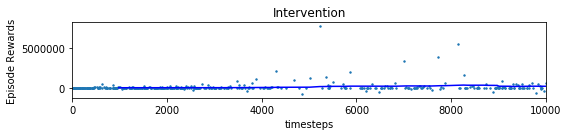

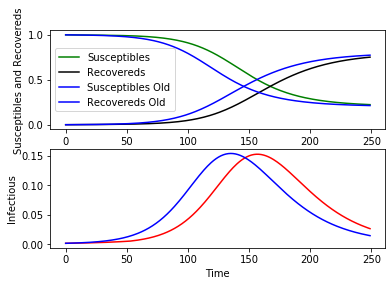

In [7]:
#peak days
plot_all(env,action_values,100000,df)

In [ ]:
#model,env,action_values,df = train(1000,1000)

In [ ]:
#plot_all(env,action_values,1000,df)

Old peak value : 0.153925 New peak value : 0.081872 Peak moved by : 0.072054
Old peak day : 135.000000 New peak day : 200.000000 Peak day moved by : -65.000000
Old area under curve : 3865.845117 New area under curve : 2366.752217 Diff in area under curve : 1499.092900
Intervention list :  [(0, 243), (0, -1, 0.08)]


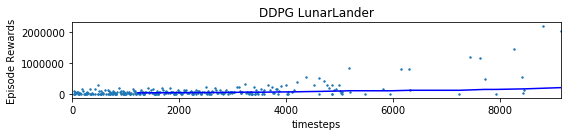

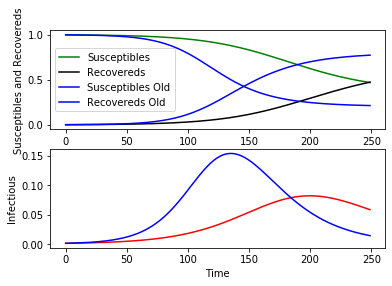

In [7]:
#
plot_all(env,action_values,100000,df)

Old peak value : 0.153925 New peak value : 0.153925 Peak moved by : -0.000000
Old peak day : 135.000000 New peak day : 135.000000 Peak day moved by : 0.000000
Old area under curve : 3865.845117 New area under curve : 3865.835547 Diff in area under curve : 0.009570
Intervention list :  []


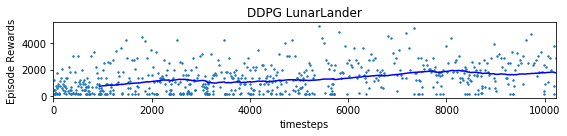

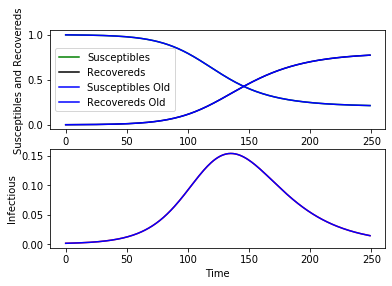

In [7]:
plot_all(env,action_values,100000,df)

Old peak value : 0.153925 New peak value : 0.149869 Peak moved by : 0.004057
Old peak day : 135.000000 New peak day : 171.000000 Peak day moved by : -36.000000
Old area under curve : 3865.845117 New area under curve : 3628.743513 Diff in area under curve : 237.101604
Intervention list :  [0, (0, 87, 0.08)]


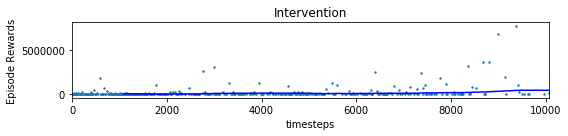

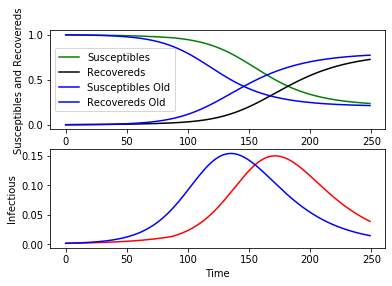

In [7]:
plot_all(env,action_values,100000,df)

Old peak value : 0.153925 New peak value : 0.153808 Peak moved by : 0.000118
Old peak day : 135.000000 New peak day : 139.000000 Peak day moved by : -4.000000
Old area under curve : 3865.845117 New area under curve : 3850.321281 Diff in area under curve : 15.523835
Intervention list :  [0, (0, 10, 0.08)]


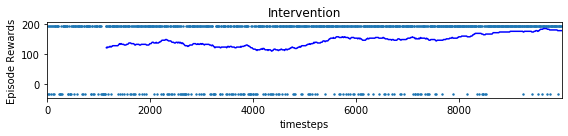

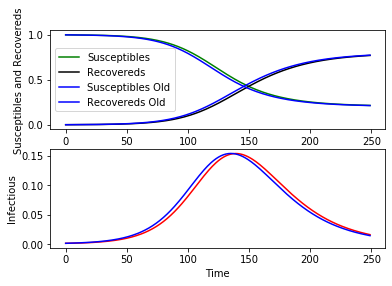

In [7]:
#100*cost_intervention + 1000*cost_start - 100000*gain_intervention - 100* reward_finish
#inc cost of start
plot_all(env,action_values,10000,df)